In [1]:
#imports

import numpy as np
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


data:  (1, 1200, 2)
x: start at 0 - shape: (1, 800, 2)
y: start at 7 - shape: (1, 800, 2)
xForecast: start at 800 - shape: (1, 393, 2)
trueForecast: start at 807 - shape: (1, 393, 2)


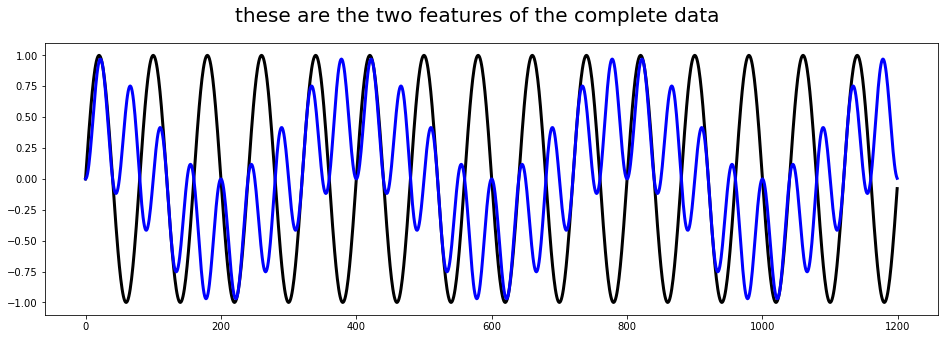

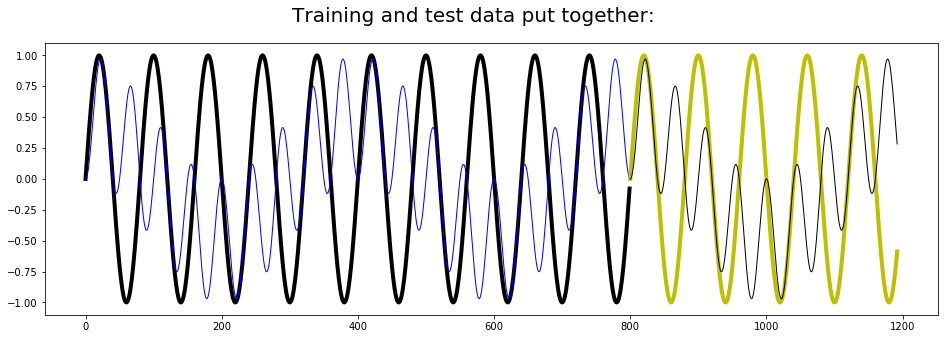

In [65]:
#creating and plotting the data

#creating some data - we will create a sinus and a sinus * sinus function
shift = 7
trainLength = 800
totalLength = 1200

data = np.empty((1,totalLength,2)) #0 to 1199

#x for the first sinus
base1 = np.array(range(totalLength))*(30*math.pi/totalLength) #30*pi means 15 complete oscilations
#the first sinus
data[0,:,0] = np.sin(base1)

#x for the second sinus - this reflects in a sinus with a different frequency
base2 = 0.8*base1


#the first * the second sinus 
data[0,:,1] = np.sin(base1)*np.sin(base2)

print('data: ', data.shape)

def takeSlice(arr, fr, to, name):
    
    result = arr[:,fr:to,:]
    print(name + ": start at " + str(fr) + " - shape: " + str(result.shape))
    return result


#training data: y is one step ahead of x

x = takeSlice(data,0,trainLength,'x') #de 0 a 799
y = takeSlice(data,shift,shift+trainLength,'y') #de 7 a 806


#true data for forecasting:
xForecast = takeSlice(data,trainLength,-shift,'xForecast') #de 800 a 1192?
trueForecast = takeSlice(data,shift+trainLength,None,'trueForecast') #de 807 a 1199


#plotting

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(data[0,:,0],color='k',linewidth=3)
ax.plot(data[0,:,1],color='b',linewidth=3)
fig.suptitle('these are the two features of the complete data',fontsize=20)
plt.show()
print('\n\n\n\n')

#figure separating training and forecasting
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,5))
ax.plot(range(trainLength),x[0,:,0],color='k',linewidth=4)
ax.plot(range(trainLength),x[0,:,1],color='b',linewidth=1)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,0],color='y',linewidth=4)
ax.plot(range(trainLength,totalLength-shift),xForecast[0,:,1],color='k',linewidth=1)
fig.suptitle('Training and test data put together: ', fontsize=20)
plt.show()


In [14]:
#creating the model 
    
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(None,2))) #input takes any steps, two features (var1 and var2)
model.add(LSTM(70,return_sequences=True))
model.add(LSTM(2,return_sequences=True)) #output keeps the steps and has two features
model.add(Lambda(lambda x: x*1.3))


In [16]:
#training the model

#this callback interrupts training when loss stops decreasing after 10 consecutive epochs. 
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss',min_delta=0.000000000001,patience=30) #this big patience is important

#different learning rates - train each indefinitely until the loss stops decreasing
#fount that the best rate is between 0.0001 and 0.00001
rates = [0.00001,0.000001]
for rate in rates:
    print('training with lr = ' + str(rate))
    model.compile(loss='mse', optimizer=Adam(lr=rate))
    model.fit(x,y,epochs=1000000,callbacks=[stop],verbose=2) #train indefinitely until loss stops decreasing
    print('\n\n\n\n\n')


training with lr = 1e-05
Epoch 1/1000000
4s - loss: 8.1169e-04
Epoch 2/1000000
1s - loss: 8.1054e-04
Epoch 3/1000000
1s - loss: 8.5690e-04
Epoch 4/1000000
1s - loss: 8.1208e-04
Epoch 5/1000000
1s - loss: 8.3576e-04
Epoch 6/1000000
1s - loss: 8.3867e-04
Epoch 7/1000000
1s - loss: 8.1870e-04
Epoch 8/1000000
1s - loss: 8.1108e-04
Epoch 9/1000000
1s - loss: 8.1996e-04
Epoch 10/1000000
1s - loss: 8.2525e-04
Epoch 11/1000000
1s - loss: 8.1929e-04
Epoch 12/1000000
1s - loss: 8.1113e-04
Epoch 13/1000000
1s - loss: 8.0990e-04
Epoch 14/1000000
1s - loss: 8.1403e-04
Epoch 15/1000000
1s - loss: 8.1616e-04
Epoch 16/1000000
1s - loss: 8.1335e-04
Epoch 17/1000000
1s - loss: 8.0923e-04
Epoch 18/1000000
1s - loss: 8.0788e-04
Epoch 19/1000000
1s - loss: 8.0935e-04
Epoch 20/1000000
1s - loss: 8.1070e-04
Epoch 21/1000000
1s - loss: 8.0984e-04
Epoch 22/1000000
1s - loss: 8.0764e-04
Epoch 23/1000000
1s - loss: 8.0626e-04
Epoch 24/1000000
1s - loss: 8.0649e-04
Epoch 25/1000000
1s - loss: 8.0719e-04
Epoch 26/

1s - loss: 7.4589e-04
Epoch 209/1000000
1s - loss: 7.4552e-04
Epoch 210/1000000
1s - loss: 7.4515e-04
Epoch 211/1000000
1s - loss: 7.4478e-04
Epoch 212/1000000
1s - loss: 7.4441e-04
Epoch 213/1000000
1s - loss: 7.4404e-04
Epoch 214/1000000
1s - loss: 7.4367e-04
Epoch 215/1000000
1s - loss: 7.4330e-04
Epoch 216/1000000
1s - loss: 7.4293e-04
Epoch 217/1000000
1s - loss: 7.4256e-04
Epoch 218/1000000
1s - loss: 7.4218e-04
Epoch 219/1000000
1s - loss: 7.4181e-04
Epoch 220/1000000
1s - loss: 7.4144e-04
Epoch 221/1000000
1s - loss: 7.4107e-04
Epoch 222/1000000
1s - loss: 7.4069e-04
Epoch 223/1000000
1s - loss: 7.4032e-04
Epoch 224/1000000
1s - loss: 7.3995e-04
Epoch 225/1000000
1s - loss: 7.3957e-04
Epoch 226/1000000
1s - loss: 7.3920e-04
Epoch 227/1000000
1s - loss: 7.3882e-04
Epoch 228/1000000
1s - loss: 7.3845e-04
Epoch 229/1000000
1s - loss: 7.3808e-04
Epoch 230/1000000
1s - loss: 7.3770e-04
Epoch 231/1000000
1s - loss: 7.3732e-04
Epoch 232/1000000
1s - loss: 7.3695e-04
Epoch 233/1000000


1s - loss: 6.6564e-04
Epoch 414/1000000
1s - loss: 6.6522e-04
Epoch 415/1000000
1s - loss: 6.6481e-04
Epoch 416/1000000
1s - loss: 6.6439e-04
Epoch 417/1000000
1s - loss: 6.6397e-04
Epoch 418/1000000
1s - loss: 6.6356e-04
Epoch 419/1000000
1s - loss: 6.6314e-04
Epoch 420/1000000
1s - loss: 6.6272e-04
Epoch 421/1000000
1s - loss: 6.6231e-04
Epoch 422/1000000
1s - loss: 6.6189e-04
Epoch 423/1000000
1s - loss: 6.6147e-04
Epoch 424/1000000
1s - loss: 6.6105e-04
Epoch 425/1000000
1s - loss: 6.6063e-04
Epoch 426/1000000
1s - loss: 6.6021e-04
Epoch 427/1000000
1s - loss: 6.5979e-04
Epoch 428/1000000
1s - loss: 6.5937e-04
Epoch 429/1000000
1s - loss: 6.5896e-04
Epoch 430/1000000
1s - loss: 6.5853e-04
Epoch 431/1000000
1s - loss: 6.5811e-04
Epoch 432/1000000
1s - loss: 6.5769e-04
Epoch 433/1000000
1s - loss: 6.5727e-04
Epoch 434/1000000
1s - loss: 6.5685e-04
Epoch 435/1000000
1s - loss: 6.5643e-04
Epoch 436/1000000
1s - loss: 6.5601e-04
Epoch 437/1000000
1s - loss: 6.5559e-04
Epoch 438/1000000


1s - loss: 5.7939e-04
Epoch 619/1000000
1s - loss: 5.7907e-04
Epoch 620/1000000
1s - loss: 5.7880e-04
Epoch 621/1000000
1s - loss: 5.7856e-04
Epoch 622/1000000
1s - loss: 5.7830e-04
Epoch 623/1000000
1s - loss: 5.7790e-04
Epoch 624/1000000
1s - loss: 5.7729e-04
Epoch 625/1000000
1s - loss: 5.7658e-04
Epoch 626/1000000
1s - loss: 5.7602e-04
Epoch 627/1000000
1s - loss: 5.7569e-04
Epoch 628/1000000
1s - loss: 5.7547e-04
Epoch 629/1000000
1s - loss: 5.7515e-04
Epoch 630/1000000
1s - loss: 5.7464e-04
Epoch 631/1000000
1s - loss: 5.7408e-04
Epoch 632/1000000
1s - loss: 5.7364e-04
Epoch 633/1000000
1s - loss: 5.7334e-04
Epoch 634/1000000
1s - loss: 5.7303e-04
Epoch 635/1000000
1s - loss: 5.7261e-04
Epoch 636/1000000
1s - loss: 5.7211e-04
Epoch 637/1000000
1s - loss: 5.7167e-04
Epoch 638/1000000
1s - loss: 5.7133e-04
Epoch 639/1000000
1s - loss: 5.7099e-04
Epoch 640/1000000
1s - loss: 5.7060e-04
Epoch 641/1000000
1s - loss: 5.7015e-04
Epoch 642/1000000
1s - loss: 5.6973e-04
Epoch 643/1000000


1s - loss: 5.1022e-04
Epoch 824/1000000
1s - loss: 5.0996e-04
Epoch 825/1000000
1s - loss: 5.0970e-04
Epoch 826/1000000
1s - loss: 5.0944e-04
Epoch 827/1000000
1s - loss: 5.0918e-04
Epoch 828/1000000
1s - loss: 5.0892e-04
Epoch 829/1000000
1s - loss: 5.0867e-04
Epoch 830/1000000
1s - loss: 5.0841e-04
Epoch 831/1000000
1s - loss: 5.0815e-04
Epoch 832/1000000
1s - loss: 5.0790e-04
Epoch 833/1000000
1s - loss: 5.0764e-04
Epoch 834/1000000
1s - loss: 5.0739e-04
Epoch 835/1000000
1s - loss: 5.0713e-04
Epoch 836/1000000
1s - loss: 5.0688e-04
Epoch 837/1000000
1s - loss: 5.0663e-04
Epoch 838/1000000
1s - loss: 5.0637e-04
Epoch 839/1000000
1s - loss: 5.0612e-04
Epoch 840/1000000
1s - loss: 5.0587e-04
Epoch 841/1000000
1s - loss: 5.0562e-04
Epoch 842/1000000
1s - loss: 5.0537e-04
Epoch 843/1000000
1s - loss: 5.0512e-04
Epoch 844/1000000
1s - loss: 5.0487e-04
Epoch 845/1000000
1s - loss: 5.0462e-04
Epoch 846/1000000
1s - loss: 5.0437e-04
Epoch 847/1000000
1s - loss: 5.0413e-04
Epoch 848/1000000


1s - loss: 4.6697e-04
Epoch 1029/1000000
1s - loss: 4.6678e-04
Epoch 1030/1000000
1s - loss: 4.6664e-04
Epoch 1031/1000000
1s - loss: 4.6649e-04
Epoch 1032/1000000
1s - loss: 4.6631e-04
Epoch 1033/1000000
1s - loss: 4.6611e-04
Epoch 1034/1000000
1s - loss: 4.6592e-04
Epoch 1035/1000000
1s - loss: 4.6576e-04
Epoch 1036/1000000
1s - loss: 4.6561e-04
Epoch 1037/1000000
1s - loss: 4.6545e-04
Epoch 1038/1000000
1s - loss: 4.6526e-04
Epoch 1039/1000000
1s - loss: 4.6507e-04
Epoch 1040/1000000
1s - loss: 4.6490e-04
Epoch 1041/1000000
1s - loss: 4.6474e-04
Epoch 1042/1000000
1s - loss: 4.6458e-04
Epoch 1043/1000000
1s - loss: 4.6441e-04
Epoch 1044/1000000
1s - loss: 4.6423e-04
Epoch 1045/1000000
1s - loss: 4.6406e-04
Epoch 1046/1000000
1s - loss: 4.6389e-04
Epoch 1047/1000000
1s - loss: 4.6373e-04
Epoch 1048/1000000
1s - loss: 4.6356e-04
Epoch 1049/1000000
1s - loss: 4.6339e-04
Epoch 1050/1000000
1s - loss: 4.6322e-04
Epoch 1051/1000000
1s - loss: 4.6305e-04
Epoch 1052/1000000
1s - loss: 4.628

1s - loss: 4.3605e-04
Epoch 1229/1000000
1s - loss: 4.3591e-04
Epoch 1230/1000000
1s - loss: 4.3577e-04
Epoch 1231/1000000
1s - loss: 4.3563e-04
Epoch 1232/1000000
1s - loss: 4.3549e-04
Epoch 1233/1000000
1s - loss: 4.3535e-04
Epoch 1234/1000000
1s - loss: 4.3521e-04
Epoch 1235/1000000
1s - loss: 4.3507e-04
Epoch 1236/1000000
1s - loss: 4.3494e-04
Epoch 1237/1000000
1s - loss: 4.3480e-04
Epoch 1238/1000000
1s - loss: 4.3466e-04
Epoch 1239/1000000
1s - loss: 4.3452e-04
Epoch 1240/1000000
1s - loss: 4.3438e-04
Epoch 1241/1000000
1s - loss: 4.3424e-04
Epoch 1242/1000000
1s - loss: 4.3411e-04
Epoch 1243/1000000
1s - loss: 4.3397e-04
Epoch 1244/1000000
1s - loss: 4.3383e-04
Epoch 1245/1000000
1s - loss: 4.3369e-04
Epoch 1246/1000000
1s - loss: 4.3356e-04
Epoch 1247/1000000
1s - loss: 4.3342e-04
Epoch 1248/1000000
1s - loss: 4.3328e-04
Epoch 1249/1000000
1s - loss: 4.3314e-04
Epoch 1250/1000000
1s - loss: 4.3301e-04
Epoch 1251/1000000
1s - loss: 4.3287e-04
Epoch 1252/1000000
1s - loss: 4.327

1s - loss: 4.1068e-04
Epoch 1429/1000000
1s - loss: 4.1061e-04
Epoch 1430/1000000
1s - loss: 4.1052e-04
Epoch 1431/1000000
1s - loss: 4.1037e-04
Epoch 1432/1000000
1s - loss: 4.1022e-04
Epoch 1433/1000000
1s - loss: 4.1011e-04
Epoch 1434/1000000
1s - loss: 4.1003e-04
Epoch 1435/1000000
1s - loss: 4.0992e-04
Epoch 1436/1000000
1s - loss: 4.0978e-04
Epoch 1437/1000000
1s - loss: 4.0965e-04
Epoch 1438/1000000
1s - loss: 4.0954e-04
Epoch 1439/1000000
1s - loss: 4.0944e-04
Epoch 1440/1000000
2s - loss: 4.0933e-04
Epoch 1441/1000000
1s - loss: 4.0920e-04
Epoch 1442/1000000
1s - loss: 4.0908e-04
Epoch 1443/1000000
2s - loss: 4.0897e-04
Epoch 1444/1000000
1s - loss: 4.0886e-04
Epoch 1445/1000000
1s - loss: 4.0875e-04
Epoch 1446/1000000
1s - loss: 4.0862e-04
Epoch 1447/1000000
1s - loss: 4.0851e-04
Epoch 1448/1000000
1s - loss: 4.0840e-04
Epoch 1449/1000000
1s - loss: 4.0829e-04
Epoch 1450/1000000
1s - loss: 4.0817e-04
Epoch 1451/1000000
1s - loss: 4.0805e-04
Epoch 1452/1000000
1s - loss: 4.079

1s - loss: 3.8879e-04
Epoch 1629/1000000
1s - loss: 3.8869e-04
Epoch 1630/1000000
1s - loss: 3.8858e-04
Epoch 1631/1000000
1s - loss: 3.8848e-04
Epoch 1632/1000000
1s - loss: 3.8837e-04
Epoch 1633/1000000
1s - loss: 3.8827e-04
Epoch 1634/1000000
1s - loss: 3.8817e-04
Epoch 1635/1000000
1s - loss: 3.8807e-04
Epoch 1636/1000000
1s - loss: 3.8797e-04
Epoch 1637/1000000
1s - loss: 3.8786e-04
Epoch 1638/1000000
1s - loss: 3.8776e-04
Epoch 1639/1000000
1s - loss: 3.8766e-04
Epoch 1640/1000000
1s - loss: 3.8756e-04
Epoch 1641/1000000
1s - loss: 3.8746e-04
Epoch 1642/1000000
1s - loss: 3.8736e-04
Epoch 1643/1000000
1s - loss: 3.8726e-04
Epoch 1644/1000000
1s - loss: 3.8716e-04
Epoch 1645/1000000
1s - loss: 3.8706e-04
Epoch 1646/1000000
1s - loss: 3.8696e-04
Epoch 1647/1000000
1s - loss: 3.8687e-04
Epoch 1648/1000000
1s - loss: 3.8678e-04
Epoch 1649/1000000
1s - loss: 3.8670e-04
Epoch 1650/1000000
1s - loss: 3.8662e-04
Epoch 1651/1000000
1s - loss: 3.8655e-04
Epoch 1652/1000000
1s - loss: 3.864

1s - loss: 3.6923e-04
Epoch 1829/1000000
1s - loss: 3.6915e-04
Epoch 1830/1000000
1s - loss: 3.6909e-04
Epoch 1831/1000000
1s - loss: 3.6903e-04
Epoch 1832/1000000
1s - loss: 3.6898e-04
Epoch 1833/1000000
1s - loss: 3.6896e-04
Epoch 1834/1000000
1s - loss: 3.6895e-04
Epoch 1835/1000000
1s - loss: 3.6896e-04
Epoch 1836/1000000
1s - loss: 3.6898e-04
Epoch 1837/1000000
1s - loss: 3.6899e-04
Epoch 1838/1000000
1s - loss: 3.6896e-04
Epoch 1839/1000000
1s - loss: 3.6884e-04
Epoch 1840/1000000
1s - loss: 3.6863e-04
Epoch 1841/1000000
1s - loss: 3.6834e-04
Epoch 1842/1000000
1s - loss: 3.6806e-04
Epoch 1843/1000000
1s - loss: 3.6784e-04
Epoch 1844/1000000
1s - loss: 3.6773e-04
Epoch 1845/1000000
1s - loss: 3.6770e-04
Epoch 1846/1000000
1s - loss: 3.6770e-04
Epoch 1847/1000000
1s - loss: 3.6767e-04
Epoch 1848/1000000
1s - loss: 3.6758e-04
Epoch 1849/1000000
1s - loss: 3.6744e-04
Epoch 1850/1000000
1s - loss: 3.6726e-04
Epoch 1851/1000000
1s - loss: 3.6709e-04
Epoch 1852/1000000
1s - loss: 3.669

1s - loss: 3.5178e-04
Epoch 2029/1000000
1s - loss: 3.5163e-04
Epoch 2030/1000000
1s - loss: 3.5148e-04
Epoch 2031/1000000
1s - loss: 3.5137e-04
Epoch 2032/1000000
1s - loss: 3.5130e-04
Epoch 2033/1000000
1s - loss: 3.5124e-04
Epoch 2034/1000000
1s - loss: 3.5118e-04
Epoch 2035/1000000
1s - loss: 3.5109e-04
Epoch 2036/1000000
1s - loss: 3.5098e-04
Epoch 2037/1000000
1s - loss: 3.5084e-04
Epoch 2038/1000000
1s - loss: 3.5071e-04
Epoch 2039/1000000
1s - loss: 3.5059e-04
Epoch 2040/1000000
1s - loss: 3.5050e-04
Epoch 2041/1000000
1s - loss: 3.5042e-04
Epoch 2042/1000000
1s - loss: 3.5035e-04
Epoch 2043/1000000
1s - loss: 3.5028e-04
Epoch 2044/1000000
1s - loss: 3.5019e-04
Epoch 2045/1000000
1s - loss: 3.5010e-04
Epoch 2046/1000000
1s - loss: 3.5000e-04
Epoch 2047/1000000
1s - loss: 3.4990e-04
Epoch 2048/1000000
1s - loss: 3.4981e-04
Epoch 2049/1000000
1s - loss: 3.4973e-04
Epoch 2050/1000000
1s - loss: 3.4966e-04
Epoch 2051/1000000
1s - loss: 3.4958e-04
Epoch 2052/1000000
1s - loss: 3.495

1s - loss: 3.3591e-04
Epoch 2229/1000000
1s - loss: 3.3591e-04
Epoch 2230/1000000
1s - loss: 3.3589e-04
Epoch 2231/1000000
1s - loss: 3.3580e-04
Epoch 2232/1000000
1s - loss: 3.3564e-04
Epoch 2233/1000000
1s - loss: 3.3541e-04
Epoch 2234/1000000
1s - loss: 3.3517e-04
Epoch 2235/1000000
1s - loss: 3.3496e-04
Epoch 2236/1000000
1s - loss: 3.3482e-04
Epoch 2237/1000000
1s - loss: 3.3475e-04
Epoch 2238/1000000
1s - loss: 3.3474e-04
Epoch 2239/1000000
1s - loss: 3.3474e-04
Epoch 2240/1000000
1s - loss: 3.3471e-04
Epoch 2241/1000000
1s - loss: 3.3464e-04
Epoch 2242/1000000
1s - loss: 3.3452e-04
Epoch 2243/1000000
1s - loss: 3.3438e-04
Epoch 2244/1000000
1s - loss: 3.3425e-04
Epoch 2245/1000000
1s - loss: 3.3415e-04
Epoch 2246/1000000
1s - loss: 3.3409e-04
Epoch 2247/1000000
1s - loss: 3.3405e-04
Epoch 2248/1000000
1s - loss: 3.3402e-04
Epoch 2249/1000000
1s - loss: 3.3399e-04
Epoch 2250/1000000
1s - loss: 3.3394e-04
Epoch 2251/1000000
1s - loss: 3.3389e-04
Epoch 2252/1000000
1s - loss: 3.338

1s - loss: 3.2108e-04
Epoch 2429/1000000
1s - loss: 3.2094e-04
Epoch 2430/1000000
1s - loss: 3.2079e-04
Epoch 2431/1000000
1s - loss: 3.2066e-04
Epoch 2432/1000000
1s - loss: 3.2055e-04
Epoch 2433/1000000
1s - loss: 3.2047e-04
Epoch 2434/1000000
1s - loss: 3.2041e-04
Epoch 2435/1000000
1s - loss: 3.2035e-04
Epoch 2436/1000000
1s - loss: 3.2031e-04
Epoch 2437/1000000
1s - loss: 3.2025e-04
Epoch 2438/1000000
1s - loss: 3.2019e-04
Epoch 2439/1000000
1s - loss: 3.2012e-04
Epoch 2440/1000000
1s - loss: 3.2005e-04
Epoch 2441/1000000
1s - loss: 3.1996e-04
Epoch 2442/1000000
1s - loss: 3.1988e-04
Epoch 2443/1000000
1s - loss: 3.1979e-04
Epoch 2444/1000000
1s - loss: 3.1971e-04
Epoch 2445/1000000
1s - loss: 3.1964e-04
Epoch 2446/1000000
1s - loss: 3.1956e-04
Epoch 2447/1000000
1s - loss: 3.1949e-04
Epoch 2448/1000000
1s - loss: 3.1943e-04
Epoch 2449/1000000
1s - loss: 3.1936e-04
Epoch 2450/1000000
1s - loss: 3.1929e-04
Epoch 2451/1000000
1s - loss: 3.1922e-04
Epoch 2452/1000000
1s - loss: 3.191

1s - loss: 3.0776e-04
Epoch 2629/1000000
1s - loss: 3.0745e-04
Epoch 2630/1000000
1s - loss: 3.0730e-04
Epoch 2631/1000000
1s - loss: 3.0736e-04
Epoch 2632/1000000
1s - loss: 3.0743e-04
Epoch 2633/1000000
1s - loss: 3.0734e-04
Epoch 2634/1000000
1s - loss: 3.0714e-04
Epoch 2635/1000000
1s - loss: 3.0700e-04
Epoch 2636/1000000
1s - loss: 3.0699e-04
Epoch 2637/1000000
1s - loss: 3.0701e-04
Epoch 2638/1000000
1s - loss: 3.0695e-04
Epoch 2639/1000000
1s - loss: 3.0681e-04
Epoch 2640/1000000
1s - loss: 3.0669e-04
Epoch 2641/1000000
1s - loss: 3.0664e-04
Epoch 2642/1000000
1s - loss: 3.0662e-04
Epoch 2643/1000000
1s - loss: 3.0657e-04
Epoch 2644/1000000
1s - loss: 3.0647e-04
Epoch 2645/1000000
1s - loss: 3.0636e-04
Epoch 2646/1000000
1s - loss: 3.0630e-04
Epoch 2647/1000000
1s - loss: 3.0627e-04
Epoch 2648/1000000
1s - loss: 3.0622e-04
Epoch 2649/1000000
1s - loss: 3.0614e-04
Epoch 2650/1000000
1s - loss: 3.0605e-04
Epoch 2651/1000000
1s - loss: 3.0598e-04
Epoch 2652/1000000
1s - loss: 3.059

1s - loss: 2.9528e-04
Epoch 2829/1000000
1s - loss: 2.9522e-04
Epoch 2830/1000000
1s - loss: 2.9516e-04
Epoch 2831/1000000
1s - loss: 2.9510e-04
Epoch 2832/1000000
1s - loss: 2.9504e-04
Epoch 2833/1000000
1s - loss: 2.9498e-04
Epoch 2834/1000000
1s - loss: 2.9493e-04
Epoch 2835/1000000
1s - loss: 2.9487e-04
Epoch 2836/1000000
1s - loss: 2.9481e-04
Epoch 2837/1000000
1s - loss: 2.9475e-04
Epoch 2838/1000000
1s - loss: 2.9469e-04
Epoch 2839/1000000
1s - loss: 2.9463e-04
Epoch 2840/1000000
1s - loss: 2.9457e-04
Epoch 2841/1000000
1s - loss: 2.9451e-04
Epoch 2842/1000000
1s - loss: 2.9445e-04
Epoch 2843/1000000
1s - loss: 2.9439e-04
Epoch 2844/1000000
1s - loss: 2.9433e-04
Epoch 2845/1000000
1s - loss: 2.9427e-04
Epoch 2846/1000000
1s - loss: 2.9421e-04
Epoch 2847/1000000
1s - loss: 2.9415e-04
Epoch 2848/1000000
1s - loss: 2.9409e-04
Epoch 2849/1000000
1s - loss: 2.9404e-04
Epoch 2850/1000000
1s - loss: 2.9398e-04
Epoch 2851/1000000
1s - loss: 2.9392e-04
Epoch 2852/1000000
1s - loss: 2.938

1s - loss: 2.8392e-04
Epoch 3029/1000000
1s - loss: 2.8383e-04
Epoch 3030/1000000
1s - loss: 2.8375e-04
Epoch 3031/1000000
1s - loss: 2.8368e-04
Epoch 3032/1000000
1s - loss: 2.8362e-04
Epoch 3033/1000000
1s - loss: 2.8357e-04
Epoch 3034/1000000
1s - loss: 2.8353e-04
Epoch 3035/1000000
1s - loss: 2.8349e-04
Epoch 3036/1000000
1s - loss: 2.8344e-04
Epoch 3037/1000000
1s - loss: 2.8338e-04
Epoch 3038/1000000
1s - loss: 2.8332e-04
Epoch 3039/1000000
1s - loss: 2.8325e-04
Epoch 3040/1000000
1s - loss: 2.8319e-04
Epoch 3041/1000000
1s - loss: 2.8313e-04
Epoch 3042/1000000
1s - loss: 2.8307e-04
Epoch 3043/1000000
1s - loss: 2.8302e-04
Epoch 3044/1000000
1s - loss: 2.8297e-04
Epoch 3045/1000000
1s - loss: 2.8291e-04
Epoch 3046/1000000
1s - loss: 2.8286e-04
Epoch 3047/1000000
1s - loss: 2.8281e-04
Epoch 3048/1000000
1s - loss: 2.8275e-04
Epoch 3049/1000000
1s - loss: 2.8270e-04
Epoch 3050/1000000
1s - loss: 2.8264e-04
Epoch 3051/1000000
1s - loss: 2.8258e-04
Epoch 3052/1000000
1s - loss: 2.825

1s - loss: 2.7327e-04
Epoch 3229/1000000
1s - loss: 2.7326e-04
Epoch 3230/1000000
1s - loss: 2.7343e-04
Epoch 3231/1000000
1s - loss: 2.7355e-04
Epoch 3232/1000000
1s - loss: 2.7346e-04
Epoch 3233/1000000
1s - loss: 2.7321e-04
Epoch 3234/1000000
1s - loss: 2.7297e-04
Epoch 3235/1000000
1s - loss: 2.7289e-04
Epoch 3236/1000000
1s - loss: 2.7294e-04
Epoch 3237/1000000
1s - loss: 2.7300e-04
Epoch 3238/1000000
1s - loss: 2.7295e-04
Epoch 3239/1000000
1s - loss: 2.7281e-04
Epoch 3240/1000000
1s - loss: 2.7266e-04
Epoch 3241/1000000
1s - loss: 2.7258e-04
Epoch 3242/1000000
1s - loss: 2.7258e-04
Epoch 3243/1000000
1s - loss: 2.7259e-04
Epoch 3244/1000000
1s - loss: 2.7255e-04
Epoch 3245/1000000
1s - loss: 2.7245e-04
Epoch 3246/1000000
1s - loss: 2.7235e-04
Epoch 3247/1000000
1s - loss: 2.7227e-04
Epoch 3248/1000000
1s - loss: 2.7224e-04
Epoch 3249/1000000
1s - loss: 2.7222e-04
Epoch 3250/1000000
1s - loss: 2.7219e-04
Epoch 3251/1000000
1s - loss: 2.7212e-04
Epoch 3252/1000000
1s - loss: 2.720

1s - loss: 2.6337e-04
Epoch 3429/1000000
1s - loss: 2.6335e-04
Epoch 3430/1000000
1s - loss: 2.6338e-04
Epoch 3431/1000000
1s - loss: 2.6339e-04
Epoch 3432/1000000
1s - loss: 2.6334e-04
Epoch 3433/1000000
1s - loss: 2.6323e-04
Epoch 3434/1000000
1s - loss: 2.6311e-04
Epoch 3435/1000000
1s - loss: 2.6304e-04
Epoch 3436/1000000
1s - loss: 2.6301e-04
Epoch 3437/1000000
1s - loss: 2.6300e-04
Epoch 3438/1000000
1s - loss: 2.6298e-04
Epoch 3439/1000000
1s - loss: 2.6292e-04
Epoch 3440/1000000
1s - loss: 2.6284e-04
Epoch 3441/1000000
1s - loss: 2.6276e-04
Epoch 3442/1000000
1s - loss: 2.6270e-04
Epoch 3443/1000000
1s - loss: 2.6267e-04
Epoch 3444/1000000
1s - loss: 2.6264e-04
Epoch 3445/1000000
1s - loss: 2.6260e-04
Epoch 3446/1000000
1s - loss: 2.6255e-04
Epoch 3447/1000000
1s - loss: 2.6248e-04
Epoch 3448/1000000
1s - loss: 2.6242e-04
Epoch 3449/1000000
1s - loss: 2.6237e-04
Epoch 3450/1000000
1s - loss: 2.6233e-04
Epoch 3451/1000000
1s - loss: 2.6229e-04
Epoch 3452/1000000
1s - loss: 2.622

1s - loss: 2.5426e-04
Epoch 3629/1000000
1s - loss: 2.5419e-04
Epoch 3630/1000000
1s - loss: 2.5412e-04
Epoch 3631/1000000
1s - loss: 2.5407e-04
Epoch 3632/1000000
1s - loss: 2.5404e-04
Epoch 3633/1000000
1s - loss: 2.5401e-04
Epoch 3634/1000000
1s - loss: 2.5397e-04
Epoch 3635/1000000
1s - loss: 2.5392e-04
Epoch 3636/1000000
1s - loss: 2.5386e-04
Epoch 3637/1000000
1s - loss: 2.5381e-04
Epoch 3638/1000000
1s - loss: 2.5376e-04
Epoch 3639/1000000
1s - loss: 2.5373e-04
Epoch 3640/1000000
1s - loss: 2.5369e-04
Epoch 3641/1000000
1s - loss: 2.5364e-04
Epoch 3642/1000000
1s - loss: 2.5359e-04
Epoch 3643/1000000
1s - loss: 2.5354e-04
Epoch 3644/1000000
1s - loss: 2.5350e-04
Epoch 3645/1000000
1s - loss: 2.5345e-04
Epoch 3646/1000000
1s - loss: 2.5341e-04
Epoch 3647/1000000
1s - loss: 2.5337e-04
Epoch 3648/1000000
1s - loss: 2.5333e-04
Epoch 3649/1000000
1s - loss: 2.5328e-04
Epoch 3650/1000000
1s - loss: 2.5323e-04
Epoch 3651/1000000
1s - loss: 2.5319e-04
Epoch 3652/1000000
1s - loss: 2.531

1s - loss: 2.4562e-04
Epoch 3829/1000000
1s - loss: 2.4558e-04
Epoch 3830/1000000
1s - loss: 2.4555e-04
Epoch 3831/1000000
1s - loss: 2.4551e-04
Epoch 3832/1000000
1s - loss: 2.4547e-04
Epoch 3833/1000000
1s - loss: 2.4542e-04
Epoch 3834/1000000
1s - loss: 2.4537e-04
Epoch 3835/1000000
1s - loss: 2.4533e-04
Epoch 3836/1000000
1s - loss: 2.4528e-04
Epoch 3837/1000000
1s - loss: 2.4524e-04
Epoch 3838/1000000
1s - loss: 2.4521e-04
Epoch 3839/1000000
1s - loss: 2.4517e-04
Epoch 3840/1000000
1s - loss: 2.4512e-04
Epoch 3841/1000000
1s - loss: 2.4508e-04
Epoch 3842/1000000
1s - loss: 2.4504e-04
Epoch 3843/1000000
1s - loss: 2.4499e-04
Epoch 3844/1000000
1s - loss: 2.4495e-04
Epoch 3845/1000000
1s - loss: 2.4491e-04
Epoch 3846/1000000
1s - loss: 2.4487e-04
Epoch 3847/1000000
1s - loss: 2.4483e-04
Epoch 3848/1000000
1s - loss: 2.4479e-04
Epoch 3849/1000000
1s - loss: 2.4475e-04
Epoch 3850/1000000
1s - loss: 2.4470e-04
Epoch 3851/1000000
1s - loss: 2.4466e-04
Epoch 3852/1000000
1s - loss: 2.446

1s - loss: 2.3758e-04
Epoch 4029/1000000
1s - loss: 2.3754e-04
Epoch 4030/1000000
1s - loss: 2.3751e-04
Epoch 4031/1000000
1s - loss: 2.3747e-04
Epoch 4032/1000000
1s - loss: 2.3743e-04
Epoch 4033/1000000
1s - loss: 2.3739e-04
Epoch 4034/1000000
1s - loss: 2.3735e-04
Epoch 4035/1000000
1s - loss: 2.3731e-04
Epoch 4036/1000000
1s - loss: 2.3727e-04
Epoch 4037/1000000
1s - loss: 2.3724e-04
Epoch 4038/1000000
1s - loss: 2.3720e-04
Epoch 4039/1000000
1s - loss: 2.3716e-04
Epoch 4040/1000000
1s - loss: 2.3712e-04
Epoch 4041/1000000
1s - loss: 2.3708e-04
Epoch 4042/1000000
1s - loss: 2.3704e-04
Epoch 4043/1000000
1s - loss: 2.3700e-04
Epoch 4044/1000000
1s - loss: 2.3696e-04
Epoch 4045/1000000
1s - loss: 2.3692e-04
Epoch 4046/1000000
1s - loss: 2.3688e-04
Epoch 4047/1000000
1s - loss: 2.3684e-04
Epoch 4048/1000000
1s - loss: 2.3681e-04
Epoch 4049/1000000
1s - loss: 2.3677e-04
Epoch 4050/1000000
1s - loss: 2.3673e-04
Epoch 4051/1000000
1s - loss: 2.3669e-04
Epoch 4052/1000000
1s - loss: 2.366

1s - loss: 2.3008e-04
Epoch 4229/1000000
1s - loss: 2.3001e-04
Epoch 4230/1000000
1s - loss: 2.2997e-04
Epoch 4231/1000000
1s - loss: 2.2994e-04
Epoch 4232/1000000
1s - loss: 2.2992e-04
Epoch 4233/1000000
1s - loss: 2.2990e-04
Epoch 4234/1000000
1s - loss: 2.2986e-04
Epoch 4235/1000000
1s - loss: 2.2981e-04
Epoch 4236/1000000
1s - loss: 2.2976e-04
Epoch 4237/1000000
1s - loss: 2.2971e-04
Epoch 4238/1000000
1s - loss: 2.2968e-04
Epoch 4239/1000000
1s - loss: 2.2965e-04
Epoch 4240/1000000
1s - loss: 2.2962e-04
Epoch 4241/1000000
1s - loss: 2.2959e-04
Epoch 4242/1000000
1s - loss: 2.2955e-04
Epoch 4243/1000000
1s - loss: 2.2950e-04
Epoch 4244/1000000
1s - loss: 2.2946e-04
Epoch 4245/1000000
1s - loss: 2.2942e-04
Epoch 4246/1000000
1s - loss: 2.2939e-04
Epoch 4247/1000000
2s - loss: 2.2936e-04
Epoch 4248/1000000
1s - loss: 2.2932e-04
Epoch 4249/1000000
1s - loss: 2.2928e-04
Epoch 4250/1000000
1s - loss: 2.2925e-04
Epoch 4251/1000000
1s - loss: 2.2921e-04
Epoch 4252/1000000
1s - loss: 2.291

1s - loss: 2.2296e-04
Epoch 4429/1000000
1s - loss: 2.2292e-04
Epoch 4430/1000000
1s - loss: 2.2288e-04
Epoch 4431/1000000
1s - loss: 2.2285e-04
Epoch 4432/1000000
1s - loss: 2.2281e-04
Epoch 4433/1000000
1s - loss: 2.2278e-04
Epoch 4434/1000000
1s - loss: 2.2275e-04
Epoch 4435/1000000
1s - loss: 2.2271e-04
Epoch 4436/1000000
1s - loss: 2.2268e-04
Epoch 4437/1000000
1s - loss: 2.2264e-04
Epoch 4438/1000000
1s - loss: 2.2261e-04
Epoch 4439/1000000
1s - loss: 2.2257e-04
Epoch 4440/1000000
1s - loss: 2.2254e-04
Epoch 4441/1000000
1s - loss: 2.2250e-04
Epoch 4442/1000000
1s - loss: 2.2247e-04
Epoch 4443/1000000
1s - loss: 2.2243e-04
Epoch 4444/1000000
1s - loss: 2.2240e-04
Epoch 4445/1000000
1s - loss: 2.2236e-04
Epoch 4446/1000000
1s - loss: 2.2233e-04
Epoch 4447/1000000
1s - loss: 2.2230e-04
Epoch 4448/1000000
1s - loss: 2.2226e-04
Epoch 4449/1000000
1s - loss: 2.2223e-04
Epoch 4450/1000000
1s - loss: 2.2219e-04
Epoch 4451/1000000
1s - loss: 2.2216e-04
Epoch 4452/1000000
1s - loss: 2.221

1s - loss: 2.1633e-04
Epoch 4629/1000000
1s - loss: 2.1630e-04
Epoch 4630/1000000
1s - loss: 2.1627e-04
Epoch 4631/1000000
1s - loss: 2.1624e-04
Epoch 4632/1000000
1s - loss: 2.1621e-04
Epoch 4633/1000000
1s - loss: 2.1617e-04
Epoch 4634/1000000
1s - loss: 2.1614e-04
Epoch 4635/1000000
1s - loss: 2.1610e-04
Epoch 4636/1000000
1s - loss: 2.1607e-04
Epoch 4637/1000000
1s - loss: 2.1604e-04
Epoch 4638/1000000
1s - loss: 2.1601e-04
Epoch 4639/1000000
1s - loss: 2.1598e-04
Epoch 4640/1000000
1s - loss: 2.1595e-04
Epoch 4641/1000000
1s - loss: 2.1591e-04
Epoch 4642/1000000
1s - loss: 2.1588e-04
Epoch 4643/1000000
1s - loss: 2.1585e-04
Epoch 4644/1000000
1s - loss: 2.1581e-04
Epoch 4645/1000000
1s - loss: 2.1578e-04
Epoch 4646/1000000
1s - loss: 2.1575e-04
Epoch 4647/1000000
1s - loss: 2.1572e-04
Epoch 4648/1000000
1s - loss: 2.1569e-04
Epoch 4649/1000000
1s - loss: 2.1565e-04
Epoch 4650/1000000
1s - loss: 2.1562e-04
Epoch 4651/1000000
1s - loss: 2.1559e-04
Epoch 4652/1000000
1s - loss: 2.155

1s - loss: 2.1016e-04
Epoch 4829/1000000
1s - loss: 2.1021e-04
Epoch 4830/1000000
1s - loss: 2.1028e-04
Epoch 4831/1000000
1s - loss: 2.1039e-04
Epoch 4832/1000000
1s - loss: 2.1052e-04
Epoch 4833/1000000
1s - loss: 2.1066e-04
Epoch 4834/1000000
1s - loss: 2.1076e-04
Epoch 4835/1000000
1s - loss: 2.1076e-04
Epoch 4836/1000000
1s - loss: 2.1064e-04
Epoch 4837/1000000
1s - loss: 2.1040e-04
Epoch 4838/1000000
1s - loss: 2.1012e-04
Epoch 4839/1000000
1s - loss: 2.0991e-04
Epoch 4840/1000000
1s - loss: 2.0983e-04
Epoch 4841/1000000
1s - loss: 2.0984e-04
Epoch 4842/1000000
1s - loss: 2.0988e-04
Epoch 4843/1000000
1s - loss: 2.0987e-04
Epoch 4844/1000000
1s - loss: 2.0978e-04
Epoch 4845/1000000
1s - loss: 2.0966e-04
Epoch 4846/1000000
1s - loss: 2.0956e-04
Epoch 4847/1000000
1s - loss: 2.0951e-04
Epoch 4848/1000000
1s - loss: 2.0951e-04
Epoch 4849/1000000
1s - loss: 2.0950e-04
Epoch 4850/1000000
1s - loss: 2.0946e-04
Epoch 4851/1000000
1s - loss: 2.0940e-04
Epoch 4852/1000000
1s - loss: 2.093

1s - loss: 2.0419e-04
Epoch 5029/1000000
1s - loss: 2.0423e-04
Epoch 5030/1000000
1s - loss: 2.0430e-04
Epoch 5031/1000000
1s - loss: 2.0440e-04
Epoch 5032/1000000
1s - loss: 2.0453e-04
Epoch 5033/1000000
1s - loss: 2.0469e-04
Epoch 5034/1000000
1s - loss: 2.0482e-04
Epoch 5035/1000000
1s - loss: 2.0488e-04
Epoch 5036/1000000
1s - loss: 2.0479e-04
Epoch 5037/1000000
1s - loss: 2.0456e-04
Epoch 5038/1000000
1s - loss: 2.0425e-04
Epoch 5039/1000000
1s - loss: 2.0399e-04
Epoch 5040/1000000
1s - loss: 2.0386e-04
Epoch 5041/1000000
1s - loss: 2.0387e-04
Epoch 5042/1000000
1s - loss: 2.0396e-04
Epoch 5043/1000000
1s - loss: 2.0403e-04
Epoch 5044/1000000
1s - loss: 2.0402e-04
Epoch 5045/1000000
1s - loss: 2.0390e-04
Epoch 5046/1000000
1s - loss: 2.0374e-04
Epoch 5047/1000000
1s - loss: 2.0359e-04
Epoch 5048/1000000
1s - loss: 2.0351e-04
Epoch 5049/1000000
1s - loss: 2.0350e-04
Epoch 5050/1000000
1s - loss: 2.0352e-04
Epoch 5051/1000000
1s - loss: 2.0352e-04
Epoch 5052/1000000
1s - loss: 2.034

1s - loss: 1.9839e-04
Epoch 5229/1000000
1s - loss: 1.9836e-04
Epoch 5230/1000000
1s - loss: 1.9833e-04
Epoch 5231/1000000
1s - loss: 1.9830e-04
Epoch 5232/1000000
1s - loss: 1.9828e-04
Epoch 5233/1000000
1s - loss: 1.9825e-04
Epoch 5234/1000000
1s - loss: 1.9822e-04
Epoch 5235/1000000
1s - loss: 1.9819e-04
Epoch 5236/1000000
1s - loss: 1.9817e-04
Epoch 5237/1000000
1s - loss: 1.9814e-04
Epoch 5238/1000000
1s - loss: 1.9811e-04
Epoch 5239/1000000
1s - loss: 1.9809e-04
Epoch 5240/1000000
1s - loss: 1.9807e-04
Epoch 5241/1000000
1s - loss: 1.9804e-04
Epoch 5242/1000000
1s - loss: 1.9803e-04
Epoch 5243/1000000
1s - loss: 1.9801e-04
Epoch 5244/1000000
1s - loss: 1.9801e-04
Epoch 5245/1000000
1s - loss: 1.9802e-04
Epoch 5246/1000000
1s - loss: 1.9804e-04
Epoch 5247/1000000
1s - loss: 1.9808e-04
Epoch 5248/1000000
1s - loss: 1.9816e-04
Epoch 5249/1000000
1s - loss: 1.9828e-04
Epoch 5250/1000000
1s - loss: 1.9845e-04
Epoch 5251/1000000
1s - loss: 1.9864e-04
Epoch 5252/1000000
1s - loss: 1.988

1s - loss: 1.9317e-04
Epoch 5429/1000000
1s - loss: 1.9329e-04
Epoch 5430/1000000
1s - loss: 1.9346e-04
Epoch 5431/1000000
1s - loss: 1.9354e-04
Epoch 5432/1000000
1s - loss: 1.9348e-04
Epoch 5433/1000000
1s - loss: 1.9331e-04
Epoch 5434/1000000
1s - loss: 1.9311e-04
Epoch 5435/1000000
1s - loss: 1.9299e-04
Epoch 5436/1000000
1s - loss: 1.9295e-04
Epoch 5437/1000000
1s - loss: 1.9296e-04
Epoch 5438/1000000
1s - loss: 1.9298e-04
Epoch 5439/1000000
1s - loss: 1.9296e-04
Epoch 5440/1000000
1s - loss: 1.9291e-04
Epoch 5441/1000000
1s - loss: 1.9285e-04
Epoch 5442/1000000
1s - loss: 1.9279e-04
Epoch 5443/1000000
1s - loss: 1.9274e-04
Epoch 5444/1000000
1s - loss: 1.9269e-04
Epoch 5445/1000000
1s - loss: 1.9266e-04
Epoch 5446/1000000
1s - loss: 1.9263e-04
Epoch 5447/1000000
1s - loss: 1.9262e-04
Epoch 5448/1000000
1s - loss: 1.9260e-04
Epoch 5449/1000000
1s - loss: 1.9258e-04
Epoch 5450/1000000
1s - loss: 1.9254e-04
Epoch 5451/1000000
1s - loss: 1.9248e-04
Epoch 5452/1000000
1s - loss: 1.924

1s - loss: 1.8804e-04
Epoch 5629/1000000
1s - loss: 1.8798e-04
Epoch 5630/1000000
1s - loss: 1.8813e-04
Epoch 5631/1000000
1s - loss: 1.8835e-04
Epoch 5632/1000000
1s - loss: 1.8849e-04
Epoch 5633/1000000
1s - loss: 1.8845e-04
Epoch 5634/1000000
1s - loss: 1.8825e-04
Epoch 5635/1000000
1s - loss: 1.8800e-04
Epoch 5636/1000000
1s - loss: 1.8782e-04
Epoch 5637/1000000
1s - loss: 1.8777e-04
Epoch 5638/1000000
1s - loss: 1.8784e-04
Epoch 5639/1000000
1s - loss: 1.8793e-04
Epoch 5640/1000000
1s - loss: 1.8797e-04
Epoch 5641/1000000
1s - loss: 1.8792e-04
Epoch 5642/1000000
1s - loss: 1.8780e-04
Epoch 5643/1000000
1s - loss: 1.8768e-04
Epoch 5644/1000000
1s - loss: 1.8760e-04
Epoch 5645/1000000
1s - loss: 1.8759e-04
Epoch 5646/1000000
1s - loss: 1.8761e-04
Epoch 5647/1000000
1s - loss: 1.8763e-04
Epoch 5648/1000000
1s - loss: 1.8763e-04
Epoch 5649/1000000
1s - loss: 1.8758e-04
Epoch 5650/1000000
1s - loss: 1.8751e-04
Epoch 5651/1000000
1s - loss: 1.8744e-04
Epoch 5652/1000000
1s - loss: 1.874

1s - loss: 1.8318e-04
Epoch 5829/1000000
1s - loss: 1.8317e-04
Epoch 5830/1000000
1s - loss: 1.8314e-04
Epoch 5831/1000000
1s - loss: 1.8311e-04
Epoch 5832/1000000
1s - loss: 1.8308e-04
Epoch 5833/1000000
1s - loss: 1.8306e-04
Epoch 5834/1000000
1s - loss: 1.8304e-04
Epoch 5835/1000000
1s - loss: 1.8302e-04
Epoch 5836/1000000
1s - loss: 1.8299e-04
Epoch 5837/1000000
1s - loss: 1.8297e-04
Epoch 5838/1000000
1s - loss: 1.8294e-04
Epoch 5839/1000000
1s - loss: 1.8292e-04
Epoch 5840/1000000
1s - loss: 1.8290e-04
Epoch 5841/1000000
1s - loss: 1.8287e-04
Epoch 5842/1000000
1s - loss: 1.8285e-04
Epoch 5843/1000000
1s - loss: 1.8282e-04
Epoch 5844/1000000
1s - loss: 1.8280e-04
Epoch 5845/1000000
1s - loss: 1.8277e-04
Epoch 5846/1000000
1s - loss: 1.8275e-04
Epoch 5847/1000000
1s - loss: 1.8273e-04
Epoch 5848/1000000
1s - loss: 1.8271e-04
Epoch 5849/1000000
1s - loss: 1.8268e-04
Epoch 5850/1000000
1s - loss: 1.8266e-04
Epoch 5851/1000000
1s - loss: 1.8263e-04
Epoch 5852/1000000
1s - loss: 1.826

2s - loss: 1.7856e-04
Epoch 6029/1000000
2s - loss: 1.7854e-04
Epoch 6030/1000000
2s - loss: 1.7852e-04
Epoch 6031/1000000
1s - loss: 1.7850e-04
Epoch 6032/1000000
1s - loss: 1.7848e-04
Epoch 6033/1000000
2s - loss: 1.7846e-04
Epoch 6034/1000000
1s - loss: 1.7844e-04
Epoch 6035/1000000
2s - loss: 1.7843e-04
Epoch 6036/1000000
1s - loss: 1.7843e-04
Epoch 6037/1000000
2s - loss: 1.7844e-04
Epoch 6038/1000000
1s - loss: 1.7846e-04
Epoch 6039/1000000
1s - loss: 1.7852e-04
Epoch 6040/1000000
1s - loss: 1.7863e-04
Epoch 6041/1000000
1s - loss: 1.7881e-04
Epoch 6042/1000000
1s - loss: 1.7909e-04
Epoch 6043/1000000
1s - loss: 1.7952e-04
Epoch 6044/1000000
1s - loss: 1.8008e-04
Epoch 6045/1000000
1s - loss: 1.8075e-04
Epoch 6046/1000000
1s - loss: 1.8126e-04
Epoch 6047/1000000
1s - loss: 1.8137e-04
Epoch 6048/1000000
1s - loss: 1.8072e-04
Epoch 6049/1000000
1s - loss: 1.7958e-04
Epoch 6050/1000000
1s - loss: 1.7852e-04
Epoch 6051/1000000
1s - loss: 1.7813e-04
Epoch 6052/1000000
1s - loss: 1.784

2s - loss: 1.7416e-04
Epoch 6229/1000000
1s - loss: 1.7414e-04
Epoch 6230/1000000
1s - loss: 1.7412e-04
Epoch 6231/1000000
1s - loss: 1.7410e-04
Epoch 6232/1000000
1s - loss: 1.7408e-04
Epoch 6233/1000000
1s - loss: 1.7406e-04
Epoch 6234/1000000
1s - loss: 1.7403e-04
Epoch 6235/1000000
1s - loss: 1.7401e-04
Epoch 6236/1000000
1s - loss: 1.7399e-04
Epoch 6237/1000000
1s - loss: 1.7397e-04
Epoch 6238/1000000
1s - loss: 1.7395e-04
Epoch 6239/1000000
1s - loss: 1.7393e-04
Epoch 6240/1000000
1s - loss: 1.7391e-04
Epoch 6241/1000000
1s - loss: 1.7388e-04
Epoch 6242/1000000
2s - loss: 1.7386e-04
Epoch 6243/1000000
2s - loss: 1.7384e-04
Epoch 6244/1000000
2s - loss: 1.7382e-04
Epoch 6245/1000000
1s - loss: 1.7380e-04
Epoch 6246/1000000
1s - loss: 1.7378e-04
Epoch 6247/1000000
1s - loss: 1.7376e-04
Epoch 6248/1000000
1s - loss: 1.7373e-04
Epoch 6249/1000000
1s - loss: 1.7371e-04
Epoch 6250/1000000
1s - loss: 1.7369e-04
Epoch 6251/1000000
1s - loss: 1.7367e-04
Epoch 6252/1000000
1s - loss: 1.736

1s - loss: 1.7022e-04
Epoch 6429/1000000
1s - loss: 1.7035e-04
Epoch 6430/1000000
1s - loss: 1.7054e-04
Epoch 6431/1000000
1s - loss: 1.7078e-04
Epoch 6432/1000000
1s - loss: 1.7104e-04
Epoch 6433/1000000
1s - loss: 1.7123e-04
Epoch 6434/1000000
1s - loss: 1.7123e-04
Epoch 6435/1000000
1s - loss: 1.7097e-04
Epoch 6436/1000000
1s - loss: 1.7057e-04
Epoch 6437/1000000
1s - loss: 1.7018e-04
Epoch 6438/1000000
1s - loss: 1.7000e-04
Epoch 6439/1000000
1s - loss: 1.7000e-04
Epoch 6440/1000000
1s - loss: 1.7008e-04
Epoch 6441/1000000
1s - loss: 1.7007e-04
Epoch 6442/1000000
1s - loss: 1.6997e-04
Epoch 6443/1000000
1s - loss: 1.6987e-04
Epoch 6444/1000000
1s - loss: 1.6984e-04
Epoch 6445/1000000
1s - loss: 1.6986e-04
Epoch 6446/1000000
1s - loss: 1.6985e-04
Epoch 6447/1000000
1s - loss: 1.6976e-04
Epoch 6448/1000000
1s - loss: 1.6964e-04
Epoch 6449/1000000
1s - loss: 1.6958e-04
Epoch 6450/1000000
1s - loss: 1.6958e-04
Epoch 6451/1000000
1s - loss: 1.6962e-04
Epoch 6452/1000000
1s - loss: 1.696

1s - loss: 1.6594e-04
Epoch 6629/1000000
1s - loss: 1.6592e-04
Epoch 6630/1000000
1s - loss: 1.6590e-04
Epoch 6631/1000000
1s - loss: 1.6588e-04
Epoch 6632/1000000
1s - loss: 1.6586e-04
Epoch 6633/1000000
1s - loss: 1.6584e-04
Epoch 6634/1000000
1s - loss: 1.6582e-04
Epoch 6635/1000000
1s - loss: 1.6580e-04
Epoch 6636/1000000
1s - loss: 1.6578e-04
Epoch 6637/1000000
1s - loss: 1.6576e-04
Epoch 6638/1000000
1s - loss: 1.6574e-04
Epoch 6639/1000000
1s - loss: 1.6572e-04
Epoch 6640/1000000
1s - loss: 1.6570e-04
Epoch 6641/1000000
1s - loss: 1.6568e-04
Epoch 6642/1000000
1s - loss: 1.6566e-04
Epoch 6643/1000000
1s - loss: 1.6564e-04
Epoch 6644/1000000
1s - loss: 1.6562e-04
Epoch 6645/1000000
1s - loss: 1.6561e-04
Epoch 6646/1000000
1s - loss: 1.6559e-04
Epoch 6647/1000000
1s - loss: 1.6557e-04
Epoch 6648/1000000
1s - loss: 1.6555e-04
Epoch 6649/1000000
1s - loss: 1.6553e-04
Epoch 6650/1000000
1s - loss: 1.6551e-04
Epoch 6651/1000000
1s - loss: 1.6549e-04
Epoch 6652/1000000
1s - loss: 1.654

1s - loss: 1.6211e-04
Epoch 6829/1000000
1s - loss: 1.6210e-04
Epoch 6830/1000000
1s - loss: 1.6207e-04
Epoch 6831/1000000
1s - loss: 1.6204e-04
Epoch 6832/1000000
1s - loss: 1.6201e-04
Epoch 6833/1000000
1s - loss: 1.6199e-04
Epoch 6834/1000000
1s - loss: 1.6198e-04
Epoch 6835/1000000
1s - loss: 1.6197e-04
Epoch 6836/1000000
1s - loss: 1.6195e-04
Epoch 6837/1000000
1s - loss: 1.6192e-04
Epoch 6838/1000000
1s - loss: 1.6190e-04
Epoch 6839/1000000
1s - loss: 1.6188e-04
Epoch 6840/1000000
1s - loss: 1.6186e-04
Epoch 6841/1000000
1s - loss: 1.6185e-04
Epoch 6842/1000000
1s - loss: 1.6183e-04
Epoch 6843/1000000
1s - loss: 1.6181e-04
Epoch 6844/1000000
1s - loss: 1.6179e-04
Epoch 6845/1000000
1s - loss: 1.6177e-04
Epoch 6846/1000000
1s - loss: 1.6175e-04
Epoch 6847/1000000
1s - loss: 1.6173e-04
Epoch 6848/1000000
1s - loss: 1.6171e-04
Epoch 6849/1000000
1s - loss: 1.6169e-04
Epoch 6850/1000000
1s - loss: 1.6167e-04
Epoch 6851/1000000
1s - loss: 1.6165e-04
Epoch 6852/1000000
1s - loss: 1.616

1s - loss: 1.5874e-04
Epoch 7029/1000000
1s - loss: 1.5885e-04
Epoch 7030/1000000
1s - loss: 1.5899e-04
Epoch 7031/1000000
1s - loss: 1.5915e-04
Epoch 7032/1000000
1s - loss: 1.5934e-04
Epoch 7033/1000000
1s - loss: 1.5950e-04
Epoch 7034/1000000
1s - loss: 1.5961e-04
Epoch 7035/1000000
2s - loss: 1.5957e-04
Epoch 7036/1000000
1s - loss: 1.5940e-04
Epoch 7037/1000000
1s - loss: 1.5908e-04
Epoch 7038/1000000
1s - loss: 1.5871e-04
Epoch 7039/1000000
1s - loss: 1.5838e-04
Epoch 7040/1000000
1s - loss: 1.5820e-04
Epoch 7041/1000000
1s - loss: 1.5817e-04
Epoch 7042/1000000
1s - loss: 1.5826e-04
Epoch 7043/1000000
1s - loss: 1.5839e-04
Epoch 7044/1000000
1s - loss: 1.5848e-04
Epoch 7045/1000000
1s - loss: 1.5849e-04
Epoch 7046/1000000
1s - loss: 1.5841e-04
Epoch 7047/1000000
1s - loss: 1.5828e-04
Epoch 7048/1000000
1s - loss: 1.5814e-04
Epoch 7049/1000000
1s - loss: 1.5804e-04
Epoch 7050/1000000
1s - loss: 1.5800e-04
Epoch 7051/1000000
1s - loss: 1.5801e-04
Epoch 7052/1000000
1s - loss: 1.580

1s - loss: 1.5483e-04
Epoch 7229/1000000
1s - loss: 1.5481e-04
Epoch 7230/1000000
1s - loss: 1.5479e-04
Epoch 7231/1000000
1s - loss: 1.5477e-04
Epoch 7232/1000000
1s - loss: 1.5476e-04
Epoch 7233/1000000
1s - loss: 1.5474e-04
Epoch 7234/1000000
1s - loss: 1.5472e-04
Epoch 7235/1000000
1s - loss: 1.5471e-04
Epoch 7236/1000000
1s - loss: 1.5469e-04
Epoch 7237/1000000
1s - loss: 1.5467e-04
Epoch 7238/1000000
1s - loss: 1.5465e-04
Epoch 7239/1000000
1s - loss: 1.5464e-04
Epoch 7240/1000000
1s - loss: 1.5462e-04
Epoch 7241/1000000
1s - loss: 1.5460e-04
Epoch 7242/1000000
1s - loss: 1.5458e-04
Epoch 7243/1000000
1s - loss: 1.5457e-04
Epoch 7244/1000000
1s - loss: 1.5455e-04
Epoch 7245/1000000
1s - loss: 1.5453e-04
Epoch 7246/1000000
1s - loss: 1.5451e-04
Epoch 7247/1000000
1s - loss: 1.5450e-04
Epoch 7248/1000000
1s - loss: 1.5448e-04
Epoch 7249/1000000
1s - loss: 1.5446e-04
Epoch 7250/1000000
1s - loss: 1.5444e-04
Epoch 7251/1000000
1s - loss: 1.5443e-04
Epoch 7252/1000000
1s - loss: 1.544

1s - loss: 1.5141e-04
Epoch 7429/1000000
1s - loss: 1.5139e-04
Epoch 7430/1000000
1s - loss: 1.5137e-04
Epoch 7431/1000000
1s - loss: 1.5136e-04
Epoch 7432/1000000
1s - loss: 1.5134e-04
Epoch 7433/1000000
1s - loss: 1.5133e-04
Epoch 7434/1000000
1s - loss: 1.5131e-04
Epoch 7435/1000000
1s - loss: 1.5130e-04
Epoch 7436/1000000
1s - loss: 1.5128e-04
Epoch 7437/1000000
1s - loss: 1.5127e-04
Epoch 7438/1000000
1s - loss: 1.5127e-04
Epoch 7439/1000000
1s - loss: 1.5127e-04
Epoch 7440/1000000
1s - loss: 1.5127e-04
Epoch 7441/1000000
1s - loss: 1.5129e-04
Epoch 7442/1000000
1s - loss: 1.5133e-04
Epoch 7443/1000000
1s - loss: 1.5140e-04
Epoch 7444/1000000
1s - loss: 1.5151e-04
Epoch 7445/1000000
1s - loss: 1.5169e-04
Epoch 7446/1000000
1s - loss: 1.5194e-04
Epoch 7447/1000000
1s - loss: 1.5230e-04
Epoch 7448/1000000
1s - loss: 1.5272e-04
Epoch 7449/1000000
1s - loss: 1.5315e-04
Epoch 7450/1000000
1s - loss: 1.5340e-04
Epoch 7451/1000000
1s - loss: 1.5334e-04
Epoch 7452/1000000
1s - loss: 1.528

1s - loss: 1.4871e-04
Epoch 7629/1000000
1s - loss: 1.4875e-04
Epoch 7630/1000000
1s - loss: 1.4849e-04
Epoch 7631/1000000
1s - loss: 1.4818e-04
Epoch 7632/1000000
1s - loss: 1.4809e-04
Epoch 7633/1000000
1s - loss: 1.4822e-04
Epoch 7634/1000000
1s - loss: 1.4836e-04
Epoch 7635/1000000
1s - loss: 1.4834e-04
Epoch 7636/1000000
1s - loss: 1.4816e-04
Epoch 7637/1000000
1s - loss: 1.4800e-04
Epoch 7638/1000000
1s - loss: 1.4798e-04
Epoch 7639/1000000
1s - loss: 1.4806e-04
Epoch 7640/1000000
1s - loss: 1.4812e-04
Epoch 7641/1000000
1s - loss: 1.4808e-04
Epoch 7642/1000000
1s - loss: 1.4797e-04
Epoch 7643/1000000
1s - loss: 1.4788e-04
Epoch 7644/1000000
1s - loss: 1.4787e-04
Epoch 7645/1000000
1s - loss: 1.4791e-04
Epoch 7646/1000000
1s - loss: 1.4794e-04
Epoch 7647/1000000
1s - loss: 1.4790e-04
Epoch 7648/1000000
1s - loss: 1.4783e-04
Epoch 7649/1000000
1s - loss: 1.4778e-04
Epoch 7650/1000000
1s - loss: 1.4777e-04
Epoch 7651/1000000
1s - loss: 1.4779e-04
Epoch 7652/1000000
1s - loss: 1.477

1s - loss: 1.4493e-04
Epoch 7829/1000000
1s - loss: 1.4492e-04
Epoch 7830/1000000
1s - loss: 1.4491e-04
Epoch 7831/1000000
1s - loss: 1.4489e-04
Epoch 7832/1000000
1s - loss: 1.4488e-04
Epoch 7833/1000000
1s - loss: 1.4487e-04
Epoch 7834/1000000
1s - loss: 1.4487e-04
Epoch 7835/1000000
1s - loss: 1.4487e-04
Epoch 7836/1000000
1s - loss: 1.4487e-04
Epoch 7837/1000000
1s - loss: 1.4489e-04
Epoch 7838/1000000
1s - loss: 1.4493e-04
Epoch 7839/1000000
1s - loss: 1.4500e-04
Epoch 7840/1000000
1s - loss: 1.4511e-04
Epoch 7841/1000000
1s - loss: 1.4527e-04
Epoch 7842/1000000
1s - loss: 1.4553e-04
Epoch 7843/1000000
1s - loss: 1.4589e-04
Epoch 7844/1000000
1s - loss: 1.4637e-04
Epoch 7845/1000000
1s - loss: 1.4687e-04
Epoch 7846/1000000
1s - loss: 1.4733e-04
Epoch 7847/1000000
1s - loss: 1.4741e-04
Epoch 7848/1000000
1s - loss: 1.4704e-04
Epoch 7849/1000000
1s - loss: 1.4616e-04
Epoch 7850/1000000
1s - loss: 1.4522e-04
Epoch 7851/1000000
1s - loss: 1.4466e-04
Epoch 7852/1000000
1s - loss: 1.446

2s - loss: 1.4187e-04
Epoch 8029/1000000
2s - loss: 1.4185e-04
Epoch 8030/1000000
1s - loss: 1.4184e-04
Epoch 8031/1000000
1s - loss: 1.4182e-04
Epoch 8032/1000000
1s - loss: 1.4181e-04
Epoch 8033/1000000
1s - loss: 1.4179e-04
Epoch 8034/1000000
2s - loss: 1.4178e-04
Epoch 8035/1000000
2s - loss: 1.4176e-04
Epoch 8036/1000000
2s - loss: 1.4175e-04
Epoch 8037/1000000
1s - loss: 1.4173e-04
Epoch 8038/1000000
1s - loss: 1.4172e-04
Epoch 8039/1000000
1s - loss: 1.4170e-04
Epoch 8040/1000000
1s - loss: 1.4169e-04
Epoch 8041/1000000
2s - loss: 1.4167e-04
Epoch 8042/1000000
2s - loss: 1.4166e-04
Epoch 8043/1000000
1s - loss: 1.4164e-04
Epoch 8044/1000000
1s - loss: 1.4163e-04
Epoch 8045/1000000
1s - loss: 1.4161e-04
Epoch 8046/1000000
2s - loss: 1.4160e-04
Epoch 8047/1000000
2s - loss: 1.4158e-04
Epoch 8048/1000000
2s - loss: 1.4157e-04
Epoch 8049/1000000
1s - loss: 1.4156e-04
Epoch 8050/1000000
1s - loss: 1.4154e-04
Epoch 8051/1000000
1s - loss: 1.4153e-04
Epoch 8052/1000000
1s - loss: 1.415

1s - loss: 1.3909e-04
Epoch 8229/1000000
1s - loss: 1.3893e-04
Epoch 8230/1000000
1s - loss: 1.3889e-04
Epoch 8231/1000000
1s - loss: 1.3894e-04
Epoch 8232/1000000
1s - loss: 1.3899e-04
Epoch 8233/1000000
1s - loss: 1.3899e-04
Epoch 8234/1000000
1s - loss: 1.3893e-04
Epoch 8235/1000000
1s - loss: 1.3887e-04
Epoch 8236/1000000
1s - loss: 1.3884e-04
Epoch 8237/1000000
1s - loss: 1.3884e-04
Epoch 8238/1000000
1s - loss: 1.3885e-04
Epoch 8239/1000000
1s - loss: 1.3883e-04
Epoch 8240/1000000
1s - loss: 1.3879e-04
Epoch 8241/1000000
1s - loss: 1.3873e-04
Epoch 8242/1000000
1s - loss: 1.3871e-04
Epoch 8243/1000000
1s - loss: 1.3871e-04
Epoch 8244/1000000
1s - loss: 1.3872e-04
Epoch 8245/1000000
1s - loss: 1.3871e-04
Epoch 8246/1000000
1s - loss: 1.3869e-04
Epoch 8247/1000000
1s - loss: 1.3866e-04
Epoch 8248/1000000
1s - loss: 1.3864e-04
Epoch 8249/1000000
1s - loss: 1.3862e-04
Epoch 8250/1000000
1s - loss: 1.3862e-04
Epoch 8251/1000000
1s - loss: 1.3860e-04
Epoch 8252/1000000
1s - loss: 1.385

1s - loss: 1.3606e-04
Epoch 8429/1000000
1s - loss: 1.3605e-04
Epoch 8430/1000000
1s - loss: 1.3604e-04
Epoch 8431/1000000
1s - loss: 1.3603e-04
Epoch 8432/1000000
1s - loss: 1.3602e-04
Epoch 8433/1000000
1s - loss: 1.3602e-04
Epoch 8434/1000000
1s - loss: 1.3602e-04
Epoch 8435/1000000
1s - loss: 1.3602e-04
Epoch 8436/1000000
1s - loss: 1.3604e-04
Epoch 8437/1000000
1s - loss: 1.3606e-04
Epoch 8438/1000000
1s - loss: 1.3610e-04
Epoch 8439/1000000
1s - loss: 1.3617e-04
Epoch 8440/1000000
1s - loss: 1.3626e-04
Epoch 8441/1000000
1s - loss: 1.3639e-04
Epoch 8442/1000000
1s - loss: 1.3656e-04
Epoch 8443/1000000
1s - loss: 1.3677e-04
Epoch 8444/1000000
1s - loss: 1.3703e-04
Epoch 8445/1000000
1s - loss: 1.3732e-04
Epoch 8446/1000000
1s - loss: 1.3765e-04
Epoch 8447/1000000
1s - loss: 1.3793e-04
Epoch 8448/1000000
1s - loss: 1.3813e-04
Epoch 8449/1000000
1s - loss: 1.3799e-04
Epoch 8450/1000000
1s - loss: 1.3759e-04
Epoch 8451/1000000
1s - loss: 1.3685e-04
Epoch 8452/1000000
1s - loss: 1.361

1s - loss: 1.3333e-04
Epoch 8629/1000000
1s - loss: 1.3332e-04
Epoch 8630/1000000
1s - loss: 1.3333e-04
Epoch 8631/1000000
1s - loss: 1.3334e-04
Epoch 8632/1000000
1s - loss: 1.3336e-04
Epoch 8633/1000000
1s - loss: 1.3340e-04
Epoch 8634/1000000
1s - loss: 1.3346e-04
Epoch 8635/1000000
1s - loss: 1.3356e-04
Epoch 8636/1000000
1s - loss: 1.3371e-04
Epoch 8637/1000000
1s - loss: 1.3391e-04
Epoch 8638/1000000
1s - loss: 1.3421e-04
Epoch 8639/1000000
1s - loss: 1.3454e-04
Epoch 8640/1000000
1s - loss: 1.3492e-04
Epoch 8641/1000000
1s - loss: 1.3518e-04
Epoch 8642/1000000
1s - loss: 1.3525e-04
Epoch 8643/1000000
1s - loss: 1.3493e-04
Epoch 8644/1000000
1s - loss: 1.3435e-04
Epoch 8645/1000000
1s - loss: 1.3366e-04
Epoch 8646/1000000
1s - loss: 1.3319e-04
Epoch 8647/1000000
1s - loss: 1.3308e-04
Epoch 8648/1000000
1s - loss: 1.3327e-04
Epoch 8649/1000000
1s - loss: 1.3358e-04
Epoch 8650/1000000
1s - loss: 1.3376e-04
Epoch 8651/1000000
1s - loss: 1.3372e-04
Epoch 8652/1000000
1s - loss: 1.334

1s - loss: 1.3079e-04
Epoch 8829/1000000
1s - loss: 1.3074e-04
Epoch 8830/1000000
1s - loss: 1.3065e-04
Epoch 8831/1000000
1s - loss: 1.3061e-04
Epoch 8832/1000000
1s - loss: 1.3062e-04
Epoch 8833/1000000
1s - loss: 1.3065e-04
Epoch 8834/1000000
1s - loss: 1.3065e-04
Epoch 8835/1000000
1s - loss: 1.3061e-04
Epoch 8836/1000000
1s - loss: 1.3056e-04
Epoch 8837/1000000
1s - loss: 1.3054e-04
Epoch 8838/1000000
1s - loss: 1.3054e-04
Epoch 8839/1000000
1s - loss: 1.3054e-04
Epoch 8840/1000000
1s - loss: 1.3052e-04
Epoch 8841/1000000
1s - loss: 1.3049e-04
Epoch 8842/1000000
1s - loss: 1.3048e-04
Epoch 8843/1000000
1s - loss: 1.3047e-04
Epoch 8844/1000000
1s - loss: 1.3047e-04
Epoch 8845/1000000
1s - loss: 1.3045e-04
Epoch 8846/1000000
1s - loss: 1.3042e-04
Epoch 8847/1000000
1s - loss: 1.3040e-04
Epoch 8848/1000000
1s - loss: 1.3039e-04
Epoch 8849/1000000
1s - loss: 1.3039e-04
Epoch 8850/1000000
1s - loss: 1.3038e-04
Epoch 8851/1000000
1s - loss: 1.3036e-04
Epoch 8852/1000000
1s - loss: 1.303

1s - loss: 1.2810e-04
Epoch 9029/1000000
1s - loss: 1.2808e-04
Epoch 9030/1000000
1s - loss: 1.2807e-04
Epoch 9031/1000000
1s - loss: 1.2806e-04
Epoch 9032/1000000
1s - loss: 1.2804e-04
Epoch 9033/1000000
1s - loss: 1.2803e-04
Epoch 9034/1000000
1s - loss: 1.2802e-04
Epoch 9035/1000000
1s - loss: 1.2801e-04
Epoch 9036/1000000
1s - loss: 1.2799e-04
Epoch 9037/1000000
1s - loss: 1.2798e-04
Epoch 9038/1000000
1s - loss: 1.2797e-04
Epoch 9039/1000000
1s - loss: 1.2796e-04
Epoch 9040/1000000
1s - loss: 1.2794e-04
Epoch 9041/1000000
1s - loss: 1.2793e-04
Epoch 9042/1000000
1s - loss: 1.2792e-04
Epoch 9043/1000000
1s - loss: 1.2790e-04
Epoch 9044/1000000
1s - loss: 1.2789e-04
Epoch 9045/1000000
1s - loss: 1.2788e-04
Epoch 9046/1000000
1s - loss: 1.2787e-04
Epoch 9047/1000000
1s - loss: 1.2785e-04
Epoch 9048/1000000
1s - loss: 1.2784e-04
Epoch 9049/1000000
1s - loss: 1.2783e-04
Epoch 9050/1000000
1s - loss: 1.2782e-04
Epoch 9051/1000000
1s - loss: 1.2780e-04
Epoch 9052/1000000
1s - loss: 1.277

1s - loss: 1.2560e-04
Epoch 9229/1000000
1s - loss: 1.2559e-04
Epoch 9230/1000000
1s - loss: 1.2558e-04
Epoch 9231/1000000
1s - loss: 1.2557e-04
Epoch 9232/1000000
1s - loss: 1.2556e-04
Epoch 9233/1000000
1s - loss: 1.2554e-04
Epoch 9234/1000000
1s - loss: 1.2553e-04
Epoch 9235/1000000
1s - loss: 1.2552e-04
Epoch 9236/1000000
1s - loss: 1.2551e-04
Epoch 9237/1000000
1s - loss: 1.2549e-04
Epoch 9238/1000000
1s - loss: 1.2548e-04
Epoch 9239/1000000
1s - loss: 1.2547e-04
Epoch 9240/1000000
1s - loss: 1.2546e-04
Epoch 9241/1000000
1s - loss: 1.2545e-04
Epoch 9242/1000000
1s - loss: 1.2543e-04
Epoch 9243/1000000
1s - loss: 1.2542e-04
Epoch 9244/1000000
1s - loss: 1.2541e-04
Epoch 9245/1000000
1s - loss: 1.2540e-04
Epoch 9246/1000000
1s - loss: 1.2538e-04
Epoch 9247/1000000
1s - loss: 1.2537e-04
Epoch 9248/1000000
1s - loss: 1.2536e-04
Epoch 9249/1000000
1s - loss: 1.2535e-04
Epoch 9250/1000000
1s - loss: 1.2534e-04
Epoch 9251/1000000
1s - loss: 1.2532e-04
Epoch 9252/1000000
1s - loss: 1.253

1s - loss: 1.2319e-04
Epoch 9429/1000000
1s - loss: 1.2318e-04
Epoch 9430/1000000
1s - loss: 1.2317e-04
Epoch 9431/1000000
1s - loss: 1.2316e-04
Epoch 9432/1000000
1s - loss: 1.2314e-04
Epoch 9433/1000000
1s - loss: 1.2313e-04
Epoch 9434/1000000
1s - loss: 1.2312e-04
Epoch 9435/1000000
1s - loss: 1.2311e-04
Epoch 9436/1000000
1s - loss: 1.2310e-04
Epoch 9437/1000000
1s - loss: 1.2309e-04
Epoch 9438/1000000
1s - loss: 1.2309e-04
Epoch 9439/1000000
1s - loss: 1.2308e-04
Epoch 9440/1000000
1s - loss: 1.2309e-04
Epoch 9441/1000000
1s - loss: 1.2310e-04
Epoch 9442/1000000
1s - loss: 1.2313e-04
Epoch 9443/1000000
1s - loss: 1.2318e-04
Epoch 9444/1000000
1s - loss: 1.2328e-04
Epoch 9445/1000000
1s - loss: 1.2345e-04
Epoch 9446/1000000
1s - loss: 1.2370e-04
Epoch 9447/1000000
1s - loss: 1.2407e-04
Epoch 9448/1000000
1s - loss: 1.2454e-04
Epoch 9449/1000000
1s - loss: 1.2499e-04
Epoch 9450/1000000
1s - loss: 1.2525e-04
Epoch 9451/1000000
1s - loss: 1.2506e-04
Epoch 9452/1000000
1s - loss: 1.244

1s - loss: 1.2088e-04
Epoch 9629/1000000
1s - loss: 1.2087e-04
Epoch 9630/1000000
1s - loss: 1.2087e-04
Epoch 9631/1000000
1s - loss: 1.2086e-04
Epoch 9632/1000000
1s - loss: 1.2084e-04
Epoch 9633/1000000
1s - loss: 1.2083e-04
Epoch 9634/1000000
1s - loss: 1.2081e-04
Epoch 9635/1000000
1s - loss: 1.2080e-04
Epoch 9636/1000000
1s - loss: 1.2079e-04
Epoch 9637/1000000
1s - loss: 1.2078e-04
Epoch 9638/1000000
1s - loss: 1.2077e-04
Epoch 9639/1000000
1s - loss: 1.2076e-04
Epoch 9640/1000000
1s - loss: 1.2075e-04
Epoch 9641/1000000
1s - loss: 1.2073e-04
Epoch 9642/1000000
1s - loss: 1.2072e-04
Epoch 9643/1000000
1s - loss: 1.2071e-04
Epoch 9644/1000000
1s - loss: 1.2070e-04
Epoch 9645/1000000
1s - loss: 1.2069e-04
Epoch 9646/1000000
1s - loss: 1.2068e-04
Epoch 9647/1000000
1s - loss: 1.2067e-04
Epoch 9648/1000000
1s - loss: 1.2065e-04
Epoch 9649/1000000
1s - loss: 1.2064e-04
Epoch 9650/1000000
1s - loss: 1.2063e-04
Epoch 9651/1000000
1s - loss: 1.2062e-04
Epoch 9652/1000000
1s - loss: 1.206

1s - loss: 1.1861e-04
Epoch 9829/1000000
1s - loss: 1.1860e-04
Epoch 9830/1000000
1s - loss: 1.1860e-04
Epoch 9831/1000000
1s - loss: 1.1859e-04
Epoch 9832/1000000
1s - loss: 1.1857e-04
Epoch 9833/1000000
1s - loss: 1.1856e-04
Epoch 9834/1000000
1s - loss: 1.1855e-04
Epoch 9835/1000000
1s - loss: 1.1854e-04
Epoch 9836/1000000
1s - loss: 1.1853e-04
Epoch 9837/1000000
1s - loss: 1.1852e-04
Epoch 9838/1000000
1s - loss: 1.1850e-04
Epoch 9839/1000000
1s - loss: 1.1849e-04
Epoch 9840/1000000
1s - loss: 1.1848e-04
Epoch 9841/1000000
1s - loss: 1.1847e-04
Epoch 9842/1000000
1s - loss: 1.1846e-04
Epoch 9843/1000000
1s - loss: 1.1845e-04
Epoch 9844/1000000
1s - loss: 1.1844e-04
Epoch 9845/1000000
1s - loss: 1.1843e-04
Epoch 9846/1000000
1s - loss: 1.1842e-04
Epoch 9847/1000000
1s - loss: 1.1841e-04
Epoch 9848/1000000
1s - loss: 1.1839e-04
Epoch 9849/1000000
1s - loss: 1.1838e-04
Epoch 9850/1000000
1s - loss: 1.1837e-04
Epoch 9851/1000000
1s - loss: 1.1836e-04
Epoch 9852/1000000
1s - loss: 1.183

2s - loss: 1.1642e-04
Epoch 10029/1000000
2s - loss: 1.1641e-04
Epoch 10030/1000000
2s - loss: 1.1639e-04
Epoch 10031/1000000
2s - loss: 1.1638e-04
Epoch 10032/1000000
2s - loss: 1.1637e-04
Epoch 10033/1000000
1s - loss: 1.1636e-04
Epoch 10034/1000000
1s - loss: 1.1635e-04
Epoch 10035/1000000
1s - loss: 1.1634e-04
Epoch 10036/1000000
1s - loss: 1.1633e-04
Epoch 10037/1000000
1s - loss: 1.1632e-04
Epoch 10038/1000000
1s - loss: 1.1631e-04
Epoch 10039/1000000
1s - loss: 1.1630e-04
Epoch 10040/1000000
1s - loss: 1.1628e-04
Epoch 10041/1000000
1s - loss: 1.1627e-04
Epoch 10042/1000000
1s - loss: 1.1626e-04
Epoch 10043/1000000
1s - loss: 1.1625e-04
Epoch 10044/1000000
1s - loss: 1.1624e-04
Epoch 10045/1000000
1s - loss: 1.1623e-04
Epoch 10046/1000000
1s - loss: 1.1622e-04
Epoch 10047/1000000
1s - loss: 1.1621e-04
Epoch 10048/1000000
1s - loss: 1.1620e-04
Epoch 10049/1000000
1s - loss: 1.1619e-04
Epoch 10050/1000000
1s - loss: 1.1617e-04
Epoch 10051/1000000
1s - loss: 1.1616e-04
Epoch 10052/

1s - loss: 1.1442e-04
Epoch 10225/1000000
1s - loss: 1.1433e-04
Epoch 10226/1000000
1s - loss: 1.1429e-04
Epoch 10227/1000000
1s - loss: 1.1430e-04
Epoch 10228/1000000
1s - loss: 1.1433e-04
Epoch 10229/1000000
1s - loss: 1.1435e-04
Epoch 10230/1000000
1s - loss: 1.1433e-04
Epoch 10231/1000000
1s - loss: 1.1429e-04
Epoch 10232/1000000
1s - loss: 1.1424e-04
Epoch 10233/1000000
1s - loss: 1.1421e-04
Epoch 10234/1000000
1s - loss: 1.1421e-04
Epoch 10235/1000000
1s - loss: 1.1422e-04
Epoch 10236/1000000
1s - loss: 1.1422e-04
Epoch 10237/1000000
1s - loss: 1.1421e-04
Epoch 10238/1000000
1s - loss: 1.1419e-04
Epoch 10239/1000000
1s - loss: 1.1416e-04
Epoch 10240/1000000
1s - loss: 1.1414e-04
Epoch 10241/1000000
1s - loss: 1.1413e-04
Epoch 10242/1000000
1s - loss: 1.1412e-04
Epoch 10243/1000000
1s - loss: 1.1412e-04
Epoch 10244/1000000
1s - loss: 1.1412e-04
Epoch 10245/1000000
1s - loss: 1.1410e-04
Epoch 10246/1000000
1s - loss: 1.1408e-04
Epoch 10247/1000000
1s - loss: 1.1406e-04
Epoch 10248/

1s - loss: 1.1239e-04
Epoch 10421/1000000
1s - loss: 1.1233e-04
Epoch 10422/1000000
1s - loss: 1.1229e-04
Epoch 10423/1000000
1s - loss: 1.1227e-04
Epoch 10424/1000000
1s - loss: 1.1226e-04
Epoch 10425/1000000
1s - loss: 1.1226e-04
Epoch 10426/1000000
1s - loss: 1.1225e-04
Epoch 10427/1000000
1s - loss: 1.1224e-04
Epoch 10428/1000000
1s - loss: 1.1223e-04
Epoch 10429/1000000
1s - loss: 1.1221e-04
Epoch 10430/1000000
1s - loss: 1.1219e-04
Epoch 10431/1000000
1s - loss: 1.1218e-04
Epoch 10432/1000000
1s - loss: 1.1216e-04
Epoch 10433/1000000
1s - loss: 1.1215e-04
Epoch 10434/1000000
1s - loss: 1.1214e-04
Epoch 10435/1000000
1s - loss: 1.1212e-04
Epoch 10436/1000000
1s - loss: 1.1211e-04
Epoch 10437/1000000
1s - loss: 1.1210e-04
Epoch 10438/1000000
1s - loss: 1.1209e-04
Epoch 10439/1000000
1s - loss: 1.1208e-04
Epoch 10440/1000000
1s - loss: 1.1207e-04
Epoch 10441/1000000
1s - loss: 1.1206e-04
Epoch 10442/1000000
1s - loss: 1.1205e-04
Epoch 10443/1000000
1s - loss: 1.1203e-04
Epoch 10444/

1s - loss: 1.1027e-04
Epoch 10617/1000000
1s - loss: 1.1026e-04
Epoch 10618/1000000
1s - loss: 1.1025e-04
Epoch 10619/1000000
1s - loss: 1.1024e-04
Epoch 10620/1000000
1s - loss: 1.1023e-04
Epoch 10621/1000000
1s - loss: 1.1022e-04
Epoch 10622/1000000
1s - loss: 1.1021e-04
Epoch 10623/1000000
1s - loss: 1.1020e-04
Epoch 10624/1000000
1s - loss: 1.1019e-04
Epoch 10625/1000000
1s - loss: 1.1018e-04
Epoch 10626/1000000
1s - loss: 1.1017e-04
Epoch 10627/1000000
1s - loss: 1.1016e-04
Epoch 10628/1000000
1s - loss: 1.1015e-04
Epoch 10629/1000000
1s - loss: 1.1014e-04
Epoch 10630/1000000
1s - loss: 1.1013e-04
Epoch 10631/1000000
1s - loss: 1.1012e-04
Epoch 10632/1000000
1s - loss: 1.1011e-04
Epoch 10633/1000000
1s - loss: 1.1010e-04
Epoch 10634/1000000
1s - loss: 1.1009e-04
Epoch 10635/1000000
1s - loss: 1.1008e-04
Epoch 10636/1000000
1s - loss: 1.1008e-04
Epoch 10637/1000000
1s - loss: 1.1007e-04
Epoch 10638/1000000
1s - loss: 1.1007e-04
Epoch 10639/1000000
1s - loss: 1.1006e-04
Epoch 10640/

1s - loss: 1.0836e-04
Epoch 10813/1000000
1s - loss: 1.0832e-04
Epoch 10814/1000000
1s - loss: 1.0830e-04
Epoch 10815/1000000
1s - loss: 1.0830e-04
Epoch 10816/1000000
1s - loss: 1.0830e-04
Epoch 10817/1000000
1s - loss: 1.0830e-04
Epoch 10818/1000000
1s - loss: 1.0828e-04
Epoch 10819/1000000
1s - loss: 1.0827e-04
Epoch 10820/1000000
1s - loss: 1.0825e-04
Epoch 10821/1000000
1s - loss: 1.0825e-04
Epoch 10822/1000000
1s - loss: 1.0824e-04
Epoch 10823/1000000
1s - loss: 1.0823e-04
Epoch 10824/1000000
1s - loss: 1.0821e-04
Epoch 10825/1000000
1s - loss: 1.0820e-04
Epoch 10826/1000000
1s - loss: 1.0819e-04
Epoch 10827/1000000
1s - loss: 1.0818e-04
Epoch 10828/1000000
1s - loss: 1.0818e-04
Epoch 10829/1000000
1s - loss: 1.0817e-04
Epoch 10830/1000000
1s - loss: 1.0815e-04
Epoch 10831/1000000
1s - loss: 1.0814e-04
Epoch 10832/1000000
1s - loss: 1.0813e-04
Epoch 10833/1000000
1s - loss: 1.0813e-04
Epoch 10834/1000000
1s - loss: 1.0812e-04
Epoch 10835/1000000
1s - loss: 1.0811e-04
Epoch 10836/

2s - loss: 1.0645e-04
Epoch 11009/1000000
1s - loss: 1.0644e-04
Epoch 11010/1000000
1s - loss: 1.0643e-04
Epoch 11011/1000000
2s - loss: 1.0642e-04
Epoch 11012/1000000
2s - loss: 1.0641e-04
Epoch 11013/1000000
2s - loss: 1.0640e-04
Epoch 11014/1000000
2s - loss: 1.0639e-04
Epoch 11015/1000000
1s - loss: 1.0638e-04
Epoch 11016/1000000
1s - loss: 1.0637e-04
Epoch 11017/1000000
1s - loss: 1.0636e-04
Epoch 11018/1000000
1s - loss: 1.0636e-04
Epoch 11019/1000000
1s - loss: 1.0635e-04
Epoch 11020/1000000
1s - loss: 1.0634e-04
Epoch 11021/1000000
1s - loss: 1.0633e-04
Epoch 11022/1000000
1s - loss: 1.0632e-04
Epoch 11023/1000000
1s - loss: 1.0631e-04
Epoch 11024/1000000
1s - loss: 1.0630e-04
Epoch 11025/1000000
1s - loss: 1.0629e-04
Epoch 11026/1000000
1s - loss: 1.0628e-04
Epoch 11027/1000000
1s - loss: 1.0627e-04
Epoch 11028/1000000
1s - loss: 1.0626e-04
Epoch 11029/1000000
1s - loss: 1.0625e-04
Epoch 11030/1000000
1s - loss: 1.0624e-04
Epoch 11031/1000000
1s - loss: 1.0623e-04
Epoch 11032/

1s - loss: 1.0464e-04
Epoch 11205/1000000
1s - loss: 1.0463e-04
Epoch 11206/1000000
1s - loss: 1.0463e-04
Epoch 11207/1000000
1s - loss: 1.0463e-04
Epoch 11208/1000000
1s - loss: 1.0462e-04
Epoch 11209/1000000
1s - loss: 1.0460e-04
Epoch 11210/1000000
1s - loss: 1.0458e-04
Epoch 11211/1000000
1s - loss: 1.0457e-04
Epoch 11212/1000000
1s - loss: 1.0455e-04
Epoch 11213/1000000
1s - loss: 1.0455e-04
Epoch 11214/1000000
1s - loss: 1.0454e-04
Epoch 11215/1000000
1s - loss: 1.0454e-04
Epoch 11216/1000000
1s - loss: 1.0453e-04
Epoch 11217/1000000
1s - loss: 1.0452e-04
Epoch 11218/1000000
1s - loss: 1.0450e-04
Epoch 11219/1000000
1s - loss: 1.0449e-04
Epoch 11220/1000000
1s - loss: 1.0448e-04
Epoch 11221/1000000
1s - loss: 1.0447e-04
Epoch 11222/1000000
1s - loss: 1.0446e-04
Epoch 11223/1000000
1s - loss: 1.0445e-04
Epoch 11224/1000000
1s - loss: 1.0445e-04
Epoch 11225/1000000
1s - loss: 1.0444e-04
Epoch 11226/1000000
1s - loss: 1.0443e-04
Epoch 11227/1000000
1s - loss: 1.0442e-04
Epoch 11228/

1s - loss: 1.0284e-04
Epoch 11401/1000000
1s - loss: 1.0283e-04
Epoch 11402/1000000
2s - loss: 1.0282e-04
Epoch 11403/1000000
1s - loss: 1.0281e-04
Epoch 11404/1000000
1s - loss: 1.0280e-04
Epoch 11405/1000000
2s - loss: 1.0280e-04
Epoch 11406/1000000
2s - loss: 1.0279e-04
Epoch 11407/1000000
1s - loss: 1.0278e-04
Epoch 11408/1000000
1s - loss: 1.0277e-04
Epoch 11409/1000000
1s - loss: 1.0276e-04
Epoch 11410/1000000
1s - loss: 1.0275e-04
Epoch 11411/1000000
1s - loss: 1.0274e-04
Epoch 11412/1000000
1s - loss: 1.0273e-04
Epoch 11413/1000000
1s - loss: 1.0272e-04
Epoch 11414/1000000
1s - loss: 1.0272e-04
Epoch 11415/1000000
1s - loss: 1.0271e-04
Epoch 11416/1000000
1s - loss: 1.0270e-04
Epoch 11417/1000000
1s - loss: 1.0269e-04
Epoch 11418/1000000
1s - loss: 1.0268e-04
Epoch 11419/1000000
1s - loss: 1.0268e-04
Epoch 11420/1000000
1s - loss: 1.0267e-04
Epoch 11421/1000000
1s - loss: 1.0267e-04
Epoch 11422/1000000
1s - loss: 1.0267e-04
Epoch 11423/1000000
1s - loss: 1.0267e-04
Epoch 11424/

1s - loss: 1.0110e-04
Epoch 11597/1000000
1s - loss: 1.0109e-04
Epoch 11598/1000000
1s - loss: 1.0109e-04
Epoch 11599/1000000
1s - loss: 1.0109e-04
Epoch 11600/1000000
2s - loss: 1.0109e-04
Epoch 11601/1000000
2s - loss: 1.0111e-04
Epoch 11602/1000000
1s - loss: 1.0114e-04
Epoch 11603/1000000
2s - loss: 1.0121e-04
Epoch 11604/1000000
2s - loss: 1.0132e-04
Epoch 11605/1000000
2s - loss: 1.0152e-04
Epoch 11606/1000000
2s - loss: 1.0180e-04
Epoch 11607/1000000
2s - loss: 1.0220e-04
Epoch 11608/1000000
2s - loss: 1.0261e-04
Epoch 11609/1000000
1s - loss: 1.0292e-04
Epoch 11610/1000000
1s - loss: 1.0292e-04
Epoch 11611/1000000
1s - loss: 1.0268e-04
Epoch 11612/1000000
1s - loss: 1.0242e-04
Epoch 11613/1000000
1s - loss: 1.0228e-04
Epoch 11614/1000000
1s - loss: 1.0217e-04
Epoch 11615/1000000
1s - loss: 1.0190e-04
Epoch 11616/1000000
1s - loss: 1.0151e-04
Epoch 11617/1000000
1s - loss: 1.0129e-04
Epoch 11618/1000000
1s - loss: 1.0134e-04
Epoch 11619/1000000
1s - loss: 1.0141e-04
Epoch 11620/

1s - loss: 9.9437e-05
Epoch 11793/1000000
1s - loss: 9.9425e-05
Epoch 11794/1000000
1s - loss: 9.9416e-05
Epoch 11795/1000000
1s - loss: 9.9409e-05
Epoch 11796/1000000
1s - loss: 9.9404e-05
Epoch 11797/1000000
2s - loss: 9.9396e-05
Epoch 11798/1000000
2s - loss: 9.9387e-05
Epoch 11799/1000000
1s - loss: 9.9377e-05
Epoch 11800/1000000
2s - loss: 9.9367e-05
Epoch 11801/1000000
1s - loss: 9.9357e-05
Epoch 11802/1000000
2s - loss: 9.9349e-05
Epoch 11803/1000000
2s - loss: 9.9342e-05
Epoch 11804/1000000
1s - loss: 9.9334e-05
Epoch 11805/1000000
1s - loss: 9.9326e-05
Epoch 11806/1000000
2s - loss: 9.9317e-05
Epoch 11807/1000000
1s - loss: 9.9308e-05
Epoch 11808/1000000
1s - loss: 9.9299e-05
Epoch 11809/1000000
2s - loss: 9.9290e-05
Epoch 11810/1000000
1s - loss: 9.9282e-05
Epoch 11811/1000000
1s - loss: 9.9274e-05
Epoch 11812/1000000
1s - loss: 9.9266e-05
Epoch 11813/1000000
1s - loss: 9.9257e-05
Epoch 11814/1000000
1s - loss: 9.9249e-05
Epoch 11815/1000000
1s - loss: 9.9240e-05
Epoch 11816/

1s - loss: 9.7806e-05
Epoch 11989/1000000
1s - loss: 9.7802e-05
Epoch 11990/1000000
1s - loss: 9.7793e-05
Epoch 11991/1000000
2s - loss: 9.7782e-05
Epoch 11992/1000000
2s - loss: 9.7772e-05
Epoch 11993/1000000
2s - loss: 9.7765e-05
Epoch 11994/1000000
2s - loss: 9.7758e-05
Epoch 11995/1000000
1s - loss: 9.7750e-05
Epoch 11996/1000000
1s - loss: 9.7741e-05
Epoch 11997/1000000
1s - loss: 9.7732e-05
Epoch 11998/1000000
1s - loss: 9.7725e-05
Epoch 11999/1000000
2s - loss: 9.7718e-05
Epoch 12000/1000000
2s - loss: 9.7709e-05
Epoch 12001/1000000
2s - loss: 9.7700e-05
Epoch 12002/1000000
1s - loss: 9.7692e-05
Epoch 12003/1000000
2s - loss: 9.7684e-05
Epoch 12004/1000000
2s - loss: 9.7677e-05
Epoch 12005/1000000
2s - loss: 9.7669e-05
Epoch 12006/1000000
1s - loss: 9.7661e-05
Epoch 12007/1000000
2s - loss: 9.7652e-05
Epoch 12008/1000000
2s - loss: 9.7644e-05
Epoch 12009/1000000
1s - loss: 9.7636e-05
Epoch 12010/1000000
2s - loss: 9.7628e-05
Epoch 12011/1000000
1s - loss: 9.7620e-05
Epoch 12012/

1s - loss: 9.6228e-05
Epoch 12185/1000000
1s - loss: 9.6221e-05
Epoch 12186/1000000
2s - loss: 9.6214e-05
Epoch 12187/1000000
1s - loss: 9.6206e-05
Epoch 12188/1000000
1s - loss: 9.6197e-05
Epoch 12189/1000000
1s - loss: 9.6188e-05
Epoch 12190/1000000
1s - loss: 9.6179e-05
Epoch 12191/1000000
1s - loss: 9.6170e-05
Epoch 12192/1000000
1s - loss: 9.6163e-05
Epoch 12193/1000000
1s - loss: 9.6156e-05
Epoch 12194/1000000
1s - loss: 9.6148e-05
Epoch 12195/1000000
2s - loss: 9.6139e-05
Epoch 12196/1000000
1s - loss: 9.6130e-05
Epoch 12197/1000000
2s - loss: 9.6122e-05
Epoch 12198/1000000
2s - loss: 9.6113e-05
Epoch 12199/1000000
2s - loss: 9.6105e-05
Epoch 12200/1000000
2s - loss: 9.6098e-05
Epoch 12201/1000000
2s - loss: 9.6090e-05
Epoch 12202/1000000
2s - loss: 9.6082e-05
Epoch 12203/1000000
2s - loss: 9.6073e-05
Epoch 12204/1000000
1s - loss: 9.6065e-05
Epoch 12205/1000000
2s - loss: 9.6057e-05
Epoch 12206/1000000
1s - loss: 9.6048e-05
Epoch 12207/1000000
2s - loss: 9.6040e-05
Epoch 12208/

1s - loss: 9.4666e-05
Epoch 12381/1000000
2s - loss: 9.4658e-05
Epoch 12382/1000000
1s - loss: 9.4651e-05
Epoch 12383/1000000
1s - loss: 9.4643e-05
Epoch 12384/1000000
1s - loss: 9.4635e-05
Epoch 12385/1000000
1s - loss: 9.4627e-05
Epoch 12386/1000000
1s - loss: 9.4619e-05
Epoch 12387/1000000
1s - loss: 9.4612e-05
Epoch 12388/1000000
1s - loss: 9.4604e-05
Epoch 12389/1000000
1s - loss: 9.4597e-05
Epoch 12390/1000000
1s - loss: 9.4589e-05
Epoch 12391/1000000
1s - loss: 9.4581e-05
Epoch 12392/1000000
1s - loss: 9.4573e-05
Epoch 12393/1000000
1s - loss: 9.4565e-05
Epoch 12394/1000000
1s - loss: 9.4558e-05
Epoch 12395/1000000
2s - loss: 9.4550e-05
Epoch 12396/1000000
1s - loss: 9.4542e-05
Epoch 12397/1000000
1s - loss: 9.4534e-05
Epoch 12398/1000000
1s - loss: 9.4526e-05
Epoch 12399/1000000
1s - loss: 9.4519e-05
Epoch 12400/1000000
1s - loss: 9.4511e-05
Epoch 12401/1000000
1s - loss: 9.4503e-05
Epoch 12402/1000000
1s - loss: 9.4496e-05
Epoch 12403/1000000
2s - loss: 9.4488e-05
Epoch 12404/

2s - loss: 9.3148e-05
Epoch 12577/1000000
2s - loss: 9.3141e-05
Epoch 12578/1000000
2s - loss: 9.3133e-05
Epoch 12579/1000000
2s - loss: 9.3125e-05
Epoch 12580/1000000
2s - loss: 9.3117e-05
Epoch 12581/1000000
2s - loss: 9.3110e-05
Epoch 12582/1000000
2s - loss: 9.3102e-05
Epoch 12583/1000000
2s - loss: 9.3094e-05
Epoch 12584/1000000
2s - loss: 9.3086e-05
Epoch 12585/1000000
2s - loss: 9.3079e-05
Epoch 12586/1000000
2s - loss: 9.3071e-05
Epoch 12587/1000000
2s - loss: 9.3063e-05
Epoch 12588/1000000
2s - loss: 9.3055e-05
Epoch 12589/1000000
2s - loss: 9.3048e-05
Epoch 12590/1000000
2s - loss: 9.3040e-05
Epoch 12591/1000000
2s - loss: 9.3032e-05
Epoch 12592/1000000
2s - loss: 9.3024e-05
Epoch 12593/1000000
2s - loss: 9.3017e-05
Epoch 12594/1000000
2s - loss: 9.3009e-05
Epoch 12595/1000000
2s - loss: 9.3001e-05
Epoch 12596/1000000
2s - loss: 9.2993e-05
Epoch 12597/1000000
2s - loss: 9.2986e-05
Epoch 12598/1000000
2s - loss: 9.2978e-05
Epoch 12599/1000000
2s - loss: 9.2970e-05
Epoch 12600/

2s - loss: 9.1680e-05
Epoch 12773/1000000
2s - loss: 9.1670e-05
Epoch 12774/1000000
2s - loss: 9.1659e-05
Epoch 12775/1000000
2s - loss: 9.1648e-05
Epoch 12776/1000000
2s - loss: 9.1637e-05
Epoch 12777/1000000
2s - loss: 9.1626e-05
Epoch 12778/1000000
2s - loss: 9.1615e-05
Epoch 12779/1000000
2s - loss: 9.1605e-05
Epoch 12780/1000000
2s - loss: 9.1595e-05
Epoch 12781/1000000
2s - loss: 9.1586e-05
Epoch 12782/1000000
2s - loss: 9.1576e-05
Epoch 12783/1000000
2s - loss: 9.1567e-05
Epoch 12784/1000000
2s - loss: 9.1558e-05
Epoch 12785/1000000
2s - loss: 9.1550e-05
Epoch 12786/1000000
2s - loss: 9.1542e-05
Epoch 12787/1000000
2s - loss: 9.1534e-05
Epoch 12788/1000000
2s - loss: 9.1526e-05
Epoch 12789/1000000
2s - loss: 9.1518e-05
Epoch 12790/1000000
2s - loss: 9.1510e-05
Epoch 12791/1000000
2s - loss: 9.1503e-05
Epoch 12792/1000000
2s - loss: 9.1495e-05
Epoch 12793/1000000
2s - loss: 9.1488e-05
Epoch 12794/1000000
2s - loss: 9.1480e-05
Epoch 12795/1000000
2s - loss: 9.1473e-05
Epoch 12796/

1s - loss: 9.0182e-05
Epoch 12969/1000000
1s - loss: 9.0175e-05
Epoch 12970/1000000
1s - loss: 9.0168e-05
Epoch 12971/1000000
1s - loss: 9.0161e-05
Epoch 12972/1000000
1s - loss: 9.0153e-05
Epoch 12973/1000000
1s - loss: 9.0145e-05
Epoch 12974/1000000
1s - loss: 9.0138e-05
Epoch 12975/1000000
1s - loss: 9.0130e-05
Epoch 12976/1000000
2s - loss: 9.0123e-05
Epoch 12977/1000000
2s - loss: 9.0115e-05
Epoch 12978/1000000
2s - loss: 9.0108e-05
Epoch 12979/1000000
2s - loss: 9.0101e-05
Epoch 12980/1000000
2s - loss: 9.0094e-05
Epoch 12981/1000000
2s - loss: 9.0088e-05
Epoch 12982/1000000
2s - loss: 9.0082e-05
Epoch 12983/1000000
2s - loss: 9.0076e-05
Epoch 12984/1000000
2s - loss: 9.0071e-05
Epoch 12985/1000000
2s - loss: 9.0068e-05
Epoch 12986/1000000
2s - loss: 9.0067e-05
Epoch 12987/1000000
2s - loss: 9.0069e-05
Epoch 12988/1000000
2s - loss: 9.0076e-05
Epoch 12989/1000000
2s - loss: 9.0091e-05
Epoch 12990/1000000
2s - loss: 9.0119e-05
Epoch 12991/1000000
2s - loss: 9.0167e-05
Epoch 12992/

2s - loss: 8.8799e-05
Epoch 13165/1000000
2s - loss: 8.8770e-05
Epoch 13166/1000000
2s - loss: 8.8760e-05
Epoch 13167/1000000
2s - loss: 8.8770e-05
Epoch 13168/1000000
2s - loss: 8.8780e-05
Epoch 13169/1000000
2s - loss: 8.8775e-05
Epoch 13170/1000000
2s - loss: 8.8754e-05
Epoch 13171/1000000
2s - loss: 8.8729e-05
Epoch 13172/1000000
2s - loss: 8.8713e-05
Epoch 13173/1000000
2s - loss: 8.8707e-05
Epoch 13174/1000000
2s - loss: 8.8703e-05
Epoch 13175/1000000
2s - loss: 8.8693e-05
Epoch 13176/1000000
2s - loss: 8.8679e-05
Epoch 13177/1000000
2s - loss: 8.8667e-05
Epoch 13178/1000000
2s - loss: 8.8662e-05
Epoch 13179/1000000
2s - loss: 8.8662e-05
Epoch 13180/1000000
2s - loss: 8.8660e-05
Epoch 13181/1000000
2s - loss: 8.8652e-05
Epoch 13182/1000000
2s - loss: 8.8639e-05
Epoch 13183/1000000
2s - loss: 8.8624e-05
Epoch 13184/1000000
2s - loss: 8.8614e-05
Epoch 13185/1000000
2s - loss: 8.8608e-05
Epoch 13186/1000000
1s - loss: 8.8603e-05
Epoch 13187/1000000
2s - loss: 8.8597e-05
Epoch 13188/

2s - loss: 8.7376e-05
Epoch 13361/1000000
2s - loss: 8.7368e-05
Epoch 13362/1000000
2s - loss: 8.7361e-05
Epoch 13363/1000000
2s - loss: 8.7354e-05
Epoch 13364/1000000
2s - loss: 8.7348e-05
Epoch 13365/1000000
2s - loss: 8.7341e-05
Epoch 13366/1000000
2s - loss: 8.7334e-05
Epoch 13367/1000000
2s - loss: 8.7327e-05
Epoch 13368/1000000
2s - loss: 8.7319e-05
Epoch 13369/1000000
2s - loss: 8.7312e-05
Epoch 13370/1000000
2s - loss: 8.7306e-05
Epoch 13371/1000000
2s - loss: 8.7299e-05
Epoch 13372/1000000
2s - loss: 8.7292e-05
Epoch 13373/1000000
2s - loss: 8.7285e-05
Epoch 13374/1000000
2s - loss: 8.7278e-05
Epoch 13375/1000000
2s - loss: 8.7271e-05
Epoch 13376/1000000
2s - loss: 8.7264e-05
Epoch 13377/1000000
2s - loss: 8.7257e-05
Epoch 13378/1000000
2s - loss: 8.7250e-05
Epoch 13379/1000000
2s - loss: 8.7243e-05
Epoch 13380/1000000
2s - loss: 8.7236e-05
Epoch 13381/1000000
2s - loss: 8.7229e-05
Epoch 13382/1000000
2s - loss: 8.7222e-05
Epoch 13383/1000000
2s - loss: 8.7215e-05
Epoch 13384/

2s - loss: 8.6013e-05
Epoch 13557/1000000
2s - loss: 8.6006e-05
Epoch 13558/1000000
2s - loss: 8.6000e-05
Epoch 13559/1000000
2s - loss: 8.5994e-05
Epoch 13560/1000000
2s - loss: 8.5988e-05
Epoch 13561/1000000
2s - loss: 8.5981e-05
Epoch 13562/1000000
2s - loss: 8.5974e-05
Epoch 13563/1000000
2s - loss: 8.5967e-05
Epoch 13564/1000000
2s - loss: 8.5961e-05
Epoch 13565/1000000
2s - loss: 8.5954e-05
Epoch 13566/1000000
2s - loss: 8.5947e-05
Epoch 13567/1000000
2s - loss: 8.5939e-05
Epoch 13568/1000000
2s - loss: 8.5932e-05
Epoch 13569/1000000
2s - loss: 8.5926e-05
Epoch 13570/1000000
2s - loss: 8.5919e-05
Epoch 13571/1000000
2s - loss: 8.5912e-05
Epoch 13572/1000000
2s - loss: 8.5905e-05
Epoch 13573/1000000
2s - loss: 8.5898e-05
Epoch 13574/1000000
2s - loss: 8.5892e-05
Epoch 13575/1000000
2s - loss: 8.5885e-05
Epoch 13576/1000000
2s - loss: 8.5879e-05
Epoch 13577/1000000
2s - loss: 8.5873e-05
Epoch 13578/1000000
2s - loss: 8.5866e-05
Epoch 13579/1000000
2s - loss: 8.5861e-05
Epoch 13580/

1s - loss: 8.4744e-05
Epoch 13753/1000000
2s - loss: 8.4722e-05
Epoch 13754/1000000
2s - loss: 8.4699e-05
Epoch 13755/1000000
1s - loss: 8.4691e-05
Epoch 13756/1000000
1s - loss: 8.4699e-05
Epoch 13757/1000000
1s - loss: 8.4707e-05
Epoch 13758/1000000
1s - loss: 8.4700e-05
Epoch 13759/1000000
1s - loss: 8.4677e-05
Epoch 13760/1000000
2s - loss: 8.4650e-05
Epoch 13761/1000000
1s - loss: 8.4633e-05
Epoch 13762/1000000
1s - loss: 8.4628e-05
Epoch 13763/1000000
1s - loss: 8.4630e-05
Epoch 13764/1000000
1s - loss: 8.4628e-05
Epoch 13765/1000000
1s - loss: 8.4620e-05
Epoch 13766/1000000
1s - loss: 8.4608e-05
Epoch 13767/1000000
1s - loss: 8.4599e-05
Epoch 13768/1000000
1s - loss: 8.4594e-05
Epoch 13769/1000000
1s - loss: 8.4591e-05
Epoch 13770/1000000
1s - loss: 8.4586e-05
Epoch 13771/1000000
1s - loss: 8.4577e-05
Epoch 13772/1000000
1s - loss: 8.4565e-05
Epoch 13773/1000000
1s - loss: 8.4554e-05
Epoch 13774/1000000
1s - loss: 8.4546e-05
Epoch 13775/1000000
1s - loss: 8.4540e-05
Epoch 13776/

2s - loss: 8.3405e-05
Epoch 13949/1000000
2s - loss: 8.3399e-05
Epoch 13950/1000000
2s - loss: 8.3392e-05
Epoch 13951/1000000
1s - loss: 8.3385e-05
Epoch 13952/1000000
2s - loss: 8.3379e-05
Epoch 13953/1000000
1s - loss: 8.3372e-05
Epoch 13954/1000000
1s - loss: 8.3366e-05
Epoch 13955/1000000
2s - loss: 8.3359e-05
Epoch 13956/1000000
2s - loss: 8.3352e-05
Epoch 13957/1000000
2s - loss: 8.3346e-05
Epoch 13958/1000000
2s - loss: 8.3339e-05
Epoch 13959/1000000
2s - loss: 8.3333e-05
Epoch 13960/1000000
2s - loss: 8.3326e-05
Epoch 13961/1000000
2s - loss: 8.3319e-05
Epoch 13962/1000000
2s - loss: 8.3313e-05
Epoch 13963/1000000
2s - loss: 8.3306e-05
Epoch 13964/1000000
2s - loss: 8.3300e-05
Epoch 13965/1000000
2s - loss: 8.3293e-05
Epoch 13966/1000000
2s - loss: 8.3286e-05
Epoch 13967/1000000
2s - loss: 8.3280e-05
Epoch 13968/1000000
2s - loss: 8.3273e-05
Epoch 13969/1000000
2s - loss: 8.3267e-05
Epoch 13970/1000000
2s - loss: 8.3260e-05
Epoch 13971/1000000
2s - loss: 8.3253e-05
Epoch 13972/

2s - loss: 8.2147e-05
Epoch 14145/1000000
2s - loss: 8.2140e-05
Epoch 14146/1000000
2s - loss: 8.2134e-05
Epoch 14147/1000000
2s - loss: 8.2127e-05
Epoch 14148/1000000
2s - loss: 8.2121e-05
Epoch 14149/1000000
2s - loss: 8.2115e-05
Epoch 14150/1000000
2s - loss: 8.2108e-05
Epoch 14151/1000000
2s - loss: 8.2102e-05
Epoch 14152/1000000
2s - loss: 8.2095e-05
Epoch 14153/1000000
2s - loss: 8.2089e-05
Epoch 14154/1000000
2s - loss: 8.2083e-05
Epoch 14155/1000000
2s - loss: 8.2076e-05
Epoch 14156/1000000
2s - loss: 8.2070e-05
Epoch 14157/1000000
2s - loss: 8.2063e-05
Epoch 14158/1000000
2s - loss: 8.2057e-05
Epoch 14159/1000000
2s - loss: 8.2050e-05
Epoch 14160/1000000
2s - loss: 8.2044e-05
Epoch 14161/1000000
2s - loss: 8.2038e-05
Epoch 14162/1000000
2s - loss: 8.2031e-05
Epoch 14163/1000000
2s - loss: 8.2025e-05
Epoch 14164/1000000
2s - loss: 8.2018e-05
Epoch 14165/1000000
2s - loss: 8.2012e-05
Epoch 14166/1000000
2s - loss: 8.2006e-05
Epoch 14167/1000000
2s - loss: 8.1999e-05
Epoch 14168/

2s - loss: 8.1193e-05
Epoch 14341/1000000
1s - loss: 8.1213e-05
Epoch 14342/1000000
2s - loss: 8.1318e-05
Epoch 14343/1000000
2s - loss: 8.1445e-05
Epoch 14344/1000000
1s - loss: 8.1467e-05
Epoch 14345/1000000
2s - loss: 8.1321e-05
Epoch 14346/1000000
1s - loss: 8.1074e-05
Epoch 14347/1000000
2s - loss: 8.0897e-05
Epoch 14348/1000000
1s - loss: 8.0892e-05
Epoch 14349/1000000
2s - loss: 8.1010e-05
Epoch 14350/1000000
1s - loss: 8.1118e-05
Epoch 14351/1000000
2s - loss: 8.1120e-05
Epoch 14352/1000000
2s - loss: 8.1034e-05
Epoch 14353/1000000
1s - loss: 8.0935e-05
Epoch 14354/1000000
2s - loss: 8.0881e-05
Epoch 14355/1000000
1s - loss: 8.0868e-05
Epoch 14356/1000000
2s - loss: 8.0869e-05
Epoch 14357/1000000
2s - loss: 8.0870e-05
Epoch 14358/1000000
1s - loss: 8.0876e-05
Epoch 14359/1000000
2s - loss: 8.0886e-05
Epoch 14360/1000000
2s - loss: 8.0881e-05
Epoch 14361/1000000
2s - loss: 8.0849e-05
Epoch 14362/1000000
1s - loss: 8.0801e-05
Epoch 14363/1000000
2s - loss: 8.0766e-05
Epoch 14364/

2s - loss: 7.9755e-05
Epoch 14537/1000000
2s - loss: 7.9716e-05
Epoch 14538/1000000
1s - loss: 7.9692e-05
Epoch 14539/1000000
2s - loss: 7.9697e-05
Epoch 14540/1000000
1s - loss: 7.9710e-05
Epoch 14541/1000000
2s - loss: 7.9705e-05
Epoch 14542/1000000
2s - loss: 7.9682e-05
Epoch 14543/1000000
2s - loss: 7.9660e-05
Epoch 14544/1000000
2s - loss: 7.9656e-05
Epoch 14545/1000000
2s - loss: 7.9662e-05
Epoch 14546/1000000
2s - loss: 7.9662e-05
Epoch 14547/1000000
2s - loss: 7.9648e-05
Epoch 14548/1000000
1s - loss: 7.9631e-05
Epoch 14549/1000000
2s - loss: 7.9622e-05
Epoch 14550/1000000
2s - loss: 7.9622e-05
Epoch 14551/1000000
2s - loss: 7.9622e-05
Epoch 14552/1000000
2s - loss: 7.9615e-05
Epoch 14553/1000000
2s - loss: 7.9602e-05
Epoch 14554/1000000
2s - loss: 7.9591e-05
Epoch 14555/1000000
2s - loss: 7.9587e-05
Epoch 14556/1000000
2s - loss: 7.9585e-05
Epoch 14557/1000000
2s - loss: 7.9581e-05
Epoch 14558/1000000
1s - loss: 7.9572e-05
Epoch 14559/1000000
2s - loss: 7.9562e-05
Epoch 14560/

1s - loss: 7.8844e-05
Epoch 14733/1000000
1s - loss: 7.8692e-05
Epoch 14734/1000000
1s - loss: 7.8817e-05
Epoch 14735/1000000
1s - loss: 7.9034e-05
Epoch 14736/1000000
1s - loss: 7.9137e-05
Epoch 14737/1000000
1s - loss: 7.9022e-05
Epoch 14738/1000000
1s - loss: 7.8791e-05
Epoch 14739/1000000
1s - loss: 7.8620e-05
Epoch 14740/1000000
1s - loss: 7.8601e-05
Epoch 14741/1000000
1s - loss: 7.8681e-05
Epoch 14742/1000000
1s - loss: 7.8729e-05
Epoch 14743/1000000
1s - loss: 7.8678e-05
Epoch 14744/1000000
1s - loss: 7.8569e-05
Epoch 14745/1000000
1s - loss: 7.8499e-05
Epoch 14746/1000000
1s - loss: 7.8508e-05
Epoch 14747/1000000
1s - loss: 7.8550e-05
Epoch 14748/1000000
1s - loss: 7.8560e-05
Epoch 14749/1000000
1s - loss: 7.8514e-05
Epoch 14750/1000000
1s - loss: 7.8457e-05
Epoch 14751/1000000
1s - loss: 7.8438e-05
Epoch 14752/1000000
1s - loss: 7.8460e-05
Epoch 14753/1000000
1s - loss: 7.8484e-05
Epoch 14754/1000000
1s - loss: 7.8472e-05
Epoch 14755/1000000
1s - loss: 7.8431e-05
Epoch 14756/

1s - loss: 7.7374e-05
Epoch 14929/1000000
1s - loss: 7.7366e-05
Epoch 14930/1000000
1s - loss: 7.7358e-05
Epoch 14931/1000000
1s - loss: 7.7349e-05
Epoch 14932/1000000
1s - loss: 7.7340e-05
Epoch 14933/1000000
1s - loss: 7.7332e-05
Epoch 14934/1000000
1s - loss: 7.7325e-05
Epoch 14935/1000000
1s - loss: 7.7318e-05
Epoch 14936/1000000
1s - loss: 7.7312e-05
Epoch 14937/1000000
1s - loss: 7.7307e-05
Epoch 14938/1000000
1s - loss: 7.7301e-05
Epoch 14939/1000000
1s - loss: 7.7296e-05
Epoch 14940/1000000
1s - loss: 7.7291e-05
Epoch 14941/1000000
1s - loss: 7.7286e-05
Epoch 14942/1000000
1s - loss: 7.7280e-05
Epoch 14943/1000000
1s - loss: 7.7275e-05
Epoch 14944/1000000
1s - loss: 7.7269e-05
Epoch 14945/1000000
1s - loss: 7.7263e-05
Epoch 14946/1000000
1s - loss: 7.7257e-05
Epoch 14947/1000000
1s - loss: 7.7251e-05
Epoch 14948/1000000
1s - loss: 7.7245e-05
Epoch 14949/1000000
1s - loss: 7.7239e-05
Epoch 14950/1000000
1s - loss: 7.7233e-05
Epoch 14951/1000000
1s - loss: 7.7227e-05
Epoch 14952/

1s - loss: 7.6305e-05
Epoch 15125/1000000
1s - loss: 7.6319e-05
Epoch 15126/1000000
1s - loss: 7.6287e-05
Epoch 15127/1000000
1s - loss: 7.6245e-05
Epoch 15128/1000000
1s - loss: 7.6229e-05
Epoch 15129/1000000
1s - loss: 7.6234e-05
Epoch 15130/1000000
1s - loss: 7.6231e-05
Epoch 15131/1000000
1s - loss: 7.6210e-05
Epoch 15132/1000000
1s - loss: 7.6188e-05
Epoch 15133/1000000
1s - loss: 7.6187e-05
Epoch 15134/1000000
1s - loss: 7.6201e-05
Epoch 15135/1000000
1s - loss: 7.6204e-05
Epoch 15136/1000000
1s - loss: 7.6186e-05
Epoch 15137/1000000
1s - loss: 7.6159e-05
Epoch 15138/1000000
1s - loss: 7.6143e-05
Epoch 15139/1000000
1s - loss: 7.6145e-05
Epoch 15140/1000000
1s - loss: 7.6151e-05
Epoch 15141/1000000
1s - loss: 7.6147e-05
Epoch 15142/1000000
1s - loss: 7.6132e-05
Epoch 15143/1000000
1s - loss: 7.6116e-05
Epoch 15144/1000000
1s - loss: 7.6108e-05
Epoch 15145/1000000
1s - loss: 7.6105e-05
Epoch 15146/1000000
1s - loss: 7.6100e-05
Epoch 15147/1000000
1s - loss: 7.6092e-05
Epoch 15148/

1s - loss: 7.5108e-05
Epoch 15321/1000000
1s - loss: 7.5103e-05
Epoch 15322/1000000
1s - loss: 7.5097e-05
Epoch 15323/1000000
1s - loss: 7.5091e-05
Epoch 15324/1000000
1s - loss: 7.5086e-05
Epoch 15325/1000000
1s - loss: 7.5080e-05
Epoch 15326/1000000
1s - loss: 7.5074e-05
Epoch 15327/1000000
1s - loss: 7.5069e-05
Epoch 15328/1000000
1s - loss: 7.5063e-05
Epoch 15329/1000000
1s - loss: 7.5057e-05
Epoch 15330/1000000
1s - loss: 7.5052e-05
Epoch 15331/1000000
1s - loss: 7.5046e-05
Epoch 15332/1000000
1s - loss: 7.5040e-05
Epoch 15333/1000000
1s - loss: 7.5035e-05
Epoch 15334/1000000
1s - loss: 7.5029e-05
Epoch 15335/1000000
1s - loss: 7.5024e-05
Epoch 15336/1000000
1s - loss: 7.5018e-05
Epoch 15337/1000000
1s - loss: 7.5013e-05
Epoch 15338/1000000
1s - loss: 7.5008e-05
Epoch 15339/1000000
1s - loss: 7.5004e-05
Epoch 15340/1000000
1s - loss: 7.5000e-05
Epoch 15341/1000000
1s - loss: 7.4998e-05
Epoch 15342/1000000
1s - loss: 7.4998e-05
Epoch 15343/1000000
1s - loss: 7.5001e-05
Epoch 15344/

1s - loss: 7.4036e-05
Epoch 15517/1000000
1s - loss: 7.4031e-05
Epoch 15518/1000000
1s - loss: 7.4025e-05
Epoch 15519/1000000
1s - loss: 7.4020e-05
Epoch 15520/1000000
1s - loss: 7.4014e-05
Epoch 15521/1000000
1s - loss: 7.4009e-05
Epoch 15522/1000000
1s - loss: 7.4003e-05
Epoch 15523/1000000
1s - loss: 7.3998e-05
Epoch 15524/1000000
1s - loss: 7.3992e-05
Epoch 15525/1000000
1s - loss: 7.3987e-05
Epoch 15526/1000000
1s - loss: 7.3981e-05
Epoch 15527/1000000
1s - loss: 7.3976e-05
Epoch 15528/1000000
1s - loss: 7.3970e-05
Epoch 15529/1000000
1s - loss: 7.3965e-05
Epoch 15530/1000000
1s - loss: 7.3959e-05
Epoch 15531/1000000
1s - loss: 7.3954e-05
Epoch 15532/1000000
1s - loss: 7.3948e-05
Epoch 15533/1000000
1s - loss: 7.3943e-05
Epoch 15534/1000000
1s - loss: 7.3937e-05
Epoch 15535/1000000
1s - loss: 7.3932e-05
Epoch 15536/1000000
1s - loss: 7.3927e-05
Epoch 15537/1000000
1s - loss: 7.3921e-05
Epoch 15538/1000000
1s - loss: 7.3916e-05
Epoch 15539/1000000
1s - loss: 7.3911e-05
Epoch 15540/

1s - loss: 7.3015e-05
Epoch 15713/1000000
1s - loss: 7.3039e-05
Epoch 15714/1000000
1s - loss: 7.3085e-05
Epoch 15715/1000000
1s - loss: 7.3169e-05
Epoch 15716/1000000
1s - loss: 7.3315e-05
Epoch 15717/1000000
1s - loss: 7.3574e-05
Epoch 15718/1000000
1s - loss: 7.3997e-05
Epoch 15719/1000000
1s - loss: 7.4705e-05
Epoch 15720/1000000
1s - loss: 7.5683e-05
Epoch 15721/1000000
1s - loss: 7.7011e-05
Epoch 15722/1000000
1s - loss: 7.7999e-05
Epoch 15723/1000000
1s - loss: 7.8287e-05
Epoch 15724/1000000
1s - loss: 7.6797e-05
Epoch 15725/1000000
1s - loss: 7.4588e-05
Epoch 15726/1000000
1s - loss: 7.3057e-05
Epoch 15727/1000000
1s - loss: 7.3228e-05
Epoch 15728/1000000
1s - loss: 7.4465e-05
Epoch 15729/1000000
1s - loss: 7.5232e-05
Epoch 15730/1000000
1s - loss: 7.4786e-05
Epoch 15731/1000000
1s - loss: 7.3556e-05
Epoch 15732/1000000
1s - loss: 7.2914e-05
Epoch 15733/1000000
1s - loss: 7.3317e-05
Epoch 15734/1000000
1s - loss: 7.3993e-05
Epoch 15735/1000000
1s - loss: 7.4057e-05
Epoch 15736/

2s - loss: 7.1948e-05
Epoch 15909/1000000
2s - loss: 7.1942e-05
Epoch 15910/1000000
1s - loss: 7.1937e-05
Epoch 15911/1000000
2s - loss: 7.1932e-05
Epoch 15912/1000000
2s - loss: 7.1926e-05
Epoch 15913/1000000
2s - loss: 7.1921e-05
Epoch 15914/1000000
2s - loss: 7.1916e-05
Epoch 15915/1000000
2s - loss: 7.1910e-05
Epoch 15916/1000000
2s - loss: 7.1905e-05
Epoch 15917/1000000
2s - loss: 7.1900e-05
Epoch 15918/1000000
2s - loss: 7.1894e-05
Epoch 15919/1000000
2s - loss: 7.1889e-05
Epoch 15920/1000000
2s - loss: 7.1884e-05
Epoch 15921/1000000
2s - loss: 7.1878e-05
Epoch 15922/1000000
1s - loss: 7.1873e-05
Epoch 15923/1000000
1s - loss: 7.1868e-05
Epoch 15924/1000000
2s - loss: 7.1862e-05
Epoch 15925/1000000
1s - loss: 7.1857e-05
Epoch 15926/1000000
2s - loss: 7.1852e-05
Epoch 15927/1000000
2s - loss: 7.1846e-05
Epoch 15928/1000000
2s - loss: 7.1841e-05
Epoch 15929/1000000
1s - loss: 7.1836e-05
Epoch 15930/1000000
2s - loss: 7.1830e-05
Epoch 15931/1000000
1s - loss: 7.1825e-05
Epoch 15932/

1s - loss: 7.0952e-05
Epoch 16105/1000000
1s - loss: 7.0954e-05
Epoch 16106/1000000
1s - loss: 7.0958e-05
Epoch 16107/1000000
1s - loss: 7.0965e-05
Epoch 16108/1000000
1s - loss: 7.0976e-05
Epoch 16109/1000000
1s - loss: 7.0993e-05
Epoch 16110/1000000
1s - loss: 7.1018e-05
Epoch 16111/1000000
1s - loss: 7.1054e-05
Epoch 16112/1000000
1s - loss: 7.1104e-05
Epoch 16113/1000000
1s - loss: 7.1173e-05
Epoch 16114/1000000
1s - loss: 7.1261e-05
Epoch 16115/1000000
1s - loss: 7.1376e-05
Epoch 16116/1000000
1s - loss: 7.1509e-05
Epoch 16117/1000000
1s - loss: 7.1653e-05
Epoch 16118/1000000
1s - loss: 7.1773e-05
Epoch 16119/1000000
1s - loss: 7.1836e-05
Epoch 16120/1000000
1s - loss: 7.1789e-05
Epoch 16121/1000000
1s - loss: 7.1622e-05
Epoch 16122/1000000
1s - loss: 7.1358e-05
Epoch 16123/1000000
1s - loss: 7.1084e-05
Epoch 16124/1000000
1s - loss: 7.0888e-05
Epoch 16125/1000000
1s - loss: 7.0824e-05
Epoch 16126/1000000
1s - loss: 7.0883e-05
Epoch 16127/1000000
1s - loss: 7.1005e-05
Epoch 16128/

1s - loss: 7.0368e-05
Epoch 16301/1000000
1s - loss: 7.0588e-05
Epoch 16302/1000000
1s - loss: 7.0918e-05
Epoch 16303/1000000
1s - loss: 7.1346e-05
Epoch 16304/1000000
1s - loss: 7.1911e-05
Epoch 16305/1000000
2s - loss: 7.2437e-05
Epoch 16306/1000000
1s - loss: 7.2871e-05
Epoch 16307/1000000
1s - loss: 7.2781e-05
Epoch 16308/1000000
1s - loss: 7.2217e-05
Epoch 16309/1000000
1s - loss: 7.1186e-05
Epoch 16310/1000000
1s - loss: 7.0269e-05
Epoch 16311/1000000
1s - loss: 6.9864e-05
Epoch 16312/1000000
1s - loss: 7.0061e-05
Epoch 16313/1000000
1s - loss: 7.0574e-05
Epoch 16314/1000000
1s - loss: 7.0958e-05
Epoch 16315/1000000
1s - loss: 7.0959e-05
Epoch 16316/1000000
1s - loss: 7.0550e-05
Epoch 16317/1000000
1s - loss: 7.0071e-05
Epoch 16318/1000000
1s - loss: 6.9830e-05
Epoch 16319/1000000
1s - loss: 6.9926e-05
Epoch 16320/1000000
1s - loss: 7.0193e-05
Epoch 16321/1000000
1s - loss: 7.0364e-05
Epoch 16322/1000000
1s - loss: 7.0308e-05
Epoch 16323/1000000
1s - loss: 7.0071e-05
Epoch 16324/

1s - loss: 6.9042e-05
Epoch 16497/1000000
1s - loss: 6.8970e-05
Epoch 16498/1000000
1s - loss: 6.9009e-05
Epoch 16499/1000000
1s - loss: 6.9075e-05
Epoch 16500/1000000
1s - loss: 6.9069e-05
Epoch 16501/1000000
1s - loss: 6.8990e-05
Epoch 16502/1000000
1s - loss: 6.8921e-05
Epoch 16503/1000000
1s - loss: 6.8918e-05
Epoch 16504/1000000
1s - loss: 6.8956e-05
Epoch 16505/1000000
1s - loss: 6.8972e-05
Epoch 16506/1000000
1s - loss: 6.8940e-05
Epoch 16507/1000000
1s - loss: 6.8896e-05
Epoch 16508/1000000
1s - loss: 6.8881e-05
Epoch 16509/1000000
1s - loss: 6.8900e-05
Epoch 16510/1000000
1s - loss: 6.8918e-05
Epoch 16511/1000000
1s - loss: 6.8909e-05
Epoch 16512/1000000
1s - loss: 6.8882e-05
Epoch 16513/1000000
1s - loss: 6.8863e-05
Epoch 16514/1000000
1s - loss: 6.8865e-05
Epoch 16515/1000000
1s - loss: 6.8874e-05
Epoch 16516/1000000
1s - loss: 6.8873e-05
Epoch 16517/1000000
1s - loss: 6.8858e-05
Epoch 16518/1000000
1s - loss: 6.8840e-05
Epoch 16519/1000000
1s - loss: 6.8833e-05
Epoch 16520/

1s - loss: 6.8118e-05
Epoch 16693/1000000
1s - loss: 6.8046e-05
Epoch 16694/1000000
1s - loss: 6.8228e-05
Epoch 16695/1000000
1s - loss: 6.8446e-05
Epoch 16696/1000000
1s - loss: 6.8494e-05
Epoch 16697/1000000
1s - loss: 6.8352e-05
Epoch 16698/1000000
1s - loss: 6.8135e-05
Epoch 16699/1000000
1s - loss: 6.8004e-05
Epoch 16700/1000000
1s - loss: 6.8018e-05
Epoch 16701/1000000
1s - loss: 6.8116e-05
Epoch 16702/1000000
1s - loss: 6.8190e-05
Epoch 16703/1000000
1s - loss: 6.8170e-05
Epoch 16704/1000000
1s - loss: 6.8077e-05
Epoch 16705/1000000
1s - loss: 6.7982e-05
Epoch 16706/1000000
1s - loss: 6.7944e-05
Epoch 16707/1000000
1s - loss: 6.7969e-05
Epoch 16708/1000000
1s - loss: 6.8015e-05
Epoch 16709/1000000
1s - loss: 6.8033e-05
Epoch 16710/1000000
1s - loss: 6.8004e-05
Epoch 16711/1000000
1s - loss: 6.7950e-05
Epoch 16712/1000000
1s - loss: 6.7908e-05
Epoch 16713/1000000
1s - loss: 6.7899e-05
Epoch 16714/1000000
1s - loss: 6.7916e-05
Epoch 16715/1000000
1s - loss: 6.7935e-05
Epoch 16716/

1s - loss: 6.7705e-05
Epoch 16889/1000000
1s - loss: 6.7359e-05
Epoch 16890/1000000
1s - loss: 6.7830e-05
Epoch 16891/1000000
1s - loss: 6.8549e-05
Epoch 16892/1000000
1s - loss: 6.8441e-05
Epoch 16893/1000000
1s - loss: 6.7615e-05
Epoch 16894/1000000
1s - loss: 6.7085e-05
Epoch 16895/1000000
1s - loss: 6.7324e-05
Epoch 16896/1000000
1s - loss: 6.7661e-05
Epoch 16897/1000000
1s - loss: 6.7583e-05
Epoch 16898/1000000
1s - loss: 6.7425e-05
Epoch 16899/1000000
1s - loss: 6.7416e-05
Epoch 16900/1000000
1s - loss: 6.7316e-05
Epoch 16901/1000000
1s - loss: 6.7089e-05
Epoch 16902/1000000
1s - loss: 6.7085e-05
Epoch 16903/1000000
1s - loss: 6.7317e-05
Epoch 16904/1000000
1s - loss: 6.7369e-05
Epoch 16905/1000000
1s - loss: 6.7144e-05
Epoch 16906/1000000
1s - loss: 6.6996e-05
Epoch 16907/1000000
1s - loss: 6.7059e-05
Epoch 16908/1000000
1s - loss: 6.7115e-05
Epoch 16909/1000000
1s - loss: 6.7076e-05
Epoch 16910/1000000
1s - loss: 6.7066e-05
Epoch 16911/1000000
1s - loss: 6.7080e-05
Epoch 16912/

1s - loss: 6.6194e-05
Epoch 17085/1000000
1s - loss: 6.6227e-05
Epoch 17086/1000000
1s - loss: 6.6284e-05
Epoch 17087/1000000
1s - loss: 6.6378e-05
Epoch 17088/1000000
1s - loss: 6.6527e-05
Epoch 17089/1000000
1s - loss: 6.6758e-05
Epoch 17090/1000000
1s - loss: 6.7086e-05
Epoch 17091/1000000
1s - loss: 6.7522e-05
Epoch 17092/1000000
1s - loss: 6.7985e-05
Epoch 17093/1000000
1s - loss: 6.8392e-05
Epoch 17094/1000000
1s - loss: 6.8535e-05
Epoch 17095/1000000
1s - loss: 6.8493e-05
Epoch 17096/1000000
1s - loss: 6.8309e-05
Epoch 17097/1000000
1s - loss: 6.8311e-05
Epoch 17098/1000000
1s - loss: 6.8307e-05
Epoch 17099/1000000
1s - loss: 6.8134e-05
Epoch 17100/1000000
1s - loss: 6.7482e-05
Epoch 17101/1000000
1s - loss: 6.6637e-05
Epoch 17102/1000000
1s - loss: 6.6171e-05
Epoch 17103/1000000
1s - loss: 6.6398e-05
Epoch 17104/1000000
1s - loss: 6.6993e-05
Epoch 17105/1000000
1s - loss: 6.7279e-05
Epoch 17106/1000000
1s - loss: 6.6963e-05
Epoch 17107/1000000
1s - loss: 6.6346e-05
Epoch 17108/

1s - loss: 6.5280e-05
Epoch 17281/1000000
1s - loss: 6.5295e-05
Epoch 17282/1000000
1s - loss: 6.5323e-05
Epoch 17283/1000000
1s - loss: 6.5373e-05
Epoch 17284/1000000
1s - loss: 6.5458e-05
Epoch 17285/1000000
1s - loss: 6.5607e-05
Epoch 17286/1000000
1s - loss: 6.5846e-05
Epoch 17287/1000000
1s - loss: 6.6247e-05
Epoch 17288/1000000
1s - loss: 6.6835e-05
Epoch 17289/1000000
1s - loss: 6.7718e-05
Epoch 17290/1000000
1s - loss: 6.8671e-05
Epoch 17291/1000000
1s - loss: 6.9549e-05
Epoch 17292/1000000
1s - loss: 6.9503e-05
Epoch 17293/1000000
1s - loss: 6.8515e-05
Epoch 17294/1000000
2s - loss: 6.6750e-05
Epoch 17295/1000000
1s - loss: 6.5462e-05
Epoch 17296/1000000
1s - loss: 6.5324e-05
Epoch 17297/1000000
1s - loss: 6.6093e-05
Epoch 17298/1000000
1s - loss: 6.6901e-05
Epoch 17299/1000000
1s - loss: 6.6911e-05
Epoch 17300/1000000
1s - loss: 6.6212e-05
Epoch 17301/1000000
1s - loss: 6.5432e-05
Epoch 17302/1000000
1s - loss: 6.5251e-05
Epoch 17303/1000000
1s - loss: 6.5638e-05
Epoch 17304/

1s - loss: 6.4381e-05
Epoch 17477/1000000
1s - loss: 6.4377e-05
Epoch 17478/1000000
1s - loss: 6.4372e-05
Epoch 17479/1000000
1s - loss: 6.4368e-05
Epoch 17480/1000000
1s - loss: 6.4363e-05
Epoch 17481/1000000
1s - loss: 6.4359e-05
Epoch 17482/1000000
1s - loss: 6.4354e-05
Epoch 17483/1000000
1s - loss: 6.4350e-05
Epoch 17484/1000000
1s - loss: 6.4345e-05
Epoch 17485/1000000
1s - loss: 6.4341e-05
Epoch 17486/1000000
1s - loss: 6.4336e-05
Epoch 17487/1000000
1s - loss: 6.4332e-05
Epoch 17488/1000000
1s - loss: 6.4327e-05
Epoch 17489/1000000
1s - loss: 6.4323e-05
Epoch 17490/1000000
1s - loss: 6.4318e-05
Epoch 17491/1000000
1s - loss: 6.4314e-05
Epoch 17492/1000000
1s - loss: 6.4309e-05
Epoch 17493/1000000
1s - loss: 6.4305e-05
Epoch 17494/1000000
1s - loss: 6.4300e-05
Epoch 17495/1000000
1s - loss: 6.4296e-05
Epoch 17496/1000000
1s - loss: 6.4291e-05
Epoch 17497/1000000
1s - loss: 6.4287e-05
Epoch 17498/1000000
1s - loss: 6.4282e-05
Epoch 17499/1000000
1s - loss: 6.4277e-05
Epoch 17500/

1s - loss: 6.3913e-05
Epoch 116/1000000
1s - loss: 6.3912e-05
Epoch 117/1000000
1s - loss: 6.3911e-05
Epoch 118/1000000
1s - loss: 6.3910e-05
Epoch 119/1000000
1s - loss: 6.3910e-05
Epoch 120/1000000
1s - loss: 6.3909e-05
Epoch 121/1000000
1s - loss: 6.3908e-05
Epoch 122/1000000
1s - loss: 6.3907e-05
Epoch 123/1000000
1s - loss: 6.3906e-05
Epoch 124/1000000
1s - loss: 6.3906e-05
Epoch 125/1000000
1s - loss: 6.3905e-05
Epoch 126/1000000
1s - loss: 6.3904e-05
Epoch 127/1000000
1s - loss: 6.3903e-05
Epoch 128/1000000
1s - loss: 6.3902e-05
Epoch 129/1000000
1s - loss: 6.3902e-05
Epoch 130/1000000
1s - loss: 6.3901e-05
Epoch 131/1000000
1s - loss: 6.3900e-05
Epoch 132/1000000
1s - loss: 6.3899e-05
Epoch 133/1000000
1s - loss: 6.3898e-05
Epoch 134/1000000
1s - loss: 6.3898e-05
Epoch 135/1000000
1s - loss: 6.3897e-05
Epoch 136/1000000
1s - loss: 6.3896e-05
Epoch 137/1000000
1s - loss: 6.3895e-05
Epoch 138/1000000
1s - loss: 6.3894e-05
Epoch 139/1000000
1s - loss: 6.3893e-05
Epoch 140/1000000


1s - loss: 6.3719e-05
Epoch 321/1000000
1s - loss: 6.3718e-05
Epoch 322/1000000
1s - loss: 6.3717e-05
Epoch 323/1000000
1s - loss: 6.3716e-05
Epoch 324/1000000
1s - loss: 6.3715e-05
Epoch 325/1000000
1s - loss: 6.3714e-05
Epoch 326/1000000
1s - loss: 6.3713e-05
Epoch 327/1000000
1s - loss: 6.3712e-05
Epoch 328/1000000
1s - loss: 6.3711e-05
Epoch 329/1000000
1s - loss: 6.3710e-05
Epoch 330/1000000
1s - loss: 6.3709e-05
Epoch 331/1000000
1s - loss: 6.3708e-05
Epoch 332/1000000
1s - loss: 6.3707e-05
Epoch 333/1000000
1s - loss: 6.3706e-05
Epoch 334/1000000
1s - loss: 6.3705e-05
Epoch 335/1000000
1s - loss: 6.3703e-05
Epoch 336/1000000
1s - loss: 6.3702e-05
Epoch 337/1000000
1s - loss: 6.3701e-05
Epoch 338/1000000
1s - loss: 6.3700e-05
Epoch 339/1000000
1s - loss: 6.3699e-05
Epoch 340/1000000
1s - loss: 6.3698e-05
Epoch 341/1000000
1s - loss: 6.3697e-05
Epoch 342/1000000
1s - loss: 6.3696e-05
Epoch 343/1000000
1s - loss: 6.3695e-05
Epoch 344/1000000
1s - loss: 6.3694e-05
Epoch 345/1000000


1s - loss: 6.3485e-05
Epoch 526/1000000
1s - loss: 6.3484e-05
Epoch 527/1000000
1s - loss: 6.3483e-05
Epoch 528/1000000
1s - loss: 6.3481e-05
Epoch 529/1000000
1s - loss: 6.3480e-05
Epoch 530/1000000
1s - loss: 6.3479e-05
Epoch 531/1000000
1s - loss: 6.3478e-05
Epoch 532/1000000
1s - loss: 6.3476e-05
Epoch 533/1000000
1s - loss: 6.3475e-05
Epoch 534/1000000
1s - loss: 6.3474e-05
Epoch 535/1000000
1s - loss: 6.3473e-05
Epoch 536/1000000
1s - loss: 6.3472e-05
Epoch 537/1000000
1s - loss: 6.3470e-05
Epoch 538/1000000
1s - loss: 6.3469e-05
Epoch 539/1000000
1s - loss: 6.3468e-05
Epoch 540/1000000
1s - loss: 6.3467e-05
Epoch 541/1000000
1s - loss: 6.3466e-05
Epoch 542/1000000
1s - loss: 6.3464e-05
Epoch 543/1000000
1s - loss: 6.3463e-05
Epoch 544/1000000
1s - loss: 6.3462e-05
Epoch 545/1000000
1s - loss: 6.3461e-05
Epoch 546/1000000
1s - loss: 6.3459e-05
Epoch 547/1000000
1s - loss: 6.3458e-05
Epoch 548/1000000
1s - loss: 6.3457e-05
Epoch 549/1000000
1s - loss: 6.3456e-05
Epoch 550/1000000


1s - loss: 6.3224e-05
Epoch 731/1000000
1s - loss: 6.3222e-05
Epoch 732/1000000
1s - loss: 6.3221e-05
Epoch 733/1000000
1s - loss: 6.3220e-05
Epoch 734/1000000
1s - loss: 6.3218e-05
Epoch 735/1000000
1s - loss: 6.3217e-05
Epoch 736/1000000
1s - loss: 6.3216e-05
Epoch 737/1000000
1s - loss: 6.3214e-05
Epoch 738/1000000
1s - loss: 6.3213e-05
Epoch 739/1000000
1s - loss: 6.3212e-05
Epoch 740/1000000
1s - loss: 6.3210e-05
Epoch 741/1000000
1s - loss: 6.3209e-05
Epoch 742/1000000
1s - loss: 6.3208e-05
Epoch 743/1000000
1s - loss: 6.3206e-05
Epoch 744/1000000
1s - loss: 6.3205e-05
Epoch 745/1000000
1s - loss: 6.3203e-05
Epoch 746/1000000
1s - loss: 6.3202e-05
Epoch 747/1000000
1s - loss: 6.3201e-05
Epoch 748/1000000
1s - loss: 6.3199e-05
Epoch 749/1000000
1s - loss: 6.3198e-05
Epoch 750/1000000
1s - loss: 6.3197e-05
Epoch 751/1000000
1s - loss: 6.3195e-05
Epoch 752/1000000
1s - loss: 6.3194e-05
Epoch 753/1000000
1s - loss: 6.3193e-05
Epoch 754/1000000
1s - loss: 6.3191e-05
Epoch 755/1000000


1s - loss: 6.2942e-05
Epoch 936/1000000
1s - loss: 6.2941e-05
Epoch 937/1000000
1s - loss: 6.2939e-05
Epoch 938/1000000
1s - loss: 6.2938e-05
Epoch 939/1000000
1s - loss: 6.2936e-05
Epoch 940/1000000
1s - loss: 6.2935e-05
Epoch 941/1000000
1s - loss: 6.2934e-05
Epoch 942/1000000
1s - loss: 6.2932e-05
Epoch 943/1000000
1s - loss: 6.2931e-05
Epoch 944/1000000
1s - loss: 6.2929e-05
Epoch 945/1000000
1s - loss: 6.2928e-05
Epoch 946/1000000
1s - loss: 6.2926e-05
Epoch 947/1000000
1s - loss: 6.2925e-05
Epoch 948/1000000
1s - loss: 6.2924e-05
Epoch 949/1000000
1s - loss: 6.2922e-05
Epoch 950/1000000
1s - loss: 6.2921e-05
Epoch 951/1000000
1s - loss: 6.2919e-05
Epoch 952/1000000
1s - loss: 6.2918e-05
Epoch 953/1000000
1s - loss: 6.2917e-05
Epoch 954/1000000
1s - loss: 6.2915e-05
Epoch 955/1000000
1s - loss: 6.2914e-05
Epoch 956/1000000
1s - loss: 6.2912e-05
Epoch 957/1000000
1s - loss: 6.2911e-05
Epoch 958/1000000
1s - loss: 6.2910e-05
Epoch 959/1000000
1s - loss: 6.2908e-05
Epoch 960/1000000


1s - loss: 6.2655e-05
Epoch 1138/1000000
1s - loss: 6.2653e-05
Epoch 1139/1000000
1s - loss: 6.2652e-05
Epoch 1140/1000000
1s - loss: 6.2650e-05
Epoch 1141/1000000
1s - loss: 6.2649e-05
Epoch 1142/1000000
1s - loss: 6.2647e-05
Epoch 1143/1000000
1s - loss: 6.2646e-05
Epoch 1144/1000000
1s - loss: 6.2644e-05
Epoch 1145/1000000
1s - loss: 6.2643e-05
Epoch 1146/1000000
1s - loss: 6.2642e-05
Epoch 1147/1000000
1s - loss: 6.2640e-05
Epoch 1148/1000000
1s - loss: 6.2639e-05
Epoch 1149/1000000
1s - loss: 6.2637e-05
Epoch 1150/1000000
1s - loss: 6.2636e-05
Epoch 1151/1000000
1s - loss: 6.2634e-05
Epoch 1152/1000000
1s - loss: 6.2633e-05
Epoch 1153/1000000
1s - loss: 6.2631e-05
Epoch 1154/1000000
1s - loss: 6.2630e-05
Epoch 1155/1000000
1s - loss: 6.2629e-05
Epoch 1156/1000000
1s - loss: 6.2627e-05
Epoch 1157/1000000
1s - loss: 6.2626e-05
Epoch 1158/1000000
1s - loss: 6.2624e-05
Epoch 1159/1000000
1s - loss: 6.2623e-05
Epoch 1160/1000000
1s - loss: 6.2621e-05
Epoch 1161/1000000
1s - loss: 6.262

1s - loss: 6.2365e-05
Epoch 1338/1000000
1s - loss: 6.2364e-05
Epoch 1339/1000000
1s - loss: 6.2362e-05
Epoch 1340/1000000
1s - loss: 6.2360e-05
Epoch 1341/1000000
1s - loss: 6.2359e-05
Epoch 1342/1000000
1s - loss: 6.2357e-05
Epoch 1343/1000000
1s - loss: 6.2355e-05
Epoch 1344/1000000
1s - loss: 6.2354e-05
Epoch 1345/1000000
1s - loss: 6.2353e-05
Epoch 1346/1000000
1s - loss: 6.2352e-05
Epoch 1347/1000000
1s - loss: 6.2350e-05
Epoch 1348/1000000
1s - loss: 6.2348e-05
Epoch 1349/1000000
1s - loss: 6.2347e-05
Epoch 1350/1000000
1s - loss: 6.2345e-05
Epoch 1351/1000000
1s - loss: 6.2344e-05
Epoch 1352/1000000
1s - loss: 6.2342e-05
Epoch 1353/1000000
1s - loss: 6.2341e-05
Epoch 1354/1000000
1s - loss: 6.2340e-05
Epoch 1355/1000000
1s - loss: 6.2338e-05
Epoch 1356/1000000
1s - loss: 6.2337e-05
Epoch 1357/1000000
1s - loss: 6.2335e-05
Epoch 1358/1000000
1s - loss: 6.2334e-05
Epoch 1359/1000000
1s - loss: 6.2332e-05
Epoch 1360/1000000
1s - loss: 6.2331e-05
Epoch 1361/1000000
1s - loss: 6.232

1s - loss: 6.2074e-05
Epoch 1538/1000000
1s - loss: 6.2072e-05
Epoch 1539/1000000
1s - loss: 6.2071e-05
Epoch 1540/1000000
1s - loss: 6.2069e-05
Epoch 1541/1000000
1s - loss: 6.2068e-05
Epoch 1542/1000000
1s - loss: 6.2067e-05
Epoch 1543/1000000
1s - loss: 6.2065e-05
Epoch 1544/1000000
1s - loss: 6.2064e-05
Epoch 1545/1000000
1s - loss: 6.2062e-05
Epoch 1546/1000000
1s - loss: 6.2061e-05
Epoch 1547/1000000
1s - loss: 6.2059e-05
Epoch 1548/1000000
1s - loss: 6.2058e-05
Epoch 1549/1000000
1s - loss: 6.2056e-05
Epoch 1550/1000000
1s - loss: 6.2055e-05
Epoch 1551/1000000
1s - loss: 6.2053e-05
Epoch 1552/1000000
1s - loss: 6.2052e-05
Epoch 1553/1000000
1s - loss: 6.2051e-05
Epoch 1554/1000000
1s - loss: 6.2049e-05
Epoch 1555/1000000
1s - loss: 6.2048e-05
Epoch 1556/1000000
1s - loss: 6.2046e-05
Epoch 1557/1000000
1s - loss: 6.2045e-05
Epoch 1558/1000000
1s - loss: 6.2043e-05
Epoch 1559/1000000
1s - loss: 6.2042e-05
Epoch 1560/1000000
1s - loss: 6.2040e-05
Epoch 1561/1000000
1s - loss: 6.203

1s - loss: 6.1813e-05
Epoch 1738/1000000
1s - loss: 6.1809e-05
Epoch 1739/1000000
1s - loss: 6.1800e-05
Epoch 1740/1000000
1s - loss: 6.1790e-05
Epoch 1741/1000000
1s - loss: 6.1783e-05
Epoch 1742/1000000
1s - loss: 6.1781e-05
Epoch 1743/1000000
1s - loss: 6.1783e-05
Epoch 1744/1000000
1s - loss: 6.1786e-05
Epoch 1745/1000000
1s - loss: 6.1786e-05
Epoch 1746/1000000
1s - loss: 6.1783e-05
Epoch 1747/1000000
1s - loss: 6.1777e-05
Epoch 1748/1000000
1s - loss: 6.1773e-05
Epoch 1749/1000000
1s - loss: 6.1771e-05
Epoch 1750/1000000
1s - loss: 6.1771e-05
Epoch 1751/1000000
1s - loss: 6.1772e-05
Epoch 1752/1000000
1s - loss: 6.1771e-05
Epoch 1753/1000000
1s - loss: 6.1768e-05
Epoch 1754/1000000
1s - loss: 6.1765e-05
Epoch 1755/1000000
1s - loss: 6.1762e-05
Epoch 1756/1000000
1s - loss: 6.1761e-05
Epoch 1757/1000000
1s - loss: 6.1760e-05
Epoch 1758/1000000
1s - loss: 6.1760e-05
Epoch 1759/1000000
1s - loss: 6.1758e-05
Epoch 1760/1000000
1s - loss: 6.1756e-05
Epoch 1761/1000000
1s - loss: 6.175

1s - loss: 6.1503e-05
Epoch 1938/1000000
1s - loss: 6.1502e-05
Epoch 1939/1000000
1s - loss: 6.1500e-05
Epoch 1940/1000000
1s - loss: 6.1498e-05
Epoch 1941/1000000
1s - loss: 6.1497e-05
Epoch 1942/1000000
1s - loss: 6.1496e-05
Epoch 1943/1000000
1s - loss: 6.1495e-05
Epoch 1944/1000000
1s - loss: 6.1493e-05
Epoch 1945/1000000
1s - loss: 6.1491e-05
Epoch 1946/1000000
1s - loss: 6.1490e-05
Epoch 1947/1000000
1s - loss: 6.1488e-05
Epoch 1948/1000000
1s - loss: 6.1487e-05
Epoch 1949/1000000
1s - loss: 6.1486e-05
Epoch 1950/1000000
1s - loss: 6.1484e-05
Epoch 1951/1000000
1s - loss: 6.1483e-05
Epoch 1952/1000000
1s - loss: 6.1481e-05
Epoch 1953/1000000
1s - loss: 6.1480e-05
Epoch 1954/1000000
1s - loss: 6.1479e-05
Epoch 1955/1000000
1s - loss: 6.1477e-05
Epoch 1956/1000000
1s - loss: 6.1476e-05
Epoch 1957/1000000
1s - loss: 6.1474e-05
Epoch 1958/1000000
1s - loss: 6.1473e-05
Epoch 1959/1000000
1s - loss: 6.1471e-05
Epoch 1960/1000000
1s - loss: 6.1470e-05
Epoch 1961/1000000
1s - loss: 6.146

1s - loss: 6.1222e-05
Epoch 2138/1000000
1s - loss: 6.1222e-05
Epoch 2139/1000000
1s - loss: 6.1221e-05
Epoch 2140/1000000
1s - loss: 6.1218e-05
Epoch 2141/1000000
1s - loss: 6.1216e-05
Epoch 2142/1000000
1s - loss: 6.1213e-05
Epoch 2143/1000000
1s - loss: 6.1211e-05
Epoch 2144/1000000
1s - loss: 6.1209e-05
Epoch 2145/1000000
1s - loss: 6.1208e-05
Epoch 2146/1000000
1s - loss: 6.1207e-05
Epoch 2147/1000000
1s - loss: 6.1206e-05
Epoch 2148/1000000
1s - loss: 6.1205e-05
Epoch 2149/1000000
1s - loss: 6.1203e-05
Epoch 2150/1000000
1s - loss: 6.1201e-05
Epoch 2151/1000000
1s - loss: 6.1200e-05
Epoch 2152/1000000
1s - loss: 6.1198e-05
Epoch 2153/1000000
1s - loss: 6.1196e-05
Epoch 2154/1000000
1s - loss: 6.1195e-05
Epoch 2155/1000000
1s - loss: 6.1194e-05
Epoch 2156/1000000
1s - loss: 6.1193e-05
Epoch 2157/1000000
1s - loss: 6.1191e-05
Epoch 2158/1000000
1s - loss: 6.1190e-05
Epoch 2159/1000000
1s - loss: 6.1188e-05
Epoch 2160/1000000
1s - loss: 6.1187e-05
Epoch 2161/1000000
1s - loss: 6.118

1s - loss: 6.0937e-05
Epoch 2338/1000000
1s - loss: 6.0935e-05
Epoch 2339/1000000
1s - loss: 6.0934e-05
Epoch 2340/1000000
1s - loss: 6.0933e-05
Epoch 2341/1000000
1s - loss: 6.0931e-05
Epoch 2342/1000000
1s - loss: 6.0930e-05
Epoch 2343/1000000
1s - loss: 6.0928e-05
Epoch 2344/1000000
1s - loss: 6.0927e-05
Epoch 2345/1000000
1s - loss: 6.0926e-05
Epoch 2346/1000000
1s - loss: 6.0924e-05
Epoch 2347/1000000
1s - loss: 6.0923e-05
Epoch 2348/1000000
1s - loss: 6.0921e-05
Epoch 2349/1000000
1s - loss: 6.0920e-05
Epoch 2350/1000000
1s - loss: 6.0919e-05
Epoch 2351/1000000
1s - loss: 6.0917e-05
Epoch 2352/1000000
1s - loss: 6.0916e-05
Epoch 2353/1000000
1s - loss: 6.0914e-05
Epoch 2354/1000000
1s - loss: 6.0913e-05
Epoch 2355/1000000
1s - loss: 6.0912e-05
Epoch 2356/1000000
1s - loss: 6.0910e-05
Epoch 2357/1000000
1s - loss: 6.0909e-05
Epoch 2358/1000000
1s - loss: 6.0907e-05
Epoch 2359/1000000
1s - loss: 6.0906e-05
Epoch 2360/1000000
1s - loss: 6.0904e-05
Epoch 2361/1000000
1s - loss: 6.090

1s - loss: 6.0657e-05
Epoch 2538/1000000
1s - loss: 6.0656e-05
Epoch 2539/1000000
1s - loss: 6.0654e-05
Epoch 2540/1000000
1s - loss: 6.0653e-05
Epoch 2541/1000000
1s - loss: 6.0652e-05
Epoch 2542/1000000
1s - loss: 6.0650e-05
Epoch 2543/1000000
1s - loss: 6.0649e-05
Epoch 2544/1000000
1s - loss: 6.0647e-05
Epoch 2545/1000000
1s - loss: 6.0646e-05
Epoch 2546/1000000
1s - loss: 6.0645e-05
Epoch 2547/1000000
1s - loss: 6.0643e-05
Epoch 2548/1000000
1s - loss: 6.0642e-05
Epoch 2549/1000000
1s - loss: 6.0640e-05
Epoch 2550/1000000
1s - loss: 6.0639e-05
Epoch 2551/1000000
1s - loss: 6.0638e-05
Epoch 2552/1000000
1s - loss: 6.0636e-05
Epoch 2553/1000000
1s - loss: 6.0635e-05
Epoch 2554/1000000
1s - loss: 6.0633e-05
Epoch 2555/1000000
1s - loss: 6.0632e-05
Epoch 2556/1000000
1s - loss: 6.0631e-05
Epoch 2557/1000000
1s - loss: 6.0629e-05
Epoch 2558/1000000
1s - loss: 6.0628e-05
Epoch 2559/1000000
1s - loss: 6.0627e-05
Epoch 2560/1000000
1s - loss: 6.0625e-05
Epoch 2561/1000000
1s - loss: 6.062

1s - loss: 6.0381e-05
Epoch 2738/1000000
1s - loss: 6.0380e-05
Epoch 2739/1000000
1s - loss: 6.0378e-05
Epoch 2740/1000000
1s - loss: 6.0377e-05
Epoch 2741/1000000
1s - loss: 6.0375e-05
Epoch 2742/1000000
1s - loss: 6.0374e-05
Epoch 2743/1000000
1s - loss: 6.0373e-05
Epoch 2744/1000000
1s - loss: 6.0371e-05
Epoch 2745/1000000
1s - loss: 6.0370e-05
Epoch 2746/1000000
1s - loss: 6.0369e-05
Epoch 2747/1000000
1s - loss: 6.0367e-05
Epoch 2748/1000000
1s - loss: 6.0366e-05
Epoch 2749/1000000
1s - loss: 6.0365e-05
Epoch 2750/1000000
1s - loss: 6.0363e-05
Epoch 2751/1000000
1s - loss: 6.0362e-05
Epoch 2752/1000000
1s - loss: 6.0360e-05
Epoch 2753/1000000
1s - loss: 6.0359e-05
Epoch 2754/1000000
1s - loss: 6.0358e-05
Epoch 2755/1000000
1s - loss: 6.0356e-05
Epoch 2756/1000000
1s - loss: 6.0355e-05
Epoch 2757/1000000
1s - loss: 6.0354e-05
Epoch 2758/1000000
1s - loss: 6.0352e-05
Epoch 2759/1000000
1s - loss: 6.0351e-05
Epoch 2760/1000000
1s - loss: 6.0349e-05
Epoch 2761/1000000
1s - loss: 6.034

1s - loss: 6.0109e-05
Epoch 2938/1000000
1s - loss: 6.0108e-05
Epoch 2939/1000000
1s - loss: 6.0106e-05
Epoch 2940/1000000
1s - loss: 6.0105e-05
Epoch 2941/1000000
1s - loss: 6.0104e-05
Epoch 2942/1000000
1s - loss: 6.0102e-05
Epoch 2943/1000000
1s - loss: 6.0101e-05
Epoch 2944/1000000
1s - loss: 6.0100e-05
Epoch 2945/1000000
1s - loss: 6.0098e-05
Epoch 2946/1000000
1s - loss: 6.0097e-05
Epoch 2947/1000000
1s - loss: 6.0096e-05
Epoch 2948/1000000
1s - loss: 6.0094e-05
Epoch 2949/1000000
1s - loss: 6.0093e-05
Epoch 2950/1000000
1s - loss: 6.0091e-05
Epoch 2951/1000000
1s - loss: 6.0090e-05
Epoch 2952/1000000
1s - loss: 6.0089e-05
Epoch 2953/1000000
1s - loss: 6.0087e-05
Epoch 2954/1000000
1s - loss: 6.0086e-05
Epoch 2955/1000000
1s - loss: 6.0085e-05
Epoch 2956/1000000
1s - loss: 6.0083e-05
Epoch 2957/1000000
1s - loss: 6.0082e-05
Epoch 2958/1000000
1s - loss: 6.0081e-05
Epoch 2959/1000000
1s - loss: 6.0079e-05
Epoch 2960/1000000
1s - loss: 6.0078e-05
Epoch 2961/1000000
1s - loss: 6.007

1s - loss: 5.9837e-05
Epoch 3138/1000000
1s - loss: 5.9835e-05
Epoch 3139/1000000
1s - loss: 5.9834e-05
Epoch 3140/1000000
1s - loss: 5.9833e-05
Epoch 3141/1000000
1s - loss: 5.9831e-05
Epoch 3142/1000000
1s - loss: 5.9830e-05
Epoch 3143/1000000
1s - loss: 5.9829e-05
Epoch 3144/1000000
1s - loss: 5.9828e-05
Epoch 3145/1000000
1s - loss: 5.9826e-05
Epoch 3146/1000000
1s - loss: 5.9825e-05
Epoch 3147/1000000
1s - loss: 5.9824e-05
Epoch 3148/1000000
1s - loss: 5.9822e-05
Epoch 3149/1000000
1s - loss: 5.9821e-05
Epoch 3150/1000000
1s - loss: 5.9820e-05
Epoch 3151/1000000
1s - loss: 5.9819e-05
Epoch 3152/1000000
1s - loss: 5.9818e-05
Epoch 3153/1000000
1s - loss: 5.9818e-05
Epoch 3154/1000000
1s - loss: 5.9818e-05
Epoch 3155/1000000
1s - loss: 5.9819e-05
Epoch 3156/1000000
1s - loss: 5.9820e-05
Epoch 3157/1000000
1s - loss: 5.9823e-05
Epoch 3158/1000000
1s - loss: 5.9826e-05
Epoch 3159/1000000
1s - loss: 5.9829e-05
Epoch 3160/1000000
1s - loss: 5.9831e-05
Epoch 3161/1000000
1s - loss: 5.982

1s - loss: 5.9571e-05
Epoch 3338/1000000
1s - loss: 5.9569e-05
Epoch 3339/1000000
1s - loss: 5.9568e-05
Epoch 3340/1000000
1s - loss: 5.9566e-05
Epoch 3341/1000000
1s - loss: 5.9564e-05
Epoch 3342/1000000
1s - loss: 5.9562e-05
Epoch 3343/1000000
1s - loss: 5.9561e-05
Epoch 3344/1000000
1s - loss: 5.9559e-05
Epoch 3345/1000000
1s - loss: 5.9558e-05
Epoch 3346/1000000
1s - loss: 5.9557e-05
Epoch 3347/1000000
1s - loss: 5.9556e-05
Epoch 3348/1000000
1s - loss: 5.9554e-05
Epoch 3349/1000000
1s - loss: 5.9552e-05
Epoch 3350/1000000
1s - loss: 5.9551e-05
Epoch 3351/1000000
1s - loss: 5.9550e-05
Epoch 3352/1000000
1s - loss: 5.9549e-05
Epoch 3353/1000000
1s - loss: 5.9547e-05
Epoch 3354/1000000
1s - loss: 5.9546e-05
Epoch 3355/1000000
1s - loss: 5.9544e-05
Epoch 3356/1000000
1s - loss: 5.9543e-05
Epoch 3357/1000000
1s - loss: 5.9541e-05
Epoch 3358/1000000
1s - loss: 5.9540e-05
Epoch 3359/1000000
1s - loss: 5.9539e-05
Epoch 3360/1000000
1s - loss: 5.9538e-05
Epoch 3361/1000000
1s - loss: 5.953

1s - loss: 5.9301e-05
Epoch 3538/1000000
1s - loss: 5.9300e-05
Epoch 3539/1000000
1s - loss: 5.9298e-05
Epoch 3540/1000000
1s - loss: 5.9297e-05
Epoch 3541/1000000
1s - loss: 5.9296e-05
Epoch 3542/1000000
1s - loss: 5.9294e-05
Epoch 3543/1000000
1s - loss: 5.9293e-05
Epoch 3544/1000000
1s - loss: 5.9292e-05
Epoch 3545/1000000
1s - loss: 5.9290e-05
Epoch 3546/1000000
1s - loss: 5.9289e-05
Epoch 3547/1000000
1s - loss: 5.9288e-05
Epoch 3548/1000000
1s - loss: 5.9286e-05
Epoch 3549/1000000
1s - loss: 5.9285e-05
Epoch 3550/1000000
1s - loss: 5.9284e-05
Epoch 3551/1000000
1s - loss: 5.9282e-05
Epoch 3552/1000000
1s - loss: 5.9281e-05
Epoch 3553/1000000
1s - loss: 5.9280e-05
Epoch 3554/1000000
1s - loss: 5.9278e-05
Epoch 3555/1000000
1s - loss: 5.9277e-05
Epoch 3556/1000000
1s - loss: 5.9276e-05
Epoch 3557/1000000
1s - loss: 5.9274e-05
Epoch 3558/1000000
1s - loss: 5.9273e-05
Epoch 3559/1000000
1s - loss: 5.9272e-05
Epoch 3560/1000000
1s - loss: 5.9270e-05
Epoch 3561/1000000
1s - loss: 5.926

1s - loss: 5.9035e-05
Epoch 3738/1000000
1s - loss: 5.9034e-05
Epoch 3739/1000000
1s - loss: 5.9033e-05
Epoch 3740/1000000
1s - loss: 5.9031e-05
Epoch 3741/1000000
1s - loss: 5.9030e-05
Epoch 3742/1000000
1s - loss: 5.9029e-05
Epoch 3743/1000000
1s - loss: 5.9027e-05
Epoch 3744/1000000
1s - loss: 5.9026e-05
Epoch 3745/1000000
1s - loss: 5.9025e-05
Epoch 3746/1000000
1s - loss: 5.9024e-05
Epoch 3747/1000000
1s - loss: 5.9023e-05
Epoch 3748/1000000
1s - loss: 5.9022e-05
Epoch 3749/1000000
1s - loss: 5.9021e-05
Epoch 3750/1000000
1s - loss: 5.9020e-05
Epoch 3751/1000000
1s - loss: 5.9020e-05
Epoch 3752/1000000
1s - loss: 5.9020e-05
Epoch 3753/1000000
1s - loss: 5.9022e-05
Epoch 3754/1000000
1s - loss: 5.9023e-05
Epoch 3755/1000000
1s - loss: 5.9026e-05
Epoch 3756/1000000
1s - loss: 5.9029e-05
Epoch 3757/1000000
1s - loss: 5.9031e-05
Epoch 3758/1000000
1s - loss: 5.9032e-05
Epoch 3759/1000000
1s - loss: 5.9029e-05
Epoch 3760/1000000
1s - loss: 5.9022e-05
Epoch 3761/1000000
1s - loss: 5.901

1s - loss: 5.8776e-05
Epoch 3938/1000000
1s - loss: 5.8771e-05
Epoch 3939/1000000
1s - loss: 5.8770e-05
Epoch 3940/1000000
1s - loss: 5.8772e-05
Epoch 3941/1000000
1s - loss: 5.8773e-05
Epoch 3942/1000000
1s - loss: 5.8772e-05
Epoch 3943/1000000
1s - loss: 5.8769e-05
Epoch 3944/1000000
1s - loss: 5.8765e-05
Epoch 3945/1000000
1s - loss: 5.8762e-05
Epoch 3946/1000000
1s - loss: 5.8761e-05
Epoch 3947/1000000
1s - loss: 5.8761e-05
Epoch 3948/1000000
1s - loss: 5.8760e-05
Epoch 3949/1000000
1s - loss: 5.8758e-05
Epoch 3950/1000000
1s - loss: 5.8756e-05
Epoch 3951/1000000
1s - loss: 5.8754e-05
Epoch 3952/1000000
1s - loss: 5.8753e-05
Epoch 3953/1000000
1s - loss: 5.8752e-05
Epoch 3954/1000000
1s - loss: 5.8751e-05
Epoch 3955/1000000
1s - loss: 5.8749e-05
Epoch 3956/1000000
1s - loss: 5.8747e-05
Epoch 3957/1000000
1s - loss: 5.8745e-05
Epoch 3958/1000000
1s - loss: 5.8744e-05
Epoch 3959/1000000
1s - loss: 5.8743e-05
Epoch 3960/1000000
1s - loss: 5.8742e-05
Epoch 3961/1000000
1s - loss: 5.874

1s - loss: 5.8511e-05
Epoch 4138/1000000
1s - loss: 5.8510e-05
Epoch 4139/1000000
1s - loss: 5.8508e-05
Epoch 4140/1000000
1s - loss: 5.8507e-05
Epoch 4141/1000000
1s - loss: 5.8506e-05
Epoch 4142/1000000
1s - loss: 5.8505e-05
Epoch 4143/1000000
1s - loss: 5.8503e-05
Epoch 4144/1000000
1s - loss: 5.8502e-05
Epoch 4145/1000000
1s - loss: 5.8501e-05
Epoch 4146/1000000
1s - loss: 5.8499e-05
Epoch 4147/1000000
1s - loss: 5.8498e-05
Epoch 4148/1000000
1s - loss: 5.8497e-05
Epoch 4149/1000000
1s - loss: 5.8495e-05
Epoch 4150/1000000
1s - loss: 5.8494e-05
Epoch 4151/1000000
1s - loss: 5.8493e-05
Epoch 4152/1000000
1s - loss: 5.8492e-05
Epoch 4153/1000000
1s - loss: 5.8490e-05
Epoch 4154/1000000
1s - loss: 5.8489e-05
Epoch 4155/1000000
1s - loss: 5.8488e-05
Epoch 4156/1000000
1s - loss: 5.8486e-05
Epoch 4157/1000000
1s - loss: 5.8485e-05
Epoch 4158/1000000
1s - loss: 5.8484e-05
Epoch 4159/1000000
1s - loss: 5.8482e-05
Epoch 4160/1000000
1s - loss: 5.8481e-05
Epoch 4161/1000000
1s - loss: 5.848

1s - loss: 5.8254e-05
Epoch 4338/1000000
1s - loss: 5.8253e-05
Epoch 4339/1000000
1s - loss: 5.8251e-05
Epoch 4340/1000000
1s - loss: 5.8250e-05
Epoch 4341/1000000
1s - loss: 5.8249e-05
Epoch 4342/1000000
1s - loss: 5.8247e-05
Epoch 4343/1000000
1s - loss: 5.8246e-05
Epoch 4344/1000000
1s - loss: 5.8245e-05
Epoch 4345/1000000
1s - loss: 5.8244e-05
Epoch 4346/1000000
1s - loss: 5.8242e-05
Epoch 4347/1000000
1s - loss: 5.8241e-05
Epoch 4348/1000000
1s - loss: 5.8240e-05
Epoch 4349/1000000
1s - loss: 5.8238e-05
Epoch 4350/1000000
1s - loss: 5.8237e-05
Epoch 4351/1000000
1s - loss: 5.8236e-05
Epoch 4352/1000000
1s - loss: 5.8235e-05
Epoch 4353/1000000
1s - loss: 5.8233e-05
Epoch 4354/1000000
1s - loss: 5.8232e-05
Epoch 4355/1000000
1s - loss: 5.8231e-05
Epoch 4356/1000000
1s - loss: 5.8230e-05
Epoch 4357/1000000
1s - loss: 5.8228e-05
Epoch 4358/1000000
1s - loss: 5.8227e-05
Epoch 4359/1000000
1s - loss: 5.8226e-05
Epoch 4360/1000000
1s - loss: 5.8224e-05
Epoch 4361/1000000
1s - loss: 5.822

1s - loss: 5.7997e-05
Epoch 4538/1000000
1s - loss: 5.7996e-05
Epoch 4539/1000000
1s - loss: 5.7995e-05
Epoch 4540/1000000
1s - loss: 5.7994e-05
Epoch 4541/1000000
1s - loss: 5.7992e-05
Epoch 4542/1000000
1s - loss: 5.7991e-05
Epoch 4543/1000000
1s - loss: 5.7990e-05
Epoch 4544/1000000
1s - loss: 5.7988e-05
Epoch 4545/1000000
1s - loss: 5.7987e-05
Epoch 4546/1000000
1s - loss: 5.7986e-05
Epoch 4547/1000000
1s - loss: 5.7985e-05
Epoch 4548/1000000
1s - loss: 5.7983e-05
Epoch 4549/1000000
1s - loss: 5.7982e-05
Epoch 4550/1000000
1s - loss: 5.7981e-05
Epoch 4551/1000000
1s - loss: 5.7980e-05
Epoch 4552/1000000
1s - loss: 5.7978e-05
Epoch 4553/1000000
1s - loss: 5.7977e-05
Epoch 4554/1000000
1s - loss: 5.7976e-05
Epoch 4555/1000000
1s - loss: 5.7975e-05
Epoch 4556/1000000
1s - loss: 5.7973e-05
Epoch 4557/1000000
1s - loss: 5.7972e-05
Epoch 4558/1000000
1s - loss: 5.7971e-05
Epoch 4559/1000000
1s - loss: 5.7969e-05
Epoch 4560/1000000
1s - loss: 5.7968e-05
Epoch 4561/1000000
1s - loss: 5.796

1s - loss: 5.7742e-05
Epoch 4738/1000000
1s - loss: 5.7741e-05
Epoch 4739/1000000
1s - loss: 5.7739e-05
Epoch 4740/1000000
1s - loss: 5.7738e-05
Epoch 4741/1000000
1s - loss: 5.7737e-05
Epoch 4742/1000000
1s - loss: 5.7735e-05
Epoch 4743/1000000
1s - loss: 5.7734e-05
Epoch 4744/1000000
1s - loss: 5.7733e-05
Epoch 4745/1000000
1s - loss: 5.7732e-05
Epoch 4746/1000000
1s - loss: 5.7730e-05
Epoch 4747/1000000
1s - loss: 5.7729e-05
Epoch 4748/1000000
1s - loss: 5.7728e-05
Epoch 4749/1000000
1s - loss: 5.7727e-05
Epoch 4750/1000000
1s - loss: 5.7725e-05
Epoch 4751/1000000
1s - loss: 5.7724e-05
Epoch 4752/1000000
1s - loss: 5.7723e-05
Epoch 4753/1000000
1s - loss: 5.7721e-05
Epoch 4754/1000000
1s - loss: 5.7720e-05
Epoch 4755/1000000
1s - loss: 5.7719e-05
Epoch 4756/1000000
1s - loss: 5.7718e-05
Epoch 4757/1000000
1s - loss: 5.7716e-05
Epoch 4758/1000000
1s - loss: 5.7715e-05
Epoch 4759/1000000
1s - loss: 5.7714e-05
Epoch 4760/1000000
1s - loss: 5.7712e-05
Epoch 4761/1000000
1s - loss: 5.771

1s - loss: 5.7489e-05
Epoch 4938/1000000
1s - loss: 5.7488e-05
Epoch 4939/1000000
1s - loss: 5.7487e-05
Epoch 4940/1000000
1s - loss: 5.7486e-05
Epoch 4941/1000000
1s - loss: 5.7484e-05
Epoch 4942/1000000
1s - loss: 5.7483e-05
Epoch 4943/1000000
1s - loss: 5.7482e-05
Epoch 4944/1000000
1s - loss: 5.7480e-05
Epoch 4945/1000000
1s - loss: 5.7479e-05
Epoch 4946/1000000
1s - loss: 5.7478e-05
Epoch 4947/1000000
1s - loss: 5.7477e-05
Epoch 4948/1000000
1s - loss: 5.7475e-05
Epoch 4949/1000000
1s - loss: 5.7474e-05
Epoch 4950/1000000
1s - loss: 5.7473e-05
Epoch 4951/1000000
1s - loss: 5.7472e-05
Epoch 4952/1000000
1s - loss: 5.7470e-05
Epoch 4953/1000000
1s - loss: 5.7469e-05
Epoch 4954/1000000
1s - loss: 5.7468e-05
Epoch 4955/1000000
1s - loss: 5.7466e-05
Epoch 4956/1000000
1s - loss: 5.7465e-05
Epoch 4957/1000000
1s - loss: 5.7464e-05
Epoch 4958/1000000
1s - loss: 5.7463e-05
Epoch 4959/1000000
1s - loss: 5.7461e-05
Epoch 4960/1000000
1s - loss: 5.7460e-05
Epoch 4961/1000000
1s - loss: 5.745

1s - loss: 5.7244e-05
Epoch 5138/1000000
1s - loss: 5.7241e-05
Epoch 5139/1000000
1s - loss: 5.7237e-05
Epoch 5140/1000000
1s - loss: 5.7234e-05
Epoch 5141/1000000
1s - loss: 5.7233e-05
Epoch 5142/1000000
1s - loss: 5.7233e-05
Epoch 5143/1000000
1s - loss: 5.7233e-05
Epoch 5144/1000000
1s - loss: 5.7232e-05
Epoch 5145/1000000
1s - loss: 5.7230e-05
Epoch 5146/1000000
1s - loss: 5.7227e-05
Epoch 5147/1000000
1s - loss: 5.7226e-05
Epoch 5148/1000000
1s - loss: 5.7225e-05
Epoch 5149/1000000
1s - loss: 5.7224e-05
Epoch 5150/1000000
1s - loss: 5.7223e-05
Epoch 5151/1000000
1s - loss: 5.7222e-05
Epoch 5152/1000000
1s - loss: 5.7220e-05
Epoch 5153/1000000
1s - loss: 5.7218e-05
Epoch 5154/1000000
1s - loss: 5.7217e-05
Epoch 5155/1000000
1s - loss: 5.7216e-05
Epoch 5156/1000000
1s - loss: 5.7215e-05
Epoch 5157/1000000
1s - loss: 5.7214e-05
Epoch 5158/1000000
1s - loss: 5.7212e-05
Epoch 5159/1000000
1s - loss: 5.7211e-05
Epoch 5160/1000000
1s - loss: 5.7209e-05
Epoch 5161/1000000
1s - loss: 5.720

1s - loss: 5.6989e-05
Epoch 5338/1000000
1s - loss: 5.6988e-05
Epoch 5339/1000000
1s - loss: 5.6987e-05
Epoch 5340/1000000
1s - loss: 5.6985e-05
Epoch 5341/1000000
1s - loss: 5.6984e-05
Epoch 5342/1000000
1s - loss: 5.6983e-05
Epoch 5343/1000000
1s - loss: 5.6982e-05
Epoch 5344/1000000
1s - loss: 5.6980e-05
Epoch 5345/1000000
1s - loss: 5.6979e-05
Epoch 5346/1000000
1s - loss: 5.6978e-05
Epoch 5347/1000000
1s - loss: 5.6976e-05
Epoch 5348/1000000
1s - loss: 5.6975e-05
Epoch 5349/1000000
1s - loss: 5.6974e-05
Epoch 5350/1000000
1s - loss: 5.6973e-05
Epoch 5351/1000000
1s - loss: 5.6972e-05
Epoch 5352/1000000
1s - loss: 5.6970e-05
Epoch 5353/1000000
1s - loss: 5.6969e-05
Epoch 5354/1000000
1s - loss: 5.6968e-05
Epoch 5355/1000000
1s - loss: 5.6967e-05
Epoch 5356/1000000
1s - loss: 5.6965e-05
Epoch 5357/1000000
1s - loss: 5.6964e-05
Epoch 5358/1000000
1s - loss: 5.6963e-05
Epoch 5359/1000000
1s - loss: 5.6962e-05
Epoch 5360/1000000
1s - loss: 5.6960e-05
Epoch 5361/1000000
1s - loss: 5.695

1s - loss: 5.6743e-05
Epoch 5538/1000000
1s - loss: 5.6742e-05
Epoch 5539/1000000
1s - loss: 5.6740e-05
Epoch 5540/1000000
1s - loss: 5.6739e-05
Epoch 5541/1000000
1s - loss: 5.6738e-05
Epoch 5542/1000000
1s - loss: 5.6737e-05
Epoch 5543/1000000
1s - loss: 5.6736e-05
Epoch 5544/1000000
1s - loss: 5.6734e-05
Epoch 5545/1000000
1s - loss: 5.6733e-05
Epoch 5546/1000000
1s - loss: 5.6732e-05
Epoch 5547/1000000
1s - loss: 5.6731e-05
Epoch 5548/1000000
1s - loss: 5.6729e-05
Epoch 5549/1000000
1s - loss: 5.6728e-05
Epoch 5550/1000000
1s - loss: 5.6727e-05
Epoch 5551/1000000
1s - loss: 5.6726e-05
Epoch 5552/1000000
1s - loss: 5.6724e-05
Epoch 5553/1000000
1s - loss: 5.6723e-05
Epoch 5554/1000000
1s - loss: 5.6722e-05
Epoch 5555/1000000
1s - loss: 5.6721e-05
Epoch 5556/1000000
1s - loss: 5.6720e-05
Epoch 5557/1000000
1s - loss: 5.6718e-05
Epoch 5558/1000000
1s - loss: 5.6717e-05
Epoch 5559/1000000
1s - loss: 5.6716e-05
Epoch 5560/1000000
1s - loss: 5.6715e-05
Epoch 5561/1000000
1s - loss: 5.671

1s - loss: 5.6496e-05
Epoch 5738/1000000
1s - loss: 5.6495e-05
Epoch 5739/1000000
1s - loss: 5.6494e-05
Epoch 5740/1000000
1s - loss: 5.6493e-05
Epoch 5741/1000000
1s - loss: 5.6492e-05
Epoch 5742/1000000
1s - loss: 5.6490e-05
Epoch 5743/1000000
1s - loss: 5.6489e-05
Epoch 5744/1000000
1s - loss: 5.6488e-05
Epoch 5745/1000000
1s - loss: 5.6488e-05
Epoch 5746/1000000
1s - loss: 5.6487e-05
Epoch 5747/1000000
1s - loss: 5.6486e-05
Epoch 5748/1000000
1s - loss: 5.6486e-05
Epoch 5749/1000000
1s - loss: 5.6485e-05
Epoch 5750/1000000
1s - loss: 5.6486e-05
Epoch 5751/1000000
1s - loss: 5.6486e-05
Epoch 5752/1000000
1s - loss: 5.6487e-05
Epoch 5753/1000000
1s - loss: 5.6489e-05
Epoch 5754/1000000
1s - loss: 5.6490e-05
Epoch 5755/1000000
1s - loss: 5.6490e-05
Epoch 5756/1000000
1s - loss: 5.6489e-05
Epoch 5757/1000000
1s - loss: 5.6487e-05
Epoch 5758/1000000
1s - loss: 5.6483e-05
Epoch 5759/1000000
1s - loss: 5.6479e-05
Epoch 5760/1000000
1s - loss: 5.6474e-05
Epoch 5761/1000000
1s - loss: 5.647

1s - loss: 5.6252e-05
Epoch 5938/1000000
1s - loss: 5.6251e-05
Epoch 5939/1000000
1s - loss: 5.6250e-05
Epoch 5940/1000000
1s - loss: 5.6248e-05
Epoch 5941/1000000
1s - loss: 5.6247e-05
Epoch 5942/1000000
1s - loss: 5.6246e-05
Epoch 5943/1000000
1s - loss: 5.6245e-05
Epoch 5944/1000000
1s - loss: 5.6244e-05
Epoch 5945/1000000
1s - loss: 5.6242e-05
Epoch 5946/1000000
1s - loss: 5.6241e-05
Epoch 5947/1000000
1s - loss: 5.6240e-05
Epoch 5948/1000000
1s - loss: 5.6239e-05
Epoch 5949/1000000
1s - loss: 5.6238e-05
Epoch 5950/1000000
1s - loss: 5.6236e-05
Epoch 5951/1000000
1s - loss: 5.6235e-05
Epoch 5952/1000000
1s - loss: 5.6234e-05
Epoch 5953/1000000
1s - loss: 5.6233e-05
Epoch 5954/1000000
1s - loss: 5.6232e-05
Epoch 5955/1000000
1s - loss: 5.6230e-05
Epoch 5956/1000000
1s - loss: 5.6229e-05
Epoch 5957/1000000
1s - loss: 5.6228e-05
Epoch 5958/1000000
1s - loss: 5.6227e-05
Epoch 5959/1000000
1s - loss: 5.6225e-05
Epoch 5960/1000000
1s - loss: 5.6224e-05
Epoch 5961/1000000
1s - loss: 5.622

1s - loss: 5.6009e-05
Epoch 6138/1000000
1s - loss: 5.6008e-05
Epoch 6139/1000000
1s - loss: 5.6006e-05
Epoch 6140/1000000
1s - loss: 5.6005e-05
Epoch 6141/1000000
1s - loss: 5.6004e-05
Epoch 6142/1000000
1s - loss: 5.6003e-05
Epoch 6143/1000000
1s - loss: 5.6001e-05
Epoch 6144/1000000
1s - loss: 5.6000e-05
Epoch 6145/1000000
1s - loss: 5.5999e-05
Epoch 6146/1000000
1s - loss: 5.5998e-05
Epoch 6147/1000000
1s - loss: 5.5997e-05
Epoch 6148/1000000
1s - loss: 5.5996e-05
Epoch 6149/1000000
1s - loss: 5.5994e-05
Epoch 6150/1000000
1s - loss: 5.5993e-05
Epoch 6151/1000000
1s - loss: 5.5992e-05
Epoch 6152/1000000
1s - loss: 5.5991e-05
Epoch 6153/1000000
1s - loss: 5.5990e-05
Epoch 6154/1000000
1s - loss: 5.5990e-05
Epoch 6155/1000000
1s - loss: 5.5989e-05
Epoch 6156/1000000
1s - loss: 5.5990e-05
Epoch 6157/1000000
1s - loss: 5.5990e-05
Epoch 6158/1000000
1s - loss: 5.5992e-05
Epoch 6159/1000000
1s - loss: 5.5995e-05
Epoch 6160/1000000
1s - loss: 5.5999e-05
Epoch 6161/1000000
1s - loss: 5.600

1s - loss: 5.5772e-05
Epoch 6338/1000000
1s - loss: 5.5774e-05
Epoch 6339/1000000
1s - loss: 5.5774e-05
Epoch 6340/1000000
1s - loss: 5.5772e-05
Epoch 6341/1000000
1s - loss: 5.5769e-05
Epoch 6342/1000000
1s - loss: 5.5766e-05
Epoch 6343/1000000
1s - loss: 5.5764e-05
Epoch 6344/1000000
1s - loss: 5.5762e-05
Epoch 6345/1000000
1s - loss: 5.5762e-05
Epoch 6346/1000000
1s - loss: 5.5761e-05
Epoch 6347/1000000
1s - loss: 5.5760e-05
Epoch 6348/1000000
1s - loss: 5.5758e-05
Epoch 6349/1000000
1s - loss: 5.5757e-05
Epoch 6350/1000000
1s - loss: 5.5755e-05
Epoch 6351/1000000
1s - loss: 5.5754e-05
Epoch 6352/1000000
1s - loss: 5.5752e-05
Epoch 6353/1000000
1s - loss: 5.5751e-05
Epoch 6354/1000000
1s - loss: 5.5750e-05
Epoch 6355/1000000
1s - loss: 5.5748e-05
Epoch 6356/1000000
1s - loss: 5.5747e-05
Epoch 6357/1000000
1s - loss: 5.5746e-05
Epoch 6358/1000000
1s - loss: 5.5745e-05
Epoch 6359/1000000
1s - loss: 5.5744e-05
Epoch 6360/1000000
1s - loss: 5.5742e-05
Epoch 6361/1000000
1s - loss: 5.574

1s - loss: 5.5530e-05
Epoch 6538/1000000
1s - loss: 5.5529e-05
Epoch 6539/1000000
1s - loss: 5.5527e-05
Epoch 6540/1000000
1s - loss: 5.5526e-05
Epoch 6541/1000000
1s - loss: 5.5525e-05
Epoch 6542/1000000
1s - loss: 5.5524e-05
Epoch 6543/1000000
1s - loss: 5.5523e-05
Epoch 6544/1000000
1s - loss: 5.5521e-05
Epoch 6545/1000000
1s - loss: 5.5520e-05
Epoch 6546/1000000
1s - loss: 5.5519e-05
Epoch 6547/1000000
1s - loss: 5.5518e-05
Epoch 6548/1000000
1s - loss: 5.5517e-05
Epoch 6549/1000000
1s - loss: 5.5515e-05
Epoch 6550/1000000
1s - loss: 5.5514e-05
Epoch 6551/1000000
1s - loss: 5.5513e-05
Epoch 6552/1000000
1s - loss: 5.5512e-05
Epoch 6553/1000000
1s - loss: 5.5511e-05
Epoch 6554/1000000
1s - loss: 5.5510e-05
Epoch 6555/1000000
1s - loss: 5.5508e-05
Epoch 6556/1000000
1s - loss: 5.5507e-05
Epoch 6557/1000000
1s - loss: 5.5506e-05
Epoch 6558/1000000
1s - loss: 5.5505e-05
Epoch 6559/1000000
1s - loss: 5.5504e-05
Epoch 6560/1000000
1s - loss: 5.5502e-05
Epoch 6561/1000000
1s - loss: 5.550

1s - loss: 5.5292e-05
Epoch 6738/1000000
1s - loss: 5.5291e-05
Epoch 6739/1000000
1s - loss: 5.5289e-05
Epoch 6740/1000000
1s - loss: 5.5288e-05
Epoch 6741/1000000
1s - loss: 5.5287e-05
Epoch 6742/1000000
1s - loss: 5.5286e-05
Epoch 6743/1000000
1s - loss: 5.5285e-05
Epoch 6744/1000000
1s - loss: 5.5283e-05
Epoch 6745/1000000
1s - loss: 5.5282e-05
Epoch 6746/1000000
1s - loss: 5.5281e-05
Epoch 6747/1000000
1s - loss: 5.5280e-05
Epoch 6748/1000000
1s - loss: 5.5279e-05
Epoch 6749/1000000
1s - loss: 5.5278e-05
Epoch 6750/1000000
1s - loss: 5.5276e-05
Epoch 6751/1000000
1s - loss: 5.5275e-05
Epoch 6752/1000000
1s - loss: 5.5274e-05
Epoch 6753/1000000
1s - loss: 5.5273e-05
Epoch 6754/1000000
1s - loss: 5.5272e-05
Epoch 6755/1000000
1s - loss: 5.5270e-05
Epoch 6756/1000000
1s - loss: 5.5269e-05
Epoch 6757/1000000
1s - loss: 5.5268e-05
Epoch 6758/1000000
1s - loss: 5.5267e-05
Epoch 6759/1000000
1s - loss: 5.5266e-05
Epoch 6760/1000000
1s - loss: 5.5265e-05
Epoch 6761/1000000
1s - loss: 5.526

1s - loss: 5.5057e-05
Epoch 6938/1000000
1s - loss: 5.5055e-05
Epoch 6939/1000000
1s - loss: 5.5054e-05
Epoch 6940/1000000
1s - loss: 5.5053e-05
Epoch 6941/1000000
1s - loss: 5.5052e-05
Epoch 6942/1000000
1s - loss: 5.5051e-05
Epoch 6943/1000000
1s - loss: 5.5050e-05
Epoch 6944/1000000
1s - loss: 5.5048e-05
Epoch 6945/1000000
1s - loss: 5.5047e-05
Epoch 6946/1000000
1s - loss: 5.5046e-05
Epoch 6947/1000000
1s - loss: 5.5045e-05
Epoch 6948/1000000
1s - loss: 5.5044e-05
Epoch 6949/1000000
1s - loss: 5.5043e-05
Epoch 6950/1000000
1s - loss: 5.5041e-05
Epoch 6951/1000000
1s - loss: 5.5040e-05
Epoch 6952/1000000
1s - loss: 5.5039e-05
Epoch 6953/1000000
1s - loss: 5.5038e-05
Epoch 6954/1000000
1s - loss: 5.5037e-05
Epoch 6955/1000000
1s - loss: 5.5036e-05
Epoch 6956/1000000
1s - loss: 5.5034e-05
Epoch 6957/1000000
1s - loss: 5.5033e-05
Epoch 6958/1000000
1s - loss: 5.5032e-05
Epoch 6959/1000000
1s - loss: 5.5031e-05
Epoch 6960/1000000
1s - loss: 5.5030e-05
Epoch 6961/1000000
1s - loss: 5.502

1s - loss: 5.4823e-05
Epoch 7138/1000000
1s - loss: 5.4821e-05
Epoch 7139/1000000
1s - loss: 5.4820e-05
Epoch 7140/1000000
1s - loss: 5.4819e-05
Epoch 7141/1000000
1s - loss: 5.4818e-05
Epoch 7142/1000000
1s - loss: 5.4817e-05
Epoch 7143/1000000
1s - loss: 5.4816e-05
Epoch 7144/1000000
1s - loss: 5.4814e-05
Epoch 7145/1000000
1s - loss: 5.4813e-05
Epoch 7146/1000000
1s - loss: 5.4812e-05
Epoch 7147/1000000
1s - loss: 5.4811e-05
Epoch 7148/1000000
1s - loss: 5.4810e-05
Epoch 7149/1000000
1s - loss: 5.4809e-05
Epoch 7150/1000000
1s - loss: 5.4807e-05
Epoch 7151/1000000
1s - loss: 5.4806e-05
Epoch 7152/1000000
1s - loss: 5.4805e-05
Epoch 7153/1000000
1s - loss: 5.4804e-05
Epoch 7154/1000000
1s - loss: 5.4803e-05
Epoch 7155/1000000
1s - loss: 5.4802e-05
Epoch 7156/1000000
1s - loss: 5.4800e-05
Epoch 7157/1000000
1s - loss: 5.4799e-05
Epoch 7158/1000000
1s - loss: 5.4798e-05
Epoch 7159/1000000
1s - loss: 5.4797e-05
Epoch 7160/1000000
1s - loss: 5.4796e-05
Epoch 7161/1000000
1s - loss: 5.479

1s - loss: 5.4592e-05
Epoch 7338/1000000
1s - loss: 5.4591e-05
Epoch 7339/1000000
1s - loss: 5.4590e-05
Epoch 7340/1000000
1s - loss: 5.4589e-05
Epoch 7341/1000000
1s - loss: 5.4588e-05
Epoch 7342/1000000
1s - loss: 5.4586e-05
Epoch 7343/1000000
1s - loss: 5.4585e-05
Epoch 7344/1000000
1s - loss: 5.4584e-05
Epoch 7345/1000000
1s - loss: 5.4583e-05
Epoch 7346/1000000
1s - loss: 5.4582e-05
Epoch 7347/1000000
1s - loss: 5.4581e-05
Epoch 7348/1000000
1s - loss: 5.4580e-05
Epoch 7349/1000000
1s - loss: 5.4578e-05
Epoch 7350/1000000
1s - loss: 5.4577e-05
Epoch 7351/1000000
1s - loss: 5.4576e-05
Epoch 7352/1000000
1s - loss: 5.4575e-05
Epoch 7353/1000000
1s - loss: 5.4574e-05
Epoch 7354/1000000
1s - loss: 5.4573e-05
Epoch 7355/1000000
1s - loss: 5.4571e-05
Epoch 7356/1000000
1s - loss: 5.4570e-05
Epoch 7357/1000000
1s - loss: 5.4569e-05
Epoch 7358/1000000
1s - loss: 5.4568e-05
Epoch 7359/1000000
1s - loss: 5.4567e-05
Epoch 7360/1000000
1s - loss: 5.4566e-05
Epoch 7361/1000000
1s - loss: 5.456

1s - loss: 5.4362e-05
Epoch 7538/1000000
1s - loss: 5.4361e-05
Epoch 7539/1000000
1s - loss: 5.4360e-05
Epoch 7540/1000000
1s - loss: 5.4359e-05
Epoch 7541/1000000
1s - loss: 5.4358e-05
Epoch 7542/1000000
1s - loss: 5.4356e-05
Epoch 7543/1000000
1s - loss: 5.4355e-05
Epoch 7544/1000000
1s - loss: 5.4354e-05
Epoch 7545/1000000
1s - loss: 5.4353e-05
Epoch 7546/1000000
1s - loss: 5.4352e-05
Epoch 7547/1000000
1s - loss: 5.4351e-05
Epoch 7548/1000000
1s - loss: 5.4350e-05
Epoch 7549/1000000
1s - loss: 5.4349e-05
Epoch 7550/1000000
1s - loss: 5.4348e-05
Epoch 7551/1000000
1s - loss: 5.4346e-05
Epoch 7552/1000000
1s - loss: 5.4345e-05
Epoch 7553/1000000
1s - loss: 5.4344e-05
Epoch 7554/1000000
1s - loss: 5.4343e-05
Epoch 7555/1000000
1s - loss: 5.4342e-05
Epoch 7556/1000000
1s - loss: 5.4341e-05
Epoch 7557/1000000
1s - loss: 5.4340e-05
Epoch 7558/1000000
1s - loss: 5.4339e-05
Epoch 7559/1000000
1s - loss: 5.4337e-05
Epoch 7560/1000000
1s - loss: 5.4336e-05
Epoch 7561/1000000
1s - loss: 5.433

1s - loss: 5.4136e-05
Epoch 7738/1000000
1s - loss: 5.4135e-05
Epoch 7739/1000000
1s - loss: 5.4133e-05
Epoch 7740/1000000
1s - loss: 5.4132e-05
Epoch 7741/1000000
1s - loss: 5.4131e-05
Epoch 7742/1000000
1s - loss: 5.4130e-05
Epoch 7743/1000000
1s - loss: 5.4129e-05
Epoch 7744/1000000
1s - loss: 5.4128e-05
Epoch 7745/1000000
1s - loss: 5.4127e-05
Epoch 7746/1000000
1s - loss: 5.4125e-05
Epoch 7747/1000000
1s - loss: 5.4124e-05
Epoch 7748/1000000
1s - loss: 5.4123e-05
Epoch 7749/1000000
1s - loss: 5.4122e-05
Epoch 7750/1000000
1s - loss: 5.4121e-05
Epoch 7751/1000000
1s - loss: 5.4120e-05
Epoch 7752/1000000
1s - loss: 5.4119e-05
Epoch 7753/1000000
1s - loss: 5.4117e-05
Epoch 7754/1000000
1s - loss: 5.4116e-05
Epoch 7755/1000000
1s - loss: 5.4115e-05
Epoch 7756/1000000
1s - loss: 5.4114e-05
Epoch 7757/1000000
1s - loss: 5.4113e-05
Epoch 7758/1000000
1s - loss: 5.4112e-05
Epoch 7759/1000000
1s - loss: 5.4111e-05
Epoch 7760/1000000
1s - loss: 5.4109e-05
Epoch 7761/1000000
1s - loss: 5.410

1s - loss: 5.3908e-05
Epoch 7938/1000000
1s - loss: 5.3906e-05
Epoch 7939/1000000
1s - loss: 5.3905e-05
Epoch 7940/1000000
1s - loss: 5.3904e-05
Epoch 7941/1000000
1s - loss: 5.3903e-05
Epoch 7942/1000000
1s - loss: 5.3902e-05
Epoch 7943/1000000
1s - loss: 5.3902e-05
Epoch 7944/1000000
1s - loss: 5.3901e-05
Epoch 7945/1000000
1s - loss: 5.3901e-05
Epoch 7946/1000000
1s - loss: 5.3902e-05
Epoch 7947/1000000
1s - loss: 5.3904e-05
Epoch 7948/1000000
1s - loss: 5.3909e-05
Epoch 7949/1000000
1s - loss: 5.3916e-05
Epoch 7950/1000000
1s - loss: 5.3925e-05
Epoch 7951/1000000
1s - loss: 5.3936e-05
Epoch 7952/1000000
1s - loss: 5.3942e-05
Epoch 7953/1000000
1s - loss: 5.3938e-05
Epoch 7954/1000000
1s - loss: 5.3920e-05
Epoch 7955/1000000
1s - loss: 5.3899e-05
Epoch 7956/1000000
1s - loss: 5.3887e-05
Epoch 7957/1000000
1s - loss: 5.3890e-05
Epoch 7958/1000000
1s - loss: 5.3900e-05
Epoch 7959/1000000
1s - loss: 5.3904e-05
Epoch 7960/1000000
1s - loss: 5.3898e-05
Epoch 7961/1000000
1s - loss: 5.388

1s - loss: 5.3683e-05
Epoch 8138/1000000
1s - loss: 5.3682e-05
Epoch 8139/1000000
1s - loss: 5.3681e-05
Epoch 8140/1000000
1s - loss: 5.3680e-05
Epoch 8141/1000000
1s - loss: 5.3679e-05
Epoch 8142/1000000
1s - loss: 5.3678e-05
Epoch 8143/1000000
1s - loss: 5.3676e-05
Epoch 8144/1000000
1s - loss: 5.3675e-05
Epoch 8145/1000000
1s - loss: 5.3674e-05
Epoch 8146/1000000
1s - loss: 5.3673e-05
Epoch 8147/1000000
1s - loss: 5.3672e-05
Epoch 8148/1000000
1s - loss: 5.3671e-05
Epoch 8149/1000000
1s - loss: 5.3670e-05
Epoch 8150/1000000
1s - loss: 5.3669e-05
Epoch 8151/1000000
1s - loss: 5.3667e-05
Epoch 8152/1000000
1s - loss: 5.3666e-05
Epoch 8153/1000000
1s - loss: 5.3665e-05
Epoch 8154/1000000
1s - loss: 5.3664e-05
Epoch 8155/1000000
1s - loss: 5.3663e-05
Epoch 8156/1000000
1s - loss: 5.3662e-05
Epoch 8157/1000000
1s - loss: 5.3661e-05
Epoch 8158/1000000
1s - loss: 5.3659e-05
Epoch 8159/1000000
1s - loss: 5.3658e-05
Epoch 8160/1000000
1s - loss: 5.3657e-05
Epoch 8161/1000000
1s - loss: 5.365

1s - loss: 5.3457e-05
Epoch 8338/1000000
1s - loss: 5.3456e-05
Epoch 8339/1000000
1s - loss: 5.3455e-05
Epoch 8340/1000000
1s - loss: 5.3454e-05
Epoch 8341/1000000
1s - loss: 5.3453e-05
Epoch 8342/1000000
1s - loss: 5.3452e-05
Epoch 8343/1000000
1s - loss: 5.3452e-05
Epoch 8344/1000000
1s - loss: 5.3451e-05
Epoch 8345/1000000
1s - loss: 5.3451e-05
Epoch 8346/1000000
1s - loss: 5.3453e-05
Epoch 8347/1000000
1s - loss: 5.3455e-05
Epoch 8348/1000000
1s - loss: 5.3460e-05
Epoch 8349/1000000
1s - loss: 5.3467e-05
Epoch 8350/1000000
1s - loss: 5.3477e-05
Epoch 8351/1000000
1s - loss: 5.3486e-05
Epoch 8352/1000000
1s - loss: 5.3489e-05
Epoch 8353/1000000
1s - loss: 5.3481e-05
Epoch 8354/1000000
1s - loss: 5.3463e-05
Epoch 8355/1000000
1s - loss: 5.3445e-05
Epoch 8356/1000000
1s - loss: 5.3437e-05
Epoch 8357/1000000
1s - loss: 5.3441e-05
Epoch 8358/1000000
1s - loss: 5.3449e-05
Epoch 8359/1000000
1s - loss: 5.3452e-05
Epoch 8360/1000000
1s - loss: 5.3446e-05
Epoch 8361/1000000
1s - loss: 5.343

1s - loss: 5.3235e-05
Epoch 8538/1000000
1s - loss: 5.3234e-05
Epoch 8539/1000000
1s - loss: 5.3233e-05
Epoch 8540/1000000
1s - loss: 5.3232e-05
Epoch 8541/1000000
1s - loss: 5.3231e-05
Epoch 8542/1000000
1s - loss: 5.3230e-05
Epoch 8543/1000000
1s - loss: 5.3228e-05
Epoch 8544/1000000
1s - loss: 5.3227e-05
Epoch 8545/1000000
1s - loss: 5.3226e-05
Epoch 8546/1000000
1s - loss: 5.3225e-05
Epoch 8547/1000000
1s - loss: 5.3224e-05
Epoch 8548/1000000
1s - loss: 5.3223e-05
Epoch 8549/1000000
1s - loss: 5.3222e-05
Epoch 8550/1000000
1s - loss: 5.3220e-05
Epoch 8551/1000000
1s - loss: 5.3219e-05
Epoch 8552/1000000
1s - loss: 5.3218e-05
Epoch 8553/1000000
1s - loss: 5.3217e-05
Epoch 8554/1000000
1s - loss: 5.3216e-05
Epoch 8555/1000000
1s - loss: 5.3215e-05
Epoch 8556/1000000
1s - loss: 5.3214e-05
Epoch 8557/1000000
1s - loss: 5.3213e-05
Epoch 8558/1000000
1s - loss: 5.3211e-05
Epoch 8559/1000000
1s - loss: 5.3210e-05
Epoch 8560/1000000
1s - loss: 5.3209e-05
Epoch 8561/1000000
1s - loss: 5.320

1s - loss: 5.3013e-05
Epoch 8738/1000000
1s - loss: 5.3012e-05
Epoch 8739/1000000
1s - loss: 5.3010e-05
Epoch 8740/1000000
1s - loss: 5.3009e-05
Epoch 8741/1000000
1s - loss: 5.3008e-05
Epoch 8742/1000000
1s - loss: 5.3007e-05
Epoch 8743/1000000
1s - loss: 5.3006e-05
Epoch 8744/1000000
1s - loss: 5.3005e-05
Epoch 8745/1000000
1s - loss: 5.3004e-05
Epoch 8746/1000000
1s - loss: 5.3003e-05
Epoch 8747/1000000
1s - loss: 5.3001e-05
Epoch 8748/1000000
1s - loss: 5.3000e-05
Epoch 8749/1000000
1s - loss: 5.2999e-05
Epoch 8750/1000000
1s - loss: 5.2998e-05
Epoch 8751/1000000
1s - loss: 5.2997e-05
Epoch 8752/1000000
1s - loss: 5.2996e-05
Epoch 8753/1000000
1s - loss: 5.2995e-05
Epoch 8754/1000000
1s - loss: 5.2994e-05
Epoch 8755/1000000
1s - loss: 5.2993e-05
Epoch 8756/1000000
1s - loss: 5.2991e-05
Epoch 8757/1000000
1s - loss: 5.2990e-05
Epoch 8758/1000000
1s - loss: 5.2989e-05
Epoch 8759/1000000
1s - loss: 5.2988e-05
Epoch 8760/1000000
1s - loss: 5.2987e-05
Epoch 8761/1000000
1s - loss: 5.298

1s - loss: 5.2791e-05
Epoch 8938/1000000
1s - loss: 5.2790e-05
Epoch 8939/1000000
1s - loss: 5.2788e-05
Epoch 8940/1000000
1s - loss: 5.2787e-05
Epoch 8941/1000000
1s - loss: 5.2786e-05
Epoch 8942/1000000
1s - loss: 5.2785e-05
Epoch 8943/1000000
1s - loss: 5.2784e-05
Epoch 8944/1000000
1s - loss: 5.2783e-05
Epoch 8945/1000000
1s - loss: 5.2782e-05
Epoch 8946/1000000
1s - loss: 5.2781e-05
Epoch 8947/1000000
1s - loss: 5.2780e-05
Epoch 8948/1000000
1s - loss: 5.2778e-05
Epoch 8949/1000000
1s - loss: 5.2777e-05
Epoch 8950/1000000
1s - loss: 5.2776e-05
Epoch 8951/1000000
1s - loss: 5.2775e-05
Epoch 8952/1000000
1s - loss: 5.2774e-05
Epoch 8953/1000000
1s - loss: 5.2773e-05
Epoch 8954/1000000
1s - loss: 5.2772e-05
Epoch 8955/1000000
1s - loss: 5.2771e-05
Epoch 8956/1000000
1s - loss: 5.2770e-05
Epoch 8957/1000000
1s - loss: 5.2768e-05
Epoch 8958/1000000
1s - loss: 5.2767e-05
Epoch 8959/1000000
1s - loss: 5.2766e-05
Epoch 8960/1000000
1s - loss: 5.2765e-05
Epoch 8961/1000000
1s - loss: 5.276

1s - loss: 5.2571e-05
Epoch 9138/1000000
1s - loss: 5.2570e-05
Epoch 9139/1000000
1s - loss: 5.2569e-05
Epoch 9140/1000000
1s - loss: 5.2568e-05
Epoch 9141/1000000
1s - loss: 5.2567e-05
Epoch 9142/1000000
1s - loss: 5.2566e-05
Epoch 9143/1000000
1s - loss: 5.2565e-05
Epoch 9144/1000000
1s - loss: 5.2564e-05
Epoch 9145/1000000
1s - loss: 5.2562e-05
Epoch 9146/1000000
1s - loss: 5.2561e-05
Epoch 9147/1000000
1s - loss: 5.2560e-05
Epoch 9148/1000000
1s - loss: 5.2559e-05
Epoch 9149/1000000
1s - loss: 5.2558e-05
Epoch 9150/1000000
1s - loss: 5.2557e-05
Epoch 9151/1000000
1s - loss: 5.2556e-05
Epoch 9152/1000000
1s - loss: 5.2555e-05
Epoch 9153/1000000
1s - loss: 5.2554e-05
Epoch 9154/1000000
1s - loss: 5.2553e-05
Epoch 9155/1000000
1s - loss: 5.2552e-05
Epoch 9156/1000000
1s - loss: 5.2550e-05
Epoch 9157/1000000
1s - loss: 5.2549e-05
Epoch 9158/1000000
1s - loss: 5.2548e-05
Epoch 9159/1000000
1s - loss: 5.2547e-05
Epoch 9160/1000000
1s - loss: 5.2546e-05
Epoch 9161/1000000
1s - loss: 5.254

1s - loss: 5.2358e-05
Epoch 9338/1000000
1s - loss: 5.2358e-05
Epoch 9339/1000000
1s - loss: 5.2360e-05
Epoch 9340/1000000
1s - loss: 5.2362e-05
Epoch 9341/1000000
1s - loss: 5.2361e-05
Epoch 9342/1000000
1s - loss: 5.2358e-05
Epoch 9343/1000000
1s - loss: 5.2354e-05
Epoch 9344/1000000
1s - loss: 5.2352e-05
Epoch 9345/1000000
1s - loss: 5.2350e-05
Epoch 9346/1000000
1s - loss: 5.2347e-05
Epoch 9347/1000000
1s - loss: 5.2343e-05
Epoch 9348/1000000
1s - loss: 5.2340e-05
Epoch 9349/1000000
1s - loss: 5.2339e-05
Epoch 9350/1000000
1s - loss: 5.2340e-05
Epoch 9351/1000000
1s - loss: 5.2340e-05
Epoch 9352/1000000
1s - loss: 5.2339e-05
Epoch 9353/1000000
1s - loss: 5.2337e-05
Epoch 9354/1000000
1s - loss: 5.2336e-05
Epoch 9355/1000000
1s - loss: 5.2335e-05
Epoch 9356/1000000
1s - loss: 5.2333e-05
Epoch 9357/1000000
1s - loss: 5.2331e-05
Epoch 9358/1000000
1s - loss: 5.2329e-05
Epoch 9359/1000000
1s - loss: 5.2328e-05
Epoch 9360/1000000
1s - loss: 5.2327e-05
Epoch 9361/1000000
1s - loss: 5.232

1s - loss: 5.2137e-05
Epoch 9538/1000000
1s - loss: 5.2136e-05
Epoch 9539/1000000
1s - loss: 5.2135e-05
Epoch 9540/1000000
1s - loss: 5.2134e-05
Epoch 9541/1000000
1s - loss: 5.2132e-05
Epoch 9542/1000000
1s - loss: 5.2131e-05
Epoch 9543/1000000
1s - loss: 5.2130e-05
Epoch 9544/1000000
1s - loss: 5.2129e-05
Epoch 9545/1000000
1s - loss: 5.2128e-05
Epoch 9546/1000000
1s - loss: 5.2127e-05
Epoch 9547/1000000
1s - loss: 5.2126e-05
Epoch 9548/1000000
1s - loss: 5.2125e-05
Epoch 9549/1000000
1s - loss: 5.2124e-05
Epoch 9550/1000000
1s - loss: 5.2123e-05
Epoch 9551/1000000
1s - loss: 5.2122e-05
Epoch 9552/1000000
1s - loss: 5.2121e-05
Epoch 9553/1000000
1s - loss: 5.2120e-05
Epoch 9554/1000000
1s - loss: 5.2119e-05
Epoch 9555/1000000
1s - loss: 5.2117e-05
Epoch 9556/1000000
1s - loss: 5.2116e-05
Epoch 9557/1000000
1s - loss: 5.2115e-05
Epoch 9558/1000000
1s - loss: 5.2114e-05
Epoch 9559/1000000
1s - loss: 5.2113e-05
Epoch 9560/1000000
1s - loss: 5.2112e-05
Epoch 9561/1000000
1s - loss: 5.211

1s - loss: 5.1921e-05
Epoch 9738/1000000
1s - loss: 5.1920e-05
Epoch 9739/1000000
1s - loss: 5.1919e-05
Epoch 9740/1000000
1s - loss: 5.1918e-05
Epoch 9741/1000000
1s - loss: 5.1917e-05
Epoch 9742/1000000
1s - loss: 5.1915e-05
Epoch 9743/1000000
1s - loss: 5.1914e-05
Epoch 9744/1000000
1s - loss: 5.1913e-05
Epoch 9745/1000000
1s - loss: 5.1912e-05
Epoch 9746/1000000
1s - loss: 5.1911e-05
Epoch 9747/1000000
1s - loss: 5.1910e-05
Epoch 9748/1000000
1s - loss: 5.1909e-05
Epoch 9749/1000000
1s - loss: 5.1908e-05
Epoch 9750/1000000
1s - loss: 5.1907e-05
Epoch 9751/1000000
1s - loss: 5.1906e-05
Epoch 9752/1000000
1s - loss: 5.1905e-05
Epoch 9753/1000000
1s - loss: 5.1904e-05
Epoch 9754/1000000
1s - loss: 5.1903e-05
Epoch 9755/1000000
1s - loss: 5.1901e-05
Epoch 9756/1000000
1s - loss: 5.1900e-05
Epoch 9757/1000000
1s - loss: 5.1899e-05
Epoch 9758/1000000
1s - loss: 5.1898e-05
Epoch 9759/1000000
1s - loss: 5.1897e-05
Epoch 9760/1000000
1s - loss: 5.1896e-05
Epoch 9761/1000000
1s - loss: 5.189

1s - loss: 5.1705e-05
Epoch 9938/1000000
1s - loss: 5.1704e-05
Epoch 9939/1000000
1s - loss: 5.1703e-05
Epoch 9940/1000000
1s - loss: 5.1702e-05
Epoch 9941/1000000
1s - loss: 5.1701e-05
Epoch 9942/1000000
1s - loss: 5.1700e-05
Epoch 9943/1000000
1s - loss: 5.1699e-05
Epoch 9944/1000000
1s - loss: 5.1697e-05
Epoch 9945/1000000
1s - loss: 5.1696e-05
Epoch 9946/1000000
1s - loss: 5.1695e-05
Epoch 9947/1000000
1s - loss: 5.1694e-05
Epoch 9948/1000000
1s - loss: 5.1693e-05
Epoch 9949/1000000
1s - loss: 5.1692e-05
Epoch 9950/1000000
1s - loss: 5.1691e-05
Epoch 9951/1000000
1s - loss: 5.1690e-05
Epoch 9952/1000000
1s - loss: 5.1689e-05
Epoch 9953/1000000
1s - loss: 5.1688e-05
Epoch 9954/1000000
1s - loss: 5.1687e-05
Epoch 9955/1000000
1s - loss: 5.1686e-05
Epoch 9956/1000000
1s - loss: 5.1684e-05
Epoch 9957/1000000
1s - loss: 5.1683e-05
Epoch 9958/1000000
1s - loss: 5.1682e-05
Epoch 9959/1000000
1s - loss: 5.1681e-05
Epoch 9960/1000000
1s - loss: 5.1680e-05
Epoch 9961/1000000
1s - loss: 5.167

1s - loss: 5.1496e-05
Epoch 10135/1000000
1s - loss: 5.1495e-05
Epoch 10136/1000000
1s - loss: 5.1494e-05
Epoch 10137/1000000
1s - loss: 5.1493e-05
Epoch 10138/1000000
1s - loss: 5.1491e-05
Epoch 10139/1000000
1s - loss: 5.1490e-05
Epoch 10140/1000000
1s - loss: 5.1489e-05
Epoch 10141/1000000
1s - loss: 5.1488e-05
Epoch 10142/1000000
1s - loss: 5.1487e-05
Epoch 10143/1000000
1s - loss: 5.1486e-05
Epoch 10144/1000000
1s - loss: 5.1485e-05
Epoch 10145/1000000
1s - loss: 5.1484e-05
Epoch 10146/1000000
1s - loss: 5.1483e-05
Epoch 10147/1000000
1s - loss: 5.1482e-05
Epoch 10148/1000000
1s - loss: 5.1481e-05
Epoch 10149/1000000
1s - loss: 5.1480e-05
Epoch 10150/1000000
1s - loss: 5.1479e-05
Epoch 10151/1000000
1s - loss: 5.1478e-05
Epoch 10152/1000000
1s - loss: 5.1477e-05
Epoch 10153/1000000
1s - loss: 5.1475e-05
Epoch 10154/1000000
1s - loss: 5.1474e-05
Epoch 10155/1000000
1s - loss: 5.1473e-05
Epoch 10156/1000000
1s - loss: 5.1472e-05
Epoch 10157/1000000
1s - loss: 5.1471e-05
Epoch 10158/

1s - loss: 5.1288e-05
Epoch 10331/1000000
1s - loss: 5.1286e-05
Epoch 10332/1000000
1s - loss: 5.1285e-05
Epoch 10333/1000000
1s - loss: 5.1284e-05
Epoch 10334/1000000
1s - loss: 5.1283e-05
Epoch 10335/1000000
1s - loss: 5.1282e-05
Epoch 10336/1000000
1s - loss: 5.1281e-05
Epoch 10337/1000000
1s - loss: 5.1280e-05
Epoch 10338/1000000
1s - loss: 5.1279e-05
Epoch 10339/1000000
1s - loss: 5.1278e-05
Epoch 10340/1000000
1s - loss: 5.1277e-05
Epoch 10341/1000000
1s - loss: 5.1276e-05
Epoch 10342/1000000
1s - loss: 5.1275e-05
Epoch 10343/1000000
1s - loss: 5.1274e-05
Epoch 10344/1000000
1s - loss: 5.1273e-05
Epoch 10345/1000000
1s - loss: 5.1272e-05
Epoch 10346/1000000
1s - loss: 5.1271e-05
Epoch 10347/1000000
1s - loss: 5.1270e-05
Epoch 10348/1000000
1s - loss: 5.1268e-05
Epoch 10349/1000000
1s - loss: 5.1268e-05
Epoch 10350/1000000
1s - loss: 5.1266e-05
Epoch 10351/1000000
1s - loss: 5.1266e-05
Epoch 10352/1000000
1s - loss: 5.1265e-05
Epoch 10353/1000000
1s - loss: 5.1264e-05
Epoch 10354/

1s - loss: 5.1080e-05
Epoch 10527/1000000
1s - loss: 5.1079e-05
Epoch 10528/1000000
1s - loss: 5.1079e-05
Epoch 10529/1000000
1s - loss: 5.1078e-05
Epoch 10530/1000000
1s - loss: 5.1077e-05
Epoch 10531/1000000
1s - loss: 5.1075e-05
Epoch 10532/1000000
1s - loss: 5.1074e-05
Epoch 10533/1000000
1s - loss: 5.1073e-05
Epoch 10534/1000000
1s - loss: 5.1072e-05
Epoch 10535/1000000
1s - loss: 5.1071e-05
Epoch 10536/1000000
1s - loss: 5.1070e-05
Epoch 10537/1000000
1s - loss: 5.1069e-05
Epoch 10538/1000000
1s - loss: 5.1068e-05
Epoch 10539/1000000
1s - loss: 5.1066e-05
Epoch 10540/1000000
1s - loss: 5.1065e-05
Epoch 10541/1000000
1s - loss: 5.1064e-05
Epoch 10542/1000000
1s - loss: 5.1063e-05
Epoch 10543/1000000
1s - loss: 5.1062e-05
Epoch 10544/1000000
1s - loss: 5.1061e-05
Epoch 10545/1000000
1s - loss: 5.1060e-05
Epoch 10546/1000000
1s - loss: 5.1059e-05
Epoch 10547/1000000
1s - loss: 5.1058e-05
Epoch 10548/1000000
1s - loss: 5.1057e-05
Epoch 10549/1000000
1s - loss: 5.1056e-05
Epoch 10550/

1s - loss: 5.0874e-05
Epoch 10723/1000000
1s - loss: 5.0873e-05
Epoch 10724/1000000
1s - loss: 5.0872e-05
Epoch 10725/1000000
1s - loss: 5.0871e-05
Epoch 10726/1000000
1s - loss: 5.0870e-05
Epoch 10727/1000000
1s - loss: 5.0868e-05
Epoch 10728/1000000
1s - loss: 5.0867e-05
Epoch 10729/1000000
1s - loss: 5.0866e-05
Epoch 10730/1000000
1s - loss: 5.0865e-05
Epoch 10731/1000000
1s - loss: 5.0864e-05
Epoch 10732/1000000
1s - loss: 5.0863e-05
Epoch 10733/1000000
1s - loss: 5.0862e-05
Epoch 10734/1000000
1s - loss: 5.0861e-05
Epoch 10735/1000000
1s - loss: 5.0860e-05
Epoch 10736/1000000
1s - loss: 5.0859e-05
Epoch 10737/1000000
1s - loss: 5.0858e-05
Epoch 10738/1000000
1s - loss: 5.0857e-05
Epoch 10739/1000000
1s - loss: 5.0856e-05
Epoch 10740/1000000
1s - loss: 5.0855e-05
Epoch 10741/1000000
1s - loss: 5.0854e-05
Epoch 10742/1000000
1s - loss: 5.0853e-05
Epoch 10743/1000000
1s - loss: 5.0852e-05
Epoch 10744/1000000
1s - loss: 5.0851e-05
Epoch 10745/1000000
1s - loss: 5.0850e-05
Epoch 10746/

1s - loss: 5.0672e-05
Epoch 10919/1000000
1s - loss: 5.0673e-05
Epoch 10920/1000000
1s - loss: 5.0673e-05
Epoch 10921/1000000
1s - loss: 5.0670e-05
Epoch 10922/1000000
1s - loss: 5.0667e-05
Epoch 10923/1000000
1s - loss: 5.0665e-05
Epoch 10924/1000000
1s - loss: 5.0664e-05
Epoch 10925/1000000
1s - loss: 5.0664e-05
Epoch 10926/1000000
1s - loss: 5.0664e-05
Epoch 10927/1000000
1s - loss: 5.0663e-05
Epoch 10928/1000000
1s - loss: 5.0661e-05
Epoch 10929/1000000
1s - loss: 5.0659e-05
Epoch 10930/1000000
1s - loss: 5.0657e-05
Epoch 10931/1000000
1s - loss: 5.0656e-05
Epoch 10932/1000000
1s - loss: 5.0656e-05
Epoch 10933/1000000
1s - loss: 5.0655e-05
Epoch 10934/1000000
1s - loss: 5.0654e-05
Epoch 10935/1000000
1s - loss: 5.0653e-05
Epoch 10936/1000000
1s - loss: 5.0651e-05
Epoch 10937/1000000
1s - loss: 5.0650e-05
Epoch 10938/1000000
1s - loss: 5.0649e-05
Epoch 10939/1000000
1s - loss: 5.0648e-05
Epoch 10940/1000000
1s - loss: 5.0648e-05
Epoch 10941/1000000
1s - loss: 5.0646e-05
Epoch 10942/

1s - loss: 5.0467e-05
Epoch 11115/1000000
1s - loss: 5.0465e-05
Epoch 11116/1000000
1s - loss: 5.0464e-05
Epoch 11117/1000000
1s - loss: 5.0463e-05
Epoch 11118/1000000
1s - loss: 5.0462e-05
Epoch 11119/1000000
1s - loss: 5.0461e-05
Epoch 11120/1000000
1s - loss: 5.0460e-05
Epoch 11121/1000000
1s - loss: 5.0459e-05
Epoch 11122/1000000
1s - loss: 5.0458e-05
Epoch 11123/1000000
1s - loss: 5.0457e-05
Epoch 11124/1000000
1s - loss: 5.0456e-05
Epoch 11125/1000000
1s - loss: 5.0455e-05
Epoch 11126/1000000
1s - loss: 5.0454e-05
Epoch 11127/1000000
1s - loss: 5.0453e-05
Epoch 11128/1000000
1s - loss: 5.0452e-05
Epoch 11129/1000000
1s - loss: 5.0451e-05
Epoch 11130/1000000
1s - loss: 5.0450e-05
Epoch 11131/1000000
1s - loss: 5.0449e-05
Epoch 11132/1000000
1s - loss: 5.0448e-05
Epoch 11133/1000000
1s - loss: 5.0447e-05
Epoch 11134/1000000
1s - loss: 5.0446e-05
Epoch 11135/1000000
1s - loss: 5.0445e-05
Epoch 11136/1000000
1s - loss: 5.0444e-05
Epoch 11137/1000000
1s - loss: 5.0443e-05
Epoch 11138/

1s - loss: 5.0264e-05
Epoch 11311/1000000
1s - loss: 5.0263e-05
Epoch 11312/1000000
1s - loss: 5.0262e-05
Epoch 11313/1000000
1s - loss: 5.0261e-05
Epoch 11314/1000000
1s - loss: 5.0260e-05
Epoch 11315/1000000
1s - loss: 5.0259e-05
Epoch 11316/1000000
1s - loss: 5.0258e-05
Epoch 11317/1000000
1s - loss: 5.0257e-05
Epoch 11318/1000000
1s - loss: 5.0256e-05
Epoch 11319/1000000
1s - loss: 5.0255e-05
Epoch 11320/1000000
1s - loss: 5.0254e-05
Epoch 11321/1000000
1s - loss: 5.0254e-05
Epoch 11322/1000000
1s - loss: 5.0253e-05
Epoch 11323/1000000
1s - loss: 5.0253e-05
Epoch 11324/1000000
1s - loss: 5.0253e-05
Epoch 11325/1000000
1s - loss: 5.0254e-05
Epoch 11326/1000000
1s - loss: 5.0257e-05
Epoch 11327/1000000
1s - loss: 5.0261e-05
Epoch 11328/1000000
1s - loss: 5.0266e-05
Epoch 11329/1000000
1s - loss: 5.0273e-05
Epoch 11330/1000000
1s - loss: 5.0280e-05
Epoch 11331/1000000
1s - loss: 5.0282e-05
Epoch 11332/1000000
1s - loss: 5.0277e-05
Epoch 11333/1000000
1s - loss: 5.0264e-05
Epoch 11334/

1s - loss: 5.0064e-05
Epoch 11507/1000000
1s - loss: 5.0063e-05
Epoch 11508/1000000
1s - loss: 5.0062e-05
Epoch 11509/1000000
1s - loss: 5.0061e-05
Epoch 11510/1000000
1s - loss: 5.0060e-05
Epoch 11511/1000000
1s - loss: 5.0059e-05
Epoch 11512/1000000
1s - loss: 5.0058e-05
Epoch 11513/1000000
1s - loss: 5.0057e-05
Epoch 11514/1000000
1s - loss: 5.0056e-05
Epoch 11515/1000000
1s - loss: 5.0055e-05
Epoch 11516/1000000
1s - loss: 5.0054e-05
Epoch 11517/1000000
1s - loss: 5.0053e-05
Epoch 11518/1000000
1s - loss: 5.0052e-05
Epoch 11519/1000000
1s - loss: 5.0050e-05
Epoch 11520/1000000
1s - loss: 5.0049e-05
Epoch 11521/1000000
1s - loss: 5.0048e-05
Epoch 11522/1000000
1s - loss: 5.0047e-05
Epoch 11523/1000000
1s - loss: 5.0046e-05
Epoch 11524/1000000
1s - loss: 5.0045e-05
Epoch 11525/1000000
1s - loss: 5.0044e-05
Epoch 11526/1000000
1s - loss: 5.0043e-05
Epoch 11527/1000000
1s - loss: 5.0042e-05
Epoch 11528/1000000
1s - loss: 5.0041e-05
Epoch 11529/1000000
1s - loss: 5.0040e-05
Epoch 11530/

1s - loss: 4.9865e-05
Epoch 11703/1000000
1s - loss: 4.9864e-05
Epoch 11704/1000000
1s - loss: 4.9863e-05
Epoch 11705/1000000
1s - loss: 4.9861e-05
Epoch 11706/1000000
1s - loss: 4.9860e-05
Epoch 11707/1000000
1s - loss: 4.9859e-05
Epoch 11708/1000000
1s - loss: 4.9858e-05
Epoch 11709/1000000
1s - loss: 4.9857e-05
Epoch 11710/1000000
1s - loss: 4.9856e-05
Epoch 11711/1000000
1s - loss: 4.9855e-05
Epoch 11712/1000000
1s - loss: 4.9854e-05
Epoch 11713/1000000
1s - loss: 4.9853e-05
Epoch 11714/1000000
1s - loss: 4.9852e-05
Epoch 11715/1000000
1s - loss: 4.9851e-05
Epoch 11716/1000000
1s - loss: 4.9850e-05
Epoch 11717/1000000
1s - loss: 4.9849e-05
Epoch 11718/1000000
1s - loss: 4.9848e-05
Epoch 11719/1000000
1s - loss: 4.9847e-05
Epoch 11720/1000000
1s - loss: 4.9846e-05
Epoch 11721/1000000
1s - loss: 4.9845e-05
Epoch 11722/1000000
1s - loss: 4.9844e-05
Epoch 11723/1000000
1s - loss: 4.9843e-05
Epoch 11724/1000000
1s - loss: 4.9842e-05
Epoch 11725/1000000
1s - loss: 4.9841e-05
Epoch 11726/

1s - loss: 4.9667e-05
Epoch 11899/1000000
1s - loss: 4.9666e-05
Epoch 11900/1000000
1s - loss: 4.9665e-05
Epoch 11901/1000000
1s - loss: 4.9664e-05
Epoch 11902/1000000
1s - loss: 4.9663e-05
Epoch 11903/1000000
1s - loss: 4.9662e-05
Epoch 11904/1000000
1s - loss: 4.9661e-05
Epoch 11905/1000000
1s - loss: 4.9660e-05
Epoch 11906/1000000
1s - loss: 4.9659e-05
Epoch 11907/1000000
1s - loss: 4.9658e-05
Epoch 11908/1000000
1s - loss: 4.9657e-05
Epoch 11909/1000000
1s - loss: 4.9656e-05
Epoch 11910/1000000
1s - loss: 4.9655e-05
Epoch 11911/1000000
1s - loss: 4.9654e-05
Epoch 11912/1000000
1s - loss: 4.9653e-05
Epoch 11913/1000000
1s - loss: 4.9652e-05
Epoch 11914/1000000
1s - loss: 4.9651e-05
Epoch 11915/1000000
1s - loss: 4.9650e-05
Epoch 11916/1000000
1s - loss: 4.9649e-05
Epoch 11917/1000000
1s - loss: 4.9648e-05
Epoch 11918/1000000
1s - loss: 4.9647e-05
Epoch 11919/1000000
1s - loss: 4.9646e-05
Epoch 11920/1000000
1s - loss: 4.9645e-05
Epoch 11921/1000000
1s - loss: 4.9644e-05
Epoch 11922/

1s - loss: 4.9471e-05
Epoch 12095/1000000
1s - loss: 4.9470e-05
Epoch 12096/1000000
1s - loss: 4.9469e-05
Epoch 12097/1000000
1s - loss: 4.9468e-05
Epoch 12098/1000000
1s - loss: 4.9467e-05
Epoch 12099/1000000
1s - loss: 4.9466e-05
Epoch 12100/1000000
1s - loss: 4.9465e-05
Epoch 12101/1000000
1s - loss: 4.9464e-05
Epoch 12102/1000000
1s - loss: 4.9463e-05
Epoch 12103/1000000
1s - loss: 4.9462e-05
Epoch 12104/1000000
1s - loss: 4.9461e-05
Epoch 12105/1000000
1s - loss: 4.9460e-05
Epoch 12106/1000000
1s - loss: 4.9459e-05
Epoch 12107/1000000
1s - loss: 4.9458e-05
Epoch 12108/1000000
1s - loss: 4.9457e-05
Epoch 12109/1000000
1s - loss: 4.9456e-05
Epoch 12110/1000000
1s - loss: 4.9455e-05
Epoch 12111/1000000
1s - loss: 4.9454e-05
Epoch 12112/1000000
1s - loss: 4.9453e-05
Epoch 12113/1000000
1s - loss: 4.9452e-05
Epoch 12114/1000000
1s - loss: 4.9451e-05
Epoch 12115/1000000
1s - loss: 4.9450e-05
Epoch 12116/1000000
1s - loss: 4.9449e-05
Epoch 12117/1000000
1s - loss: 4.9448e-05
Epoch 12118/

1s - loss: 4.9274e-05
Epoch 12291/1000000
1s - loss: 4.9273e-05
Epoch 12292/1000000
1s - loss: 4.9273e-05
Epoch 12293/1000000
1s - loss: 4.9272e-05
Epoch 12294/1000000
1s - loss: 4.9271e-05
Epoch 12295/1000000
1s - loss: 4.9270e-05
Epoch 12296/1000000
1s - loss: 4.9268e-05
Epoch 12297/1000000
1s - loss: 4.9267e-05
Epoch 12298/1000000
1s - loss: 4.9266e-05
Epoch 12299/1000000
1s - loss: 4.9265e-05
Epoch 12300/1000000
1s - loss: 4.9265e-05
Epoch 12301/1000000
1s - loss: 4.9264e-05
Epoch 12302/1000000
1s - loss: 4.9262e-05
Epoch 12303/1000000
1s - loss: 4.9261e-05
Epoch 12304/1000000
1s - loss: 4.9260e-05
Epoch 12305/1000000
1s - loss: 4.9259e-05
Epoch 12306/1000000
1s - loss: 4.9258e-05
Epoch 12307/1000000
1s - loss: 4.9257e-05
Epoch 12308/1000000
1s - loss: 4.9256e-05
Epoch 12309/1000000
1s - loss: 4.9256e-05
Epoch 12310/1000000
1s - loss: 4.9254e-05
Epoch 12311/1000000
1s - loss: 4.9253e-05
Epoch 12312/1000000
1s - loss: 4.9252e-05
Epoch 12313/1000000
1s - loss: 4.9251e-05
Epoch 12314/

1s - loss: 4.9079e-05
Epoch 12487/1000000
1s - loss: 4.9078e-05
Epoch 12488/1000000
1s - loss: 4.9077e-05
Epoch 12489/1000000
1s - loss: 4.9076e-05
Epoch 12490/1000000
1s - loss: 4.9075e-05
Epoch 12491/1000000
1s - loss: 4.9074e-05
Epoch 12492/1000000
1s - loss: 4.9073e-05
Epoch 12493/1000000
1s - loss: 4.9072e-05
Epoch 12494/1000000
1s - loss: 4.9071e-05
Epoch 12495/1000000
1s - loss: 4.9070e-05
Epoch 12496/1000000
1s - loss: 4.9069e-05
Epoch 12497/1000000
1s - loss: 4.9068e-05
Epoch 12498/1000000
1s - loss: 4.9067e-05
Epoch 12499/1000000
1s - loss: 4.9066e-05
Epoch 12500/1000000
1s - loss: 4.9065e-05
Epoch 12501/1000000
1s - loss: 4.9064e-05
Epoch 12502/1000000
1s - loss: 4.9063e-05
Epoch 12503/1000000
1s - loss: 4.9062e-05
Epoch 12504/1000000
1s - loss: 4.9061e-05
Epoch 12505/1000000
1s - loss: 4.9060e-05
Epoch 12506/1000000
1s - loss: 4.9059e-05
Epoch 12507/1000000
1s - loss: 4.9059e-05
Epoch 12508/1000000
1s - loss: 4.9058e-05
Epoch 12509/1000000
1s - loss: 4.9057e-05
Epoch 12510/

1s - loss: 4.8900e-05
Epoch 12683/1000000
1s - loss: 4.8901e-05
Epoch 12684/1000000
1s - loss: 4.8900e-05
Epoch 12685/1000000
1s - loss: 4.8897e-05
Epoch 12686/1000000
1s - loss: 4.8892e-05
Epoch 12687/1000000
1s - loss: 4.8886e-05
Epoch 12688/1000000
1s - loss: 4.8883e-05
Epoch 12689/1000000
1s - loss: 4.8882e-05
Epoch 12690/1000000
1s - loss: 4.8884e-05
Epoch 12691/1000000
1s - loss: 4.8885e-05
Epoch 12692/1000000
1s - loss: 4.8883e-05
Epoch 12693/1000000
1s - loss: 4.8879e-05
Epoch 12694/1000000
1s - loss: 4.8875e-05
Epoch 12695/1000000
1s - loss: 4.8872e-05
Epoch 12696/1000000
1s - loss: 4.8871e-05
Epoch 12697/1000000
1s - loss: 4.8872e-05
Epoch 12698/1000000
1s - loss: 4.8872e-05
Epoch 12699/1000000
1s - loss: 4.8871e-05
Epoch 12700/1000000
1s - loss: 4.8868e-05
Epoch 12701/1000000
1s - loss: 4.8866e-05
Epoch 12702/1000000
1s - loss: 4.8865e-05
Epoch 12703/1000000
1s - loss: 4.8865e-05
Epoch 12704/1000000
1s - loss: 4.8864e-05
Epoch 12705/1000000
1s - loss: 4.8863e-05
Epoch 12706/

1s - loss: 4.8691e-05
Epoch 12879/1000000
1s - loss: 4.8690e-05
Epoch 12880/1000000
1s - loss: 4.8689e-05
Epoch 12881/1000000
1s - loss: 4.8688e-05
Epoch 12882/1000000
1s - loss: 4.8687e-05
Epoch 12883/1000000
1s - loss: 4.8686e-05
Epoch 12884/1000000
1s - loss: 4.8685e-05
Epoch 12885/1000000
1s - loss: 4.8684e-05
Epoch 12886/1000000
1s - loss: 4.8683e-05
Epoch 12887/1000000
1s - loss: 4.8682e-05
Epoch 12888/1000000
1s - loss: 4.8681e-05
Epoch 12889/1000000
1s - loss: 4.8680e-05
Epoch 12890/1000000
1s - loss: 4.8679e-05
Epoch 12891/1000000
1s - loss: 4.8678e-05
Epoch 12892/1000000
1s - loss: 4.8677e-05
Epoch 12893/1000000
1s - loss: 4.8677e-05
Epoch 12894/1000000
1s - loss: 4.8676e-05
Epoch 12895/1000000
1s - loss: 4.8675e-05
Epoch 12896/1000000
1s - loss: 4.8674e-05
Epoch 12897/1000000
1s - loss: 4.8673e-05
Epoch 12898/1000000
1s - loss: 4.8672e-05
Epoch 12899/1000000
1s - loss: 4.8671e-05
Epoch 12900/1000000
1s - loss: 4.8670e-05
Epoch 12901/1000000
1s - loss: 4.8669e-05
Epoch 12902/

1s - loss: 4.8499e-05
Epoch 13075/1000000
1s - loss: 4.8498e-05
Epoch 13076/1000000
1s - loss: 4.8497e-05
Epoch 13077/1000000
1s - loss: 4.8496e-05
Epoch 13078/1000000
1s - loss: 4.8495e-05
Epoch 13079/1000000
1s - loss: 4.8494e-05
Epoch 13080/1000000
1s - loss: 4.8493e-05
Epoch 13081/1000000
1s - loss: 4.8492e-05
Epoch 13082/1000000
1s - loss: 4.8491e-05
Epoch 13083/1000000
1s - loss: 4.8490e-05
Epoch 13084/1000000
1s - loss: 4.8489e-05
Epoch 13085/1000000
1s - loss: 4.8488e-05
Epoch 13086/1000000
1s - loss: 4.8487e-05
Epoch 13087/1000000
1s - loss: 4.8486e-05
Epoch 13088/1000000
1s - loss: 4.8485e-05
Epoch 13089/1000000
1s - loss: 4.8484e-05
Epoch 13090/1000000
1s - loss: 4.8483e-05
Epoch 13091/1000000
1s - loss: 4.8482e-05
Epoch 13092/1000000
1s - loss: 4.8481e-05
Epoch 13093/1000000
1s - loss: 4.8480e-05
Epoch 13094/1000000
1s - loss: 4.8479e-05
Epoch 13095/1000000
1s - loss: 4.8478e-05
Epoch 13096/1000000
1s - loss: 4.8477e-05
Epoch 13097/1000000
1s - loss: 4.8476e-05
Epoch 13098/

1s - loss: 4.8307e-05
Epoch 13271/1000000
1s - loss: 4.8306e-05
Epoch 13272/1000000
1s - loss: 4.8305e-05
Epoch 13273/1000000
1s - loss: 4.8304e-05
Epoch 13274/1000000
1s - loss: 4.8303e-05
Epoch 13275/1000000
1s - loss: 4.8302e-05
Epoch 13276/1000000
1s - loss: 4.8301e-05
Epoch 13277/1000000
1s - loss: 4.8300e-05
Epoch 13278/1000000
1s - loss: 4.8299e-05
Epoch 13279/1000000
1s - loss: 4.8298e-05
Epoch 13280/1000000
1s - loss: 4.8297e-05
Epoch 13281/1000000
1s - loss: 4.8296e-05
Epoch 13282/1000000
1s - loss: 4.8295e-05
Epoch 13283/1000000
1s - loss: 4.8294e-05
Epoch 13284/1000000
1s - loss: 4.8293e-05
Epoch 13285/1000000
1s - loss: 4.8292e-05
Epoch 13286/1000000
1s - loss: 4.8291e-05
Epoch 13287/1000000
1s - loss: 4.8290e-05
Epoch 13288/1000000
1s - loss: 4.8289e-05
Epoch 13289/1000000
1s - loss: 4.8288e-05
Epoch 13290/1000000
1s - loss: 4.8287e-05
Epoch 13291/1000000
1s - loss: 4.8286e-05
Epoch 13292/1000000
1s - loss: 4.8285e-05
Epoch 13293/1000000
1s - loss: 4.8284e-05
Epoch 13294/

1s - loss: 4.8118e-05
Epoch 13467/1000000
1s - loss: 4.8117e-05
Epoch 13468/1000000
1s - loss: 4.8117e-05
Epoch 13469/1000000
1s - loss: 4.8118e-05
Epoch 13470/1000000
1s - loss: 4.8119e-05
Epoch 13471/1000000
1s - loss: 4.8121e-05
Epoch 13472/1000000
1s - loss: 4.8123e-05
Epoch 13473/1000000
1s - loss: 4.8125e-05
Epoch 13474/1000000
1s - loss: 4.8127e-05
Epoch 13475/1000000
1s - loss: 4.8128e-05
Epoch 13476/1000000
1s - loss: 4.8127e-05
Epoch 13477/1000000
1s - loss: 4.8122e-05
Epoch 13478/1000000
1s - loss: 4.8116e-05
Epoch 13479/1000000
1s - loss: 4.8108e-05
Epoch 13480/1000000
1s - loss: 4.8103e-05
Epoch 13481/1000000
1s - loss: 4.8101e-05
Epoch 13482/1000000
1s - loss: 4.8102e-05
Epoch 13483/1000000
1s - loss: 4.8104e-05
Epoch 13484/1000000
1s - loss: 4.8105e-05
Epoch 13485/1000000
1s - loss: 4.8105e-05
Epoch 13486/1000000
1s - loss: 4.8102e-05
Epoch 13487/1000000
1s - loss: 4.8099e-05
Epoch 13488/1000000
1s - loss: 4.8095e-05
Epoch 13489/1000000
1s - loss: 4.8093e-05
Epoch 13490/

1s - loss: 4.7926e-05
Epoch 13663/1000000
1s - loss: 4.7925e-05
Epoch 13664/1000000
1s - loss: 4.7924e-05
Epoch 13665/1000000
1s - loss: 4.7923e-05
Epoch 13666/1000000
1s - loss: 4.7922e-05
Epoch 13667/1000000
1s - loss: 4.7922e-05
Epoch 13668/1000000
1s - loss: 4.7921e-05
Epoch 13669/1000000
1s - loss: 4.7919e-05
Epoch 13670/1000000
1s - loss: 4.7918e-05
Epoch 13671/1000000
1s - loss: 4.7917e-05
Epoch 13672/1000000
1s - loss: 4.7916e-05
Epoch 13673/1000000
1s - loss: 4.7915e-05
Epoch 13674/1000000
1s - loss: 4.7914e-05
Epoch 13675/1000000
1s - loss: 4.7913e-05
Epoch 13676/1000000
1s - loss: 4.7912e-05
Epoch 13677/1000000
1s - loss: 4.7911e-05
Epoch 13678/1000000
1s - loss: 4.7910e-05
Epoch 13679/1000000
1s - loss: 4.7909e-05
Epoch 13680/1000000
1s - loss: 4.7908e-05
Epoch 13681/1000000
1s - loss: 4.7908e-05
Epoch 13682/1000000
1s - loss: 4.7907e-05
Epoch 13683/1000000
1s - loss: 4.7906e-05
Epoch 13684/1000000
1s - loss: 4.7905e-05
Epoch 13685/1000000
1s - loss: 4.7904e-05
Epoch 13686/

1s - loss: 4.7739e-05
Epoch 13859/1000000
1s - loss: 4.7738e-05
Epoch 13860/1000000
1s - loss: 4.7736e-05
Epoch 13861/1000000
1s - loss: 4.7735e-05
Epoch 13862/1000000
1s - loss: 4.7734e-05
Epoch 13863/1000000
1s - loss: 4.7734e-05
Epoch 13864/1000000
1s - loss: 4.7733e-05
Epoch 13865/1000000
1s - loss: 4.7732e-05
Epoch 13866/1000000
1s - loss: 4.7731e-05
Epoch 13867/1000000
1s - loss: 4.7730e-05
Epoch 13868/1000000
1s - loss: 4.7729e-05
Epoch 13869/1000000
1s - loss: 4.7728e-05
Epoch 13870/1000000
1s - loss: 4.7727e-05
Epoch 13871/1000000
1s - loss: 4.7726e-05
Epoch 13872/1000000
1s - loss: 4.7725e-05
Epoch 13873/1000000
1s - loss: 4.7724e-05
Epoch 13874/1000000
1s - loss: 4.7723e-05
Epoch 13875/1000000
1s - loss: 4.7722e-05
Epoch 13876/1000000
1s - loss: 4.7721e-05
Epoch 13877/1000000
1s - loss: 4.7720e-05
Epoch 13878/1000000
1s - loss: 4.7719e-05
Epoch 13879/1000000
1s - loss: 4.7719e-05
Epoch 13880/1000000
1s - loss: 4.7718e-05
Epoch 13881/1000000
1s - loss: 4.7717e-05
Epoch 13882/

1s - loss: 4.7553e-05
Epoch 14055/1000000
1s - loss: 4.7552e-05
Epoch 14056/1000000
1s - loss: 4.7551e-05
Epoch 14057/1000000
1s - loss: 4.7550e-05
Epoch 14058/1000000
1s - loss: 4.7549e-05
Epoch 14059/1000000
1s - loss: 4.7548e-05
Epoch 14060/1000000
1s - loss: 4.7547e-05
Epoch 14061/1000000
1s - loss: 4.7546e-05
Epoch 14062/1000000
1s - loss: 4.7545e-05
Epoch 14063/1000000
1s - loss: 4.7544e-05
Epoch 14064/1000000
1s - loss: 4.7543e-05
Epoch 14065/1000000
1s - loss: 4.7542e-05
Epoch 14066/1000000
1s - loss: 4.7541e-05
Epoch 14067/1000000
1s - loss: 4.7540e-05
Epoch 14068/1000000
1s - loss: 4.7539e-05
Epoch 14069/1000000
1s - loss: 4.7538e-05
Epoch 14070/1000000
1s - loss: 4.7538e-05
Epoch 14071/1000000
1s - loss: 4.7537e-05
Epoch 14072/1000000
1s - loss: 4.7536e-05
Epoch 14073/1000000
1s - loss: 4.7535e-05
Epoch 14074/1000000
1s - loss: 4.7534e-05
Epoch 14075/1000000
1s - loss: 4.7533e-05
Epoch 14076/1000000
1s - loss: 4.7532e-05
Epoch 14077/1000000
1s - loss: 4.7531e-05
Epoch 14078/

1s - loss: 4.7368e-05
Epoch 14251/1000000
2s - loss: 4.7367e-05
Epoch 14252/1000000
2s - loss: 4.7366e-05
Epoch 14253/1000000
2s - loss: 4.7365e-05
Epoch 14254/1000000
2s - loss: 4.7364e-05
Epoch 14255/1000000
2s - loss: 4.7363e-05
Epoch 14256/1000000
2s - loss: 4.7362e-05
Epoch 14257/1000000
2s - loss: 4.7361e-05
Epoch 14258/1000000
2s - loss: 4.7361e-05
Epoch 14259/1000000
2s - loss: 4.7360e-05
Epoch 14260/1000000
1s - loss: 4.7359e-05
Epoch 14261/1000000
1s - loss: 4.7358e-05
Epoch 14262/1000000
1s - loss: 4.7357e-05
Epoch 14263/1000000
2s - loss: 4.7356e-05
Epoch 14264/1000000
1s - loss: 4.7355e-05
Epoch 14265/1000000
2s - loss: 4.7354e-05
Epoch 14266/1000000
1s - loss: 4.7353e-05
Epoch 14267/1000000
1s - loss: 4.7352e-05
Epoch 14268/1000000
1s - loss: 4.7351e-05
Epoch 14269/1000000
2s - loss: 4.7350e-05
Epoch 14270/1000000
2s - loss: 4.7349e-05
Epoch 14271/1000000
1s - loss: 4.7348e-05
Epoch 14272/1000000
1s - loss: 4.7347e-05
Epoch 14273/1000000
1s - loss: 4.7346e-05
Epoch 14274/

1s - loss: 4.7184e-05
Epoch 14447/1000000
1s - loss: 4.7183e-05
Epoch 14448/1000000
1s - loss: 4.7182e-05
Epoch 14449/1000000
1s - loss: 4.7181e-05
Epoch 14450/1000000
1s - loss: 4.7180e-05
Epoch 14451/1000000
1s - loss: 4.7179e-05
Epoch 14452/1000000
1s - loss: 4.7178e-05
Epoch 14453/1000000
1s - loss: 4.7177e-05
Epoch 14454/1000000
1s - loss: 4.7176e-05
Epoch 14455/1000000
1s - loss: 4.7176e-05
Epoch 14456/1000000
1s - loss: 4.7175e-05
Epoch 14457/1000000
1s - loss: 4.7174e-05
Epoch 14458/1000000
1s - loss: 4.7173e-05
Epoch 14459/1000000
1s - loss: 4.7172e-05
Epoch 14460/1000000
1s - loss: 4.7171e-05
Epoch 14461/1000000
1s - loss: 4.7170e-05
Epoch 14462/1000000
1s - loss: 4.7169e-05
Epoch 14463/1000000
1s - loss: 4.7168e-05
Epoch 14464/1000000
2s - loss: 4.7167e-05
Epoch 14465/1000000
1s - loss: 4.7166e-05
Epoch 14466/1000000
1s - loss: 4.7165e-05
Epoch 14467/1000000
1s - loss: 4.7164e-05
Epoch 14468/1000000
1s - loss: 4.7163e-05
Epoch 14469/1000000
1s - loss: 4.7162e-05
Epoch 14470/

1s - loss: 4.7001e-05
Epoch 14643/1000000
1s - loss: 4.7000e-05
Epoch 14644/1000000
1s - loss: 4.6999e-05
Epoch 14645/1000000
1s - loss: 4.6998e-05
Epoch 14646/1000000
1s - loss: 4.6997e-05
Epoch 14647/1000000
1s - loss: 4.6996e-05
Epoch 14648/1000000
1s - loss: 4.6995e-05
Epoch 14649/1000000
1s - loss: 4.6994e-05
Epoch 14650/1000000
1s - loss: 4.6993e-05
Epoch 14651/1000000
1s - loss: 4.6992e-05
Epoch 14652/1000000
1s - loss: 4.6991e-05
Epoch 14653/1000000
1s - loss: 4.6990e-05
Epoch 14654/1000000
1s - loss: 4.6989e-05
Epoch 14655/1000000
1s - loss: 4.6988e-05
Epoch 14656/1000000
1s - loss: 4.6987e-05
Epoch 14657/1000000
1s - loss: 4.6987e-05
Epoch 14658/1000000
1s - loss: 4.6986e-05
Epoch 14659/1000000
1s - loss: 4.6985e-05
Epoch 14660/1000000
1s - loss: 4.6984e-05
Epoch 14661/1000000
1s - loss: 4.6983e-05
Epoch 14662/1000000
1s - loss: 4.6982e-05
Epoch 14663/1000000
1s - loss: 4.6981e-05
Epoch 14664/1000000
1s - loss: 4.6980e-05
Epoch 14665/1000000
1s - loss: 4.6979e-05
Epoch 14666/

KeyboardInterrupt: 

# After about 15000 epochs

- There has been training with rates = 0.001 and 0.0001 before (which was quick, about 1000 epochs)  
- There was probably still a good margin for the loss to decrease with more training.   

In [60]:
#the model for predictions - copies the other model, but uses `return_sequences=False` and `stateful=True`
#the change is just to allow predicting step by step and using the predictions as new steps. 
newModel = Sequential()
newModel.add(LSTM(100,return_sequences=True,stateful=True,batch_input_shape=(1,None,2)))
newModel.add(LSTM(70,return_sequences=True,stateful=True))
newModel.add(LSTM(2,return_sequences=False,stateful=True))
newModel.add(Lambda(lambda x: x*1.3))

newModel.set_weights(model.get_weights())


#predicting from the predictions themselves (gets the training data as input to set states)
newModel.reset_states()

lastSteps = np.empty((1,totalLength-trainLength,2)) #includes a shift at the beginning to cover the gap 
lastSteps[:,:shift] = x[:,-shift:] #the initial shift steps are filled with x training data 
newModel.predict(x[:,:-shift,:]).reshape(1,1,2) #just to adjust states, predict with x without the last shift elements

rangeLen = totalLength-trainLength-shift
print('rangeLen: ', rangeLen)
for i in range(rangeLen):
    lastSteps[:,i+shift] = newModel.predict(lastSteps[:,i:i+1,:]).reshape(1,1,2)
print(lastSteps.shape)
forecastFromSelf = lastSteps[:,shift:,:]
print(forecastFromSelf.shape)


#predicting from test/future data:
newModel.reset_states()

newModel.predict(x) #just to set the states and get used to the sequence
newSteps = []
for i in range(xForecast.shape[1]):
    newSteps.append(newModel.predict(xForecast[:,i:i+1,:]))
forecastFromInput = np.asarray(newSteps).reshape(1,xForecast.shape[1],2)


rangeLen:  393
(1, 400, 2)
(1, 393, 2)


trueForecast:  (1, 393, 2)
forecastFromSelf:  (1, 393, 2)
forecastFromInput:  (1, 393, 2)



black line: true values
gold line: predicted values


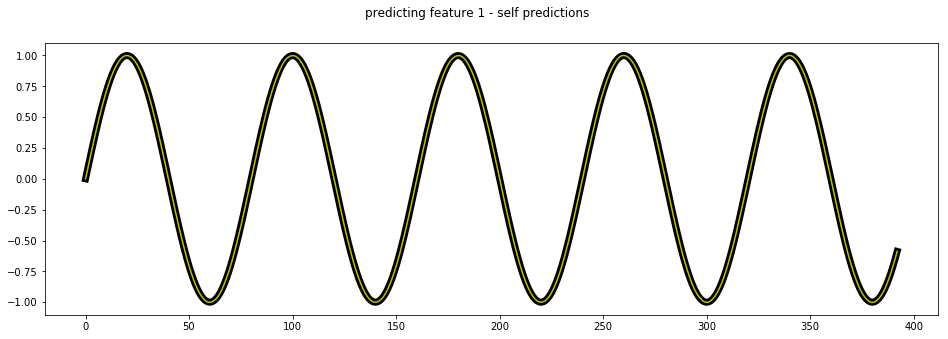

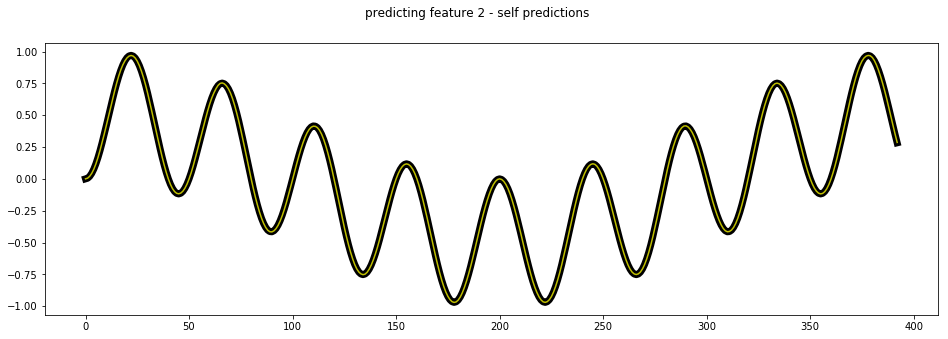

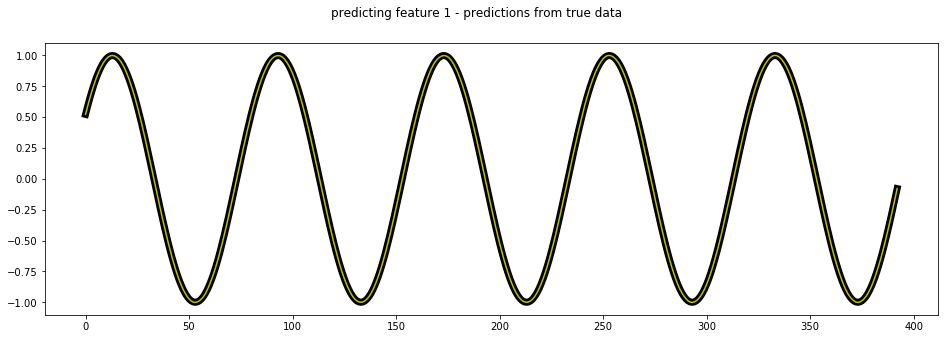

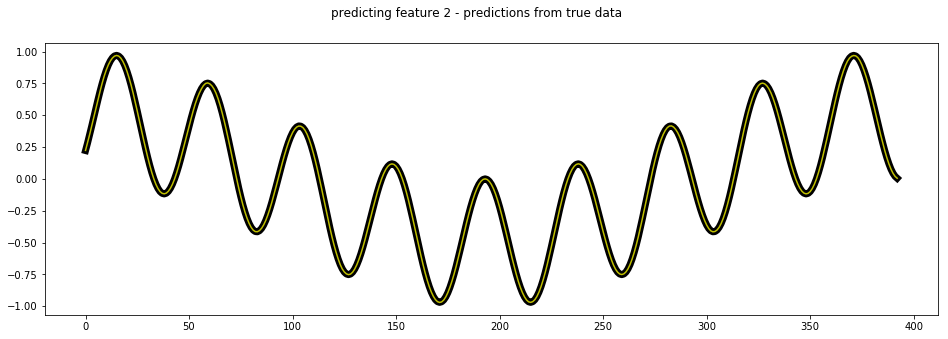

In [66]:
print('trueForecast: ', trueForecast.shape)
print('forecastFromSelf: ', forecastFromSelf.shape)
print('forecastFromInput: ', forecastFromInput.shape)
print('\n\n\nblack line: true values')
print('gold line: predicted values')


#self forecast
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(xForecast[0,:,0], linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(forecastFromSelf[0,:,0],color='y')
plt.suptitle("predicting feature 1 - self predictions")
plt.show()

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(xForecast[0,:,1],linewidth=7,color='k') #this uses xForecast because it starts exactly where x ends
ax.plot(forecastFromSelf[0,:,1],color='y')
plt.suptitle("predicting feature 2 - self predictions")
plt.show()


#forecast from test/future data:
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(trueForecast[0,:,0], linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,0],color='y')
plt.suptitle("predicting feature 1 - predictions from true data")
plt.show()

fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(trueForecast[0,:,1],linewidth=7,color='k')
ax.plot(forecastFromInput[0,:,1],color='y')
plt.suptitle("predicting feature 2 - predictions from true data")
plt.show()